# Chicago Taxi Trips in Year 2022
#### Copyright © 2024 Danny Ng

In [3]:
import matplotlib.pyplot as plt # https://matplotlib.org/stable/users/
%config InlineBackend.figure_format='retina'

import numpy as np

import pandas as pd
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/
# https://pandas.pydata.org/docs/user_guide/

import seaborn as sns
# https://seaborn.pydata.org/tutorial.html

import bokeh
import plotly
import plotlyexpress
#some other plotting libraries

In [3]:
np.__version__, pd.__version__, sns.__version__

('1.26.4', '2.2.2', '0.13.2')

# Step 1: Read the data

In [4]:
%time df = pd.read_csv('chicago_tax_trip_raw.csv') # 2.43 GB

CPU times: user 41.7 s, sys: 11.2 s, total: 52.9 s
Wall time: 1min 2s


# Step 2a: Overview of the data

Some business questions to answer:
-Is there any missing data for the columns in the dataset
-Does the missing data rows for each column follow a specific pattern
-What could be the reason for the missing data and said pattern
-Should the missing data rows be removed altogether? How does the removal affect the uniformity of the dataset?
-How is the distribution of each column based on counts? Are there any anomalies/outliers?
-Which range of values in each column should be kept/removed?
-Are the values in the column unique? If not, how are they distributed? Are there any anomalies in the distribution?
-Is there a connection between any of the columns? Example: Is total fair a sum of all the other fairs?
-Can we build any logical connections between the columns? Example: Is trip end time always greater than the trip start time?
-Are all the columns in a logical data type? Check if date/time columns are in the datetime data type.
-1-dimensional distribution, histogram, range, box plot, 5# summary of each column to identify anomalies

In [9]:
type(df)

pandas.core.frame.DataFrame

In [11]:
# Q: How many rows and columns are in the data?
df.shape

(6382425, 23)

In [13]:
len(df) # Number of rows

6382425

In [15]:
df.size # (number of rows) x (number of columns)

146795775

In [17]:
# Q: What do the raw data look like?
df

Trip ID  \
0        bcfa19f2539021c054809d4c3993d226996ae095   
1        2aba69ff015f9ea8e7bff43cab7eddb228f34a12   
2        54d812a0b88f8f9707825261014b3563a0a60ace   
3        7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef   
4        f1a650ee419b4e52d766432e6f86eca3457bfb37   
...                                           ...   
6382420  f5ba11ba1d2f0dd11c598d05481947e19c8e1a17   
6382421  f8fad61a583724263dcc628c822ec835f212665d   
6382422  f88a3f1bc24e4afa13d6a5697be43d953f2065cd   
6382423  f7d9a0b1514d58cb2af513b76759b999b67e5d11   
6382424  fbfa856b7c2adbeb613cd4eadf76c9c9477ea578   

                                                   Taxi ID  \
0        368ce5511598af2cc07efdb68067d381174fdac1d47a28...   
1        449fa4909552757130d09d98ebc7770e2dd94579036b0e...   
2        f98ae5e71fdda8806710af321dce58002146886c013f41...   
3        8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...   
4        e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...   
...                                                    ...   
6382420  0cbf5c0f6aca3628d77c7b6fe89715757ed402a70b0f8b...   
6382421  081758ced4767105bfa217f7b0784d72d37e12a016fe2a...   
6382422  96c3fa383c9adacc965af778248d6ef1b3a20ada7e623e...   
6382423  835869d6df51f9ec6e53cb4ac6a1f9e386c26f948cdcca...   
6382424  524bfb96fdc1b3d414cade414c1dbc14c16402eb60137f...   

           Trip Start Timestamp      Trip End Timestamp  Trip Seconds  \
0        01/01/2022 12:00:00 AM  01/01/2022 12:00:00 AM         152.0   
1        01/01/2022 12:00:00 AM  01/01/2022 12:30:00 AM        2360.0   
2        01/01/2022 12:00:00 AM  01/01/2022 12:00:00 AM         536.0   
3        01/01/2022 12:00:00 AM  01/01/2022 12:15:00 AM         897.0   
4        01/01/2022 12:00:00 AM  01/01/2022 12:30:00 AM        2200.0   
...                         ...                     ...           ...   
6382420  12/31/2022 11:45:00 PM  12/31/2022 11:45:00 PM         539.0   
6382421  12/31/2022 11:45:00 PM  01/01/2023 12:30:00 AM        3029.0   
6382422  12/31/2022 11:45:00 PM  01/01/2023 12:00:00 AM         449.0   
6382423  12/31/2022 11:45:00 PM  01/01/2023 12:00:00 AM         321.0   
6382424  12/31/2022 11:45:00 PM  12/31/2022 11:45:00 PM         240.0   

         Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
0              0.10                  NaN                   NaN   
1             17.44                  NaN                   NaN   
2              4.83                  NaN                   NaN   
3              2.07                  NaN                   NaN   
4              2.48                  NaN                   NaN   
...             ...                  ...                   ...   
6382420        1.85                  NaN                   NaN   
6382421       12.93                  NaN                   NaN   
6382422        1.66                  NaN                   NaN   
6382423        0.77         1.703108e+10          1.703108e+10   
6382424        0.00                  NaN                   NaN   

         Pickup Community Area  Dropoff Community Area  ...  Extras  \
0                          NaN                     NaN  ...     0.0   
1                          NaN                     8.0  ...     5.0   
2                         28.0                    22.0  ...     0.0   
3                          8.0                    32.0  ...     1.5   
4                          8.0                    32.0  ...     0.0   
...                        ...                     ...  ...     ...   
6382420                   32.0                    28.0  ...     0.0   
6382421                    NaN                    38.0  ...     0.0   
6382422                    8.0                    28.0  ...     4.0   
6382423                    8.0                     8.0  ...     1.0   
6382424                    NaN                     NaN  ...     1.0   

         Trip Total  Payment Type                       Company  \
0              3.75          Cash              Medallion Leasin   
1  

In [18]:
df.head()

Trip ID  \
0  bcfa19f2539021c054809d4c3993d226996ae095   
1  2aba69ff015f9ea8e7bff43cab7eddb228f34a12   
2  54d812a0b88f8f9707825261014b3563a0a60ace   
3  7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef   
4  f1a650ee419b4e52d766432e6f86eca3457bfb37   

                                             Taxi ID    Trip Start Timestamp  \
0  368ce5511598af2cc07efdb68067d381174fdac1d47a28...  01/01/2022 12:00:00 AM   
1  449fa4909552757130d09d98ebc7770e2dd94579036b0e...  01/01/2022 12:00:00 AM   
2  f98ae5e71fdda8806710af321dce58002146886c013f41...  01/01/2022 12:00:00 AM   
3  8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...  01/01/2022 12:00:00 AM   
4  e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...  01/01/2022 12:00:00 AM   

       Trip End Timestamp  Trip Seconds  Trip Miles  Pickup Census Tract  \
0  01/01/2022 12:00:00 AM         152.0        0.10                  NaN   
1  01/01/2022 12:30:00 AM        2360.0       17.44                  NaN   
2  01/01/2022 12:00:00 AM         536.0        4.83                  NaN   
3  01/01/2022 12:15:00 AM         897.0        2.07                  NaN   
4  01/01/2022 12:30:00 AM        2200.0        2.48                  NaN   

   Dropoff Census Tract  Pickup Community Area  Dropoff Community Area  ...  \
0                   NaN                    NaN                     NaN  ...   
1                   NaN                    NaN                     8.0  ...   
2                   NaN                   28.0                    22.0  ...   
3                   NaN                    8.0                    32.0  ...   
4                   NaN                    8.0                    32.0  ...   

   Extras  Trip Total  Payment Type               Company  \
0     0.0        3.75          Cash      Medallion Leasin   
1     5.0       52.75          Cash             Flash Cab   
2     0.0       14.75          Cash            Globe Taxi   
3     1.5       11.25          Cash              Sun Taxi   
4     0.0       11.50        Mobile  Chicago Independents   

   Pickup Centroid Latitude Pickup Centroid Longitude  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                 41.874005                -87.663518   
3                 41.899602                -87.633308   
4                 41.899602                -87.633308   

              Pickup Centroid Location  Dropoff Centroid Latitude  \
0                                  NaN                        NaN   
1                                  NaN                  41.899602   
2  POINT (-87.6635175498 41.874005383)                  41.922761   
3  POINT (-87.6333080367 41.899602111)                  41.878866   
4  POINT (-87.6333080367 41.899602111)                  41.878866   

   Dropoff Centroid Longitude            Dropoff Centroid  Location  
0                         NaN                                   NaN  
1                  -87.633308   POINT (-87.6333080367 41.899602111)  
2                  -87.699155  POINT (-87.6991553432 41.9227606205)  
3                  -87.625192  POINT (-87.6251921424 41.8788655841)  
4                  -87.625192  POINT (-87.6251921424 41.8788655841)  

[5 rows x 23 columns]

In [21]:
df.tail(2)

Trip ID  \
6382423  f7d9a0b1514d58cb2af513b76759b999b67e5d11   
6382424  fbfa856b7c2adbeb613cd4eadf76c9c9477ea578   

                                                   Taxi ID  \
6382423  835869d6df51f9ec6e53cb4ac6a1f9e386c26f948cdcca...   
6382424  524bfb96fdc1b3d414cade414c1dbc14c16402eb60137f...   

           Trip Start Timestamp      Trip End Timestamp  Trip Seconds  \
6382423  12/31/2022 11:45:00 PM  01/01/2023 12:00:00 AM         321.0   
6382424  12/31/2022 11:45:00 PM  12/31/2022 11:45:00 PM         240.0   

         Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
6382423        0.77         1.703108e+10          1.703108e+10   
6382424        0.00                  NaN                   NaN   

         Pickup Community Area  Dropoff Community Area  ...  Extras  \
6382423                    8.0                     8.0  ...     1.0   
6382424                    NaN                     NaN  ...     1.0   

         Trip Total  Payment Type                       Company  \
6382423        17.0   Credit Card  Taxicab Insurance Agency Llc   
6382424         7.8          Cash     Taxi Affiliation Services   

         Pickup Centroid Latitude Pickup Centroid Longitude  \
6382423                 41.898332                -87.620763   
6382424                       NaN                       NaN   

                     Pickup Centroid Location  Dropoff Centroid Latitude  \
6382423  POINT (-87.6207628651 41.8983317935)                  41.895033   
6382424                                   NaN                        NaN   

         Dropoff Centroid Longitude            Dropoff Centroid  Location  
6382423                  -87.619711  POINT (-87.6197106717 41.8950334495)  
6382424                         NaN                                   NaN  

[2 rows x 23 columns]

In [23]:
# Q: What are the row indices?
df.index

RangeIndex(start=0, stop=6382425, step=1)

In [25]:
# Q: What are the column names?
df.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')

In [91]:
# Q: What does a row of raw data look like?
#Accessing a row by row number
df.iloc[2] # See .loc[] .at[] .iat[]

Trip ID                                54d812a0b88f8f9707825261014b3563a0a60ace
Taxi ID                       f98ae5e71fdda8806710af321dce58002146886c013f41...
Trip Start Timestamp                                     01/01/2022 12:00:00 AM
Trip End Timestamp                                       01/01/2022 12:00:00 AM
Trip Seconds                                                              536.0
Trip Miles                                                                 4.83
Pickup Census Tract                                                         NaN
Dropoff Census Tract                                                        NaN
Pickup Community Area                                                      28.0
Dropoff Community Area                                                     22.0
Fare                                                                      14.75
Tips                                                                        0.0
Tolls                                   

In [99]:
#Accessing a row by row label
df.loc[2]

#Output here the same since the row labels are the same as row number

Trip ID                                54d812a0b88f8f9707825261014b3563a0a60ace
Taxi ID                       f98ae5e71fdda8806710af321dce58002146886c013f41...
Trip Start Timestamp                                     01/01/2022 12:00:00 AM
Trip End Timestamp                                       01/01/2022 12:00:00 AM
Trip Seconds                                                              536.0
Trip Miles                                                                 4.83
Pickup Census Tract                                                         NaN
Dropoff Census Tract                                                        NaN
Pickup Community Area                                                      28.0
Dropoff Community Area                                                     22.0
Fare                                                                      14.75
Tips                                                                        0.0
Tolls                                   

In [81]:
#Accessing one single element based on row_number and col_number
df.iat[2,2]

'01/01/2022 12:00:00 AM'

In [89]:
#Accessing one single element based on row_label and col_label
df.at[3,'Trip Miles']

2.07

In [14]:
# Q: What column data types did Pandas infer?
df.dtypes

Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

In [15]:
# Q: How much memory is used?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6382425 entries, 0 to 6382424
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Taxi ID                     object 
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                object 
 16  Company                     object 
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pickup Centroid Locat

In [16]:
df.describe().transpose() # Only numerical columns

count          mean            std  \
Trip Seconds                6380960.0  1.198209e+03    1895.664878   
Trip Miles                  6382369.0  6.185569e+00       8.002858   
Pickup Census Tract         2623831.0  1.703147e+10  368945.901068   
Dropoff Census Tract        2675331.0  1.703141e+10  345773.492358   
Pickup Community Area       5868572.0  3.235048e+01      25.203045   
Dropoff Community Area      5748741.0  2.584317e+01      20.925425   
Fare                        6378889.0  2.172931e+01      49.416239   
Tips                        6378889.0  2.754555e+00       4.083892   
Tolls                       6378889.0  2.128382e-02       7.659939   
Extras                      6378889.0  2.163036e+00      21.752692   
Trip Total                  6378889.0  2.682510e+01      56.964604   
Pickup Centroid Latitude    5870874.0  4.189992e+01       0.060151   
Pickup Centroid Longitude   5870874.0 -8.768816e+01       0.104700   
Dropoff Centroid Latitude   5784494.0  4.189471e+01       0.056207   
Dropoff Centroid Longitude  5784494.0 -8.766249e+01       0.073320   

                                     min           25%           50%  \
Trip Seconds                0.000000e+00  4.580000e+02  8.620000e+02   
Trip Miles                  0.000000e+00  8.500000e-01  2.600000e+00   
Pickup Census Tract         1.703101e+10  1.703108e+10  1.703132e+10   
Dropoff Census Tract        1.703101e+10  1.703108e+10  1.703132e+10   
Pickup Community Area       1.000000e+00  8.000000e+00  3.200000e+01   
Dropoff Community Area      1.000000e+00  8.000000e+00  2.800000e+01   
Fare                        0.000000e+00  8.000000e+00  1.400000e+01   
Tips                        0.000000e+00  0.000000e+00  9.200000e-01   
Tolls                       0.000000e+00  0.000000e+00  0.000000e+00   
Extras                      0.000000e+00  0.000000e+00  0.000000e+00   
Trip Total                  0.000000e+00  9.990000e+00  1.700000e+01   
Pickup Centroid Latitude    4.165192e+01  4.187887e+01  4.189322e+01   
Pickup Centroid Longitude  -8.791362e+01 -8.768383e+01 -8.763331e+01   
Dropoff Centroid Latitude   4.166014e+01  4.187887e+01  4.189251e+01   
Dropoff Centroid Longitude -8.791362e+01 -8.766352e+01 -8.763331e+01   

                                     75%           max  
Trip Seconds                1.620000e+03  8.634100e+04  
Trip Miles                  1.110000e+01  2.967540e+03  
Pickup Census Tract         1.703184e+10  1.703198e+10  
Dropoff Census Tract        1.703184e+10  1.703198e+10  
Pickup Community Area       4.400000e+01  7.700000e+01  
Dropoff Community Area      3.200000e+01  7.700000e+01  
Fare                        3.325000e+01  9.999750e+03  
Tips                        4.000000e+00  4.960000e+02  
Tolls                       0.000000e+00  6.666660e+03  
Extras                      2.000000e+00  8.888880e+03  
Trip Total                  4.050000e+01  9.999750e+03  
Pickup Centroid Latitude    4.194423e+01  4.202122e+01  
Pickup Centroid Longitude  -8.762519e+01 -8.753071e+01  
Dropoff Centroid Latitude   4.192269e+01  4.202122e+01  
Dropoff Centroid Longitude -8.762519e+01 -8.753139e+01

In [17]:
df.describe(include=object).T # Only non-numerical columns

count   unique  \
Trip ID                     6382425  6382425   
Taxi ID                     6382071     2950   
Trip Start Timestamp        6382425    35036   
Trip End Timestamp          6382213    35050   
Payment Type                6382425        8   
Company                     6382425       38   
Pickup Centroid Location    5870874      616   
Dropoff Centroid  Location  5784494      661   

                                                                          top  \
Trip ID                              bcfa19f2539021c054809d4c3993d226996ae095   
Taxi ID                     2780ead18beaa862cc67315ddabd9d1acaadcd6da82eba...   
Trip Start Timestamp                                   09/29/2022 05:45:00 PM   
Trip End Timestamp                                     05/20/2022 07:15:00 PM   
Payment Type                                                      Credit Card   
Company                                                             Flash Cab   
Pickup Centroid Location                  POINT (-87.6333080367 41.899602111)   
Dropoff Centroid  Location                POINT (-87.6333080367 41.899602111)   

                               freq  
Trip ID                           1  
Taxi ID                       10056  
Trip Start Timestamp            520  
Trip End Timestamp              543  
Payment Type                2481231  
Company                     1406928  
Pickup Centroid Location     673556  
Dropoff Centroid  Location   526527

In [18]:
# Q: Number of missing data per column?
len(df) - df.count()

Trip ID                             0
Taxi ID                           354
Trip Start Timestamp                0
Trip End Timestamp                212
Trip Seconds                     1465
Trip Miles                         56
Pickup Census Tract           3758594
Dropoff Census Tract          3707094
Pickup Community Area          513853
Dropoff Community Area         633684
Fare                             3536
Tips                             3536
Tolls                            3536
Extras                           3536
Trip Total                       3536
Payment Type                        0
Company                             0
Pickup Centroid Latitude       511551
Pickup Centroid Longitude      511551
Pickup Centroid Location       511551
Dropoff Centroid Latitude      597931
Dropoff Centroid Longitude     597931
Dropoff Centroid  Location     597931
dtype: int64

# Step 2b: Examine each column of the data for anomaly

/var/folders/_5/5xzxgkc15jdg71sltgfrs8rm0000gn/T/ipykernel_44965/3679744673.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


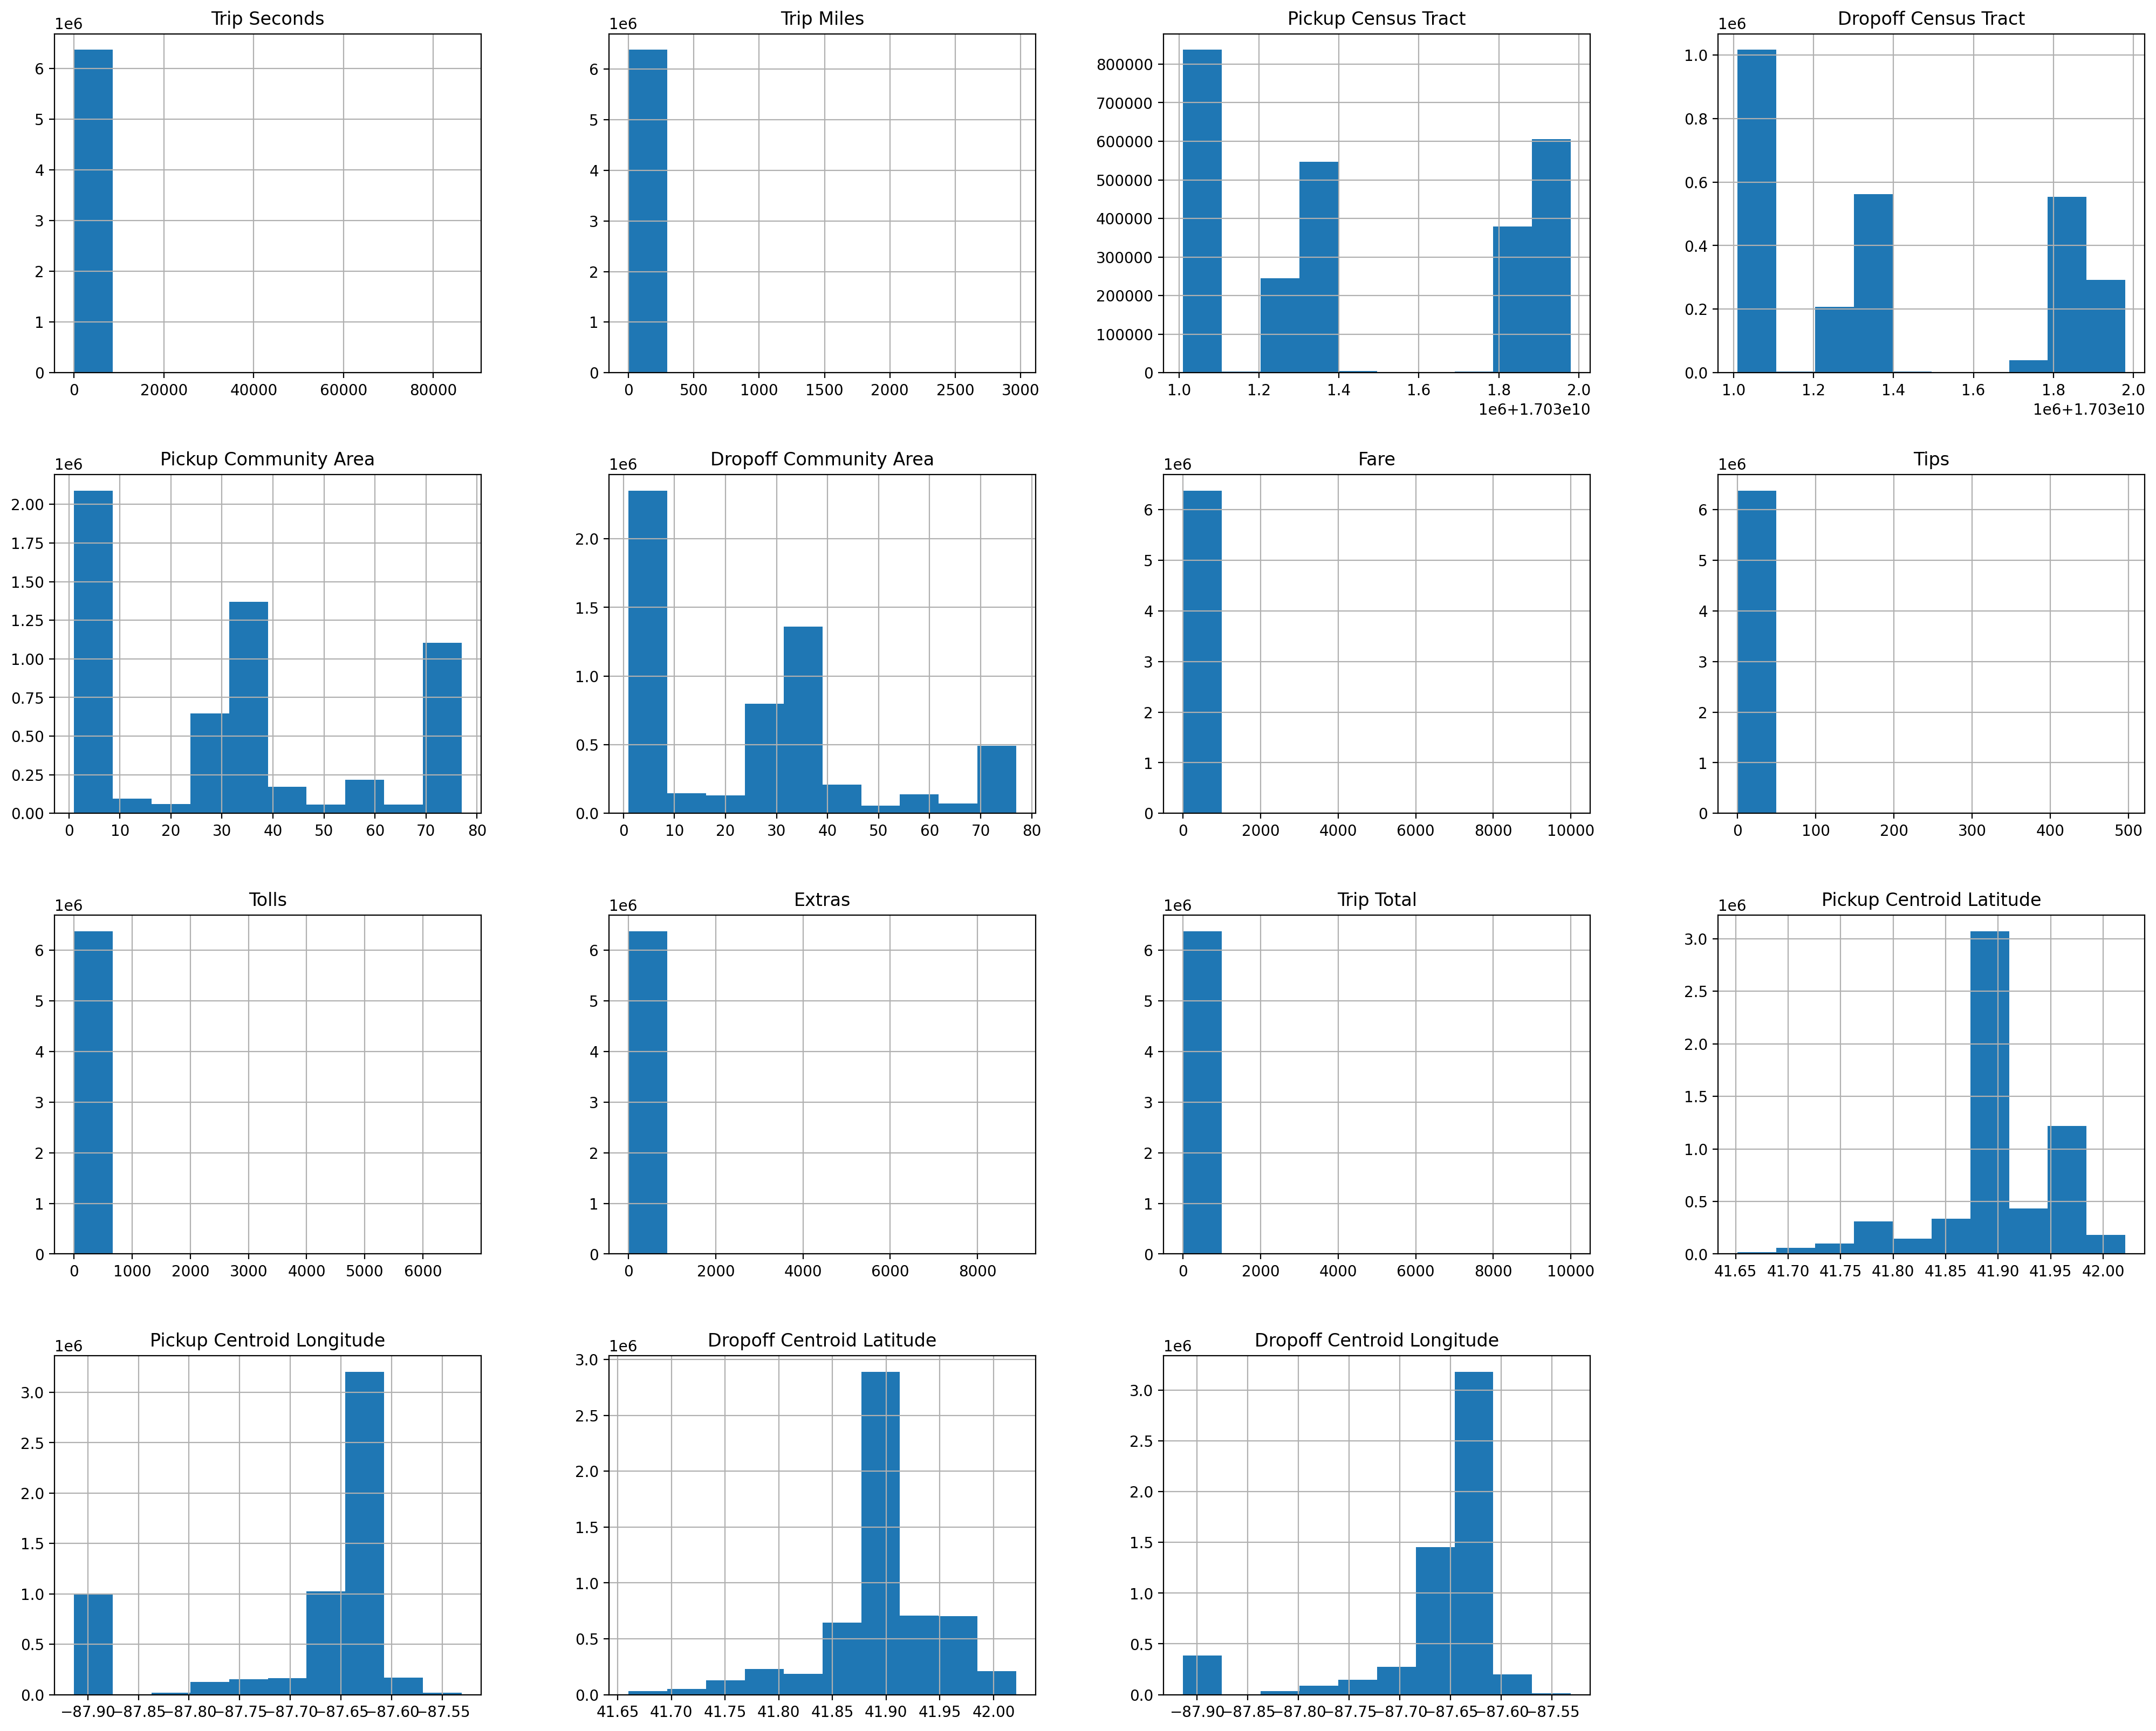

In [6]:
fig = plt.figure(figsize=(25,20))
ax = fig.gca()
df.hist(ax=ax)
pass #to remove the axes descriptions from the output
#can be used to plot histograms of all numerical variables together

In [30]:
type(df['Trip ID'])

pandas.core.series.Series

In [32]:
df['Trip ID']

0          bcfa19f2539021c054809d4c3993d226996ae095
1          2aba69ff015f9ea8e7bff43cab7eddb228f34a12
2          54d812a0b88f8f9707825261014b3563a0a60ace
3          7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef
4          f1a650ee419b4e52d766432e6f86eca3457bfb37
                             ...                   
6382420    f5ba11ba1d2f0dd11c598d05481947e19c8e1a17
6382421    f8fad61a583724263dcc628c822ec835f212665d
6382422    f88a3f1bc24e4afa13d6a5697be43d953f2065cd
6382423    f7d9a0b1514d58cb2af513b76759b999b67e5d11
6382424    fbfa856b7c2adbeb613cd4eadf76c9c9477ea578
Name: Trip ID, Length: 6382425, dtype: object

In [34]:
# Q: Any missing trip ID?
df['Trip ID'].isna().any() # See .isnull() .notna() .notnull()

False

In [42]:
df['Trip ID'].isnull().any()
#No null or NA values

False

In [44]:
# Q: Number of unique Trip IDs?
df['Trip ID'].nunique()

6382425

In [48]:
# Q: Any duplicated Trip ID?
df['Trip ID'].duplicated().any()

#No duplicates, i.e., all unique values

False

In [49]:
df['Taxi ID'].head()

0    368ce5511598af2cc07efdb68067d381174fdac1d47a28...
1    449fa4909552757130d09d98ebc7770e2dd94579036b0e...
2    f98ae5e71fdda8806710af321dce58002146886c013f41...
3    8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...
4    e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...
Name: Taxi ID, dtype: object

In [52]:
# Q: How many missing taxi ID?
df['Taxi ID'].isna().sum()

354

In [26]:
# Q: Anything special about rows with missing taxi ID?
df[df['Taxi ID'].isna()]

Trip ID Taxi ID  \
2485     dc68a5b6e3eeb4922738e6b480caf8f026f4e1fc     NaN   
18400    f0d90d5a27d05dbd91299ae01249905cbe18d59f     NaN   
29637    6b7f079e0965128a736bf9809c3aa4a107ea7b2a     NaN   
30977    9e67eb8c8085bde49c60693a5e208941c9640485     NaN   
39773    024d85ad7447761986c1239aa3586af78dcd1022     NaN   
...                                           ...     ...   
6316322  d849a122f2dd7a87d6c744511b8300d909c29538     NaN   
6319287  28410462c3243001cfd161ea656b7af2ea85f10f     NaN   
6321566  881c0de8faa54f70d085da6583f3f5645834871d     NaN   
6360431  9aea1a6451855b78ba53653300c9c5c74dd0a92c     NaN   
6360476  df45c03d338abccf9566151434941554282e2dba     NaN   

           Trip Start Timestamp      Trip End Timestamp  Trip Seconds  \
2485     01/01/2022 05:45:00 AM  01/01/2022 05:45:00 AM           0.0   
18400    01/03/2022 07:45:00 AM  01/03/2022 07:45:00 AM           0.0   
29637    01/04/2022 08:15:00 AM  01/04/2022 08:15:00 AM           0.0   
30977    01/04/2022 10:30:00 AM  01/04/2022 10:30:00 AM           0.0   
39773    01/05/2022 08:15:00 AM  01/05/2022 08:15:00 AM           0.0   
...                         ...                     ...           ...   
6316322  12/28/2022 07:15:00 AM  12/28/2022 07:15:00 AM           0.0   
6319287  12/28/2022 11:45:00 AM  12/28/2022 11:45:00 AM           0.0   
6321566  12/28/2022 02:15:00 PM  12/28/2022 02:15:00 PM           0.0   
6360431  12/31/2022 06:00:00 AM  12/31/2022 06:00:00 AM           0.0   
6360476  12/31/2022 06:00:00 AM  12/31/2022 06:00:00 AM           0.0   

         Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
2485            0.0                  NaN                   NaN   
18400           0.0                  NaN                   NaN   
29637           0.0                  NaN                   NaN   
30977           0.0                  NaN                   NaN   
39773           0.0                  NaN                   NaN   
...             ...                  ...                   ...   
6316322         0.0                  NaN                   NaN   
6319287         0.0                  NaN                   NaN   
6321566         0.0                  NaN                   NaN   
6360431         0.0                  NaN                   NaN   
6360476         0.0                  NaN                   NaN   

         Pickup Community Area  Dropoff Community Area  ...  Extras  \
2485                       NaN                     NaN  ...     0.0   
18400                      NaN                     NaN  ...     0.0   
29637                      NaN                     NaN  ...     0.0   
30977                      NaN                     NaN  ...     0.0   
39773                      NaN                     NaN  ...     0.0   
...                        ...                     ...  ...     ...   
6316322                    NaN                     NaN  ...     0.0   
6319287                    NaN                     NaN  ...     0.0   
6321566                    NaN                     NaN  ...     0.0   
6360431                    NaN                     NaN  ...     0.0   
6360476                    NaN                     NaN  ...     0.0   

         Trip Total  Payment Type                    Company  \
2485          39.10   Credit Card  Taxi Affiliation Services   
18400         11.21   Credit Card  Taxi Affiliation Services   
29637         11.79   Credit Card  Taxi Affiliation Services   
30977         11.79   Credit Card  Taxi Affiliation Services   
39773         10.92   Credit Card  Taxi Affiliation Services   
...             ...           ...                        ...   
6316322       48.30   Credit Card  Taxi Affiliation Services   
6319287       11.21   Credit Card  Taxi Affiliation Services   
6321566        6.61   Credit Card  Taxi Affiliation Services   
6360431       47.72   Credit Card  Taxi Affiliation Services   
6360476       47.72   Credit Card  Taxi Affiliation Services   

         Pickup C

In [27]:
df['Company'][df['Taxi ID'].isna()].value_counts() # Most are from one company

Company
Taxi Affiliation Services       352
Chicago Medallion Management      2
Name: count, dtype: int64

In [28]:
df[df['Taxi ID'].isna()].count() # Most do not have pickup and dropoff locations

Trip ID                       354
Taxi ID                         0
Trip Start Timestamp          354
Trip End Timestamp            353
Trip Seconds                  353
Trip Miles                    354
Pickup Census Tract             1
Dropoff Census Tract            1
Pickup Community Area           2
Dropoff Community Area          2
Fare                          351
Tips                          351
Tolls                         351
Extras                        351
Trip Total                    351
Payment Type                  354
Company                       354
Pickup Centroid Latitude        2
Pickup Centroid Longitude       2
Pickup Centroid Location        2
Dropoff Centroid Latitude       2
Dropoff Centroid Longitude      2
Dropoff Centroid  Location      2
dtype: int64

In [29]:
# Q: What data are missing taxi ID but have pickup location?
df[df['Taxi ID'].isna() & df['Pickup Centroid Location'].notna()] # The other company

Trip ID Taxi ID  \
314091   10ac28fefa6cc848131a325f51088e09206ca20f     NaN   
1999363  316d01355531ecf123bd51ae9cec9cbc64764eb1     NaN   

           Trip Start Timestamp      Trip End Timestamp  Trip Seconds  \
314091   02/01/2022 02:00:00 PM  02/01/2022 02:00:00 PM           0.0   
1999363  05/16/2022 11:00:00 AM  05/16/2022 11:00:00 AM         180.0   

         Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
314091          0.0         1.703184e+10          1.703184e+10   
1999363         0.0                  NaN                   NaN   

         Pickup Community Area  Dropoff Community Area  ...  Extras  \
314091                    28.0                    28.0  ...     0.0   
1999363                   16.0                    16.0  ...     0.0   

         Trip Total  Payment Type                       Company  \
314091         3.25          Cash  Chicago Medallion Management   
1999363        4.25          Cash  Chicago Medallion Management   

         Pickup Centroid Latitude Pickup Centroid Longitude  \
314091                  41.884768                -87.684147   
1999363                 41.953582                -87.723452   

                     Pickup Centroid Location  Dropoff Centroid Latitude  \
314091   POINT (-87.6841474493 41.8847677845)                  41.884768   
1999363  POINT (-87.7234523905 41.9535821253)                  41.953582   

         Dropoff Centroid Longitude            Dropoff Centroid  Location  
314091                   -87.684147  POINT (-87.6841474493 41.8847677845)  
1999363                  -87.723452  POINT (-87.7234523905 41.9535821253)  

[2 rows x 23 columns]

In [30]:
# Q: How many unique taxi IDs?
df['Taxi ID'].nunique()

2950

In [31]:
# Q: How many trips per taxi ID?
df['Taxi ID'].value_counts().reset_index()

Taxi ID  count
0     2780ead18beaa862cc67315ddabd9d1acaadcd6da82eba...  10056
1     f98ae5e71fdda8806710af321dce58002146886c013f41...   8512
2     8da9e1d18757022c6a6a614fc2d38483e38aae441feff5...   8413
3     3d9da170c3265c7027541b4dd1802eb22d897f005fedfa...   7888
4     66d3807bc1b0bcf7c3b90c19f7c13356cdd60995199804...   7794
...                                                 ...    ...
2945  bc4298d28798c82fa6b6b3ec651f6d646f6f65f54661f5...      1
2946  0dc4dcab0d31652495c375840a0b99047c95d67649bf09...      1
2947  e97ff21e0c8f655aa03ec62fbccdf33578a21516535ce7...      1
2948  d22322e70c20de00bea8fdc7b90805545bb82ef14859e0...      1
2949  00e34f77f4495a6128d5b3312099c8f2f4ea25c2650e83...      1

[2950 rows x 2 columns]

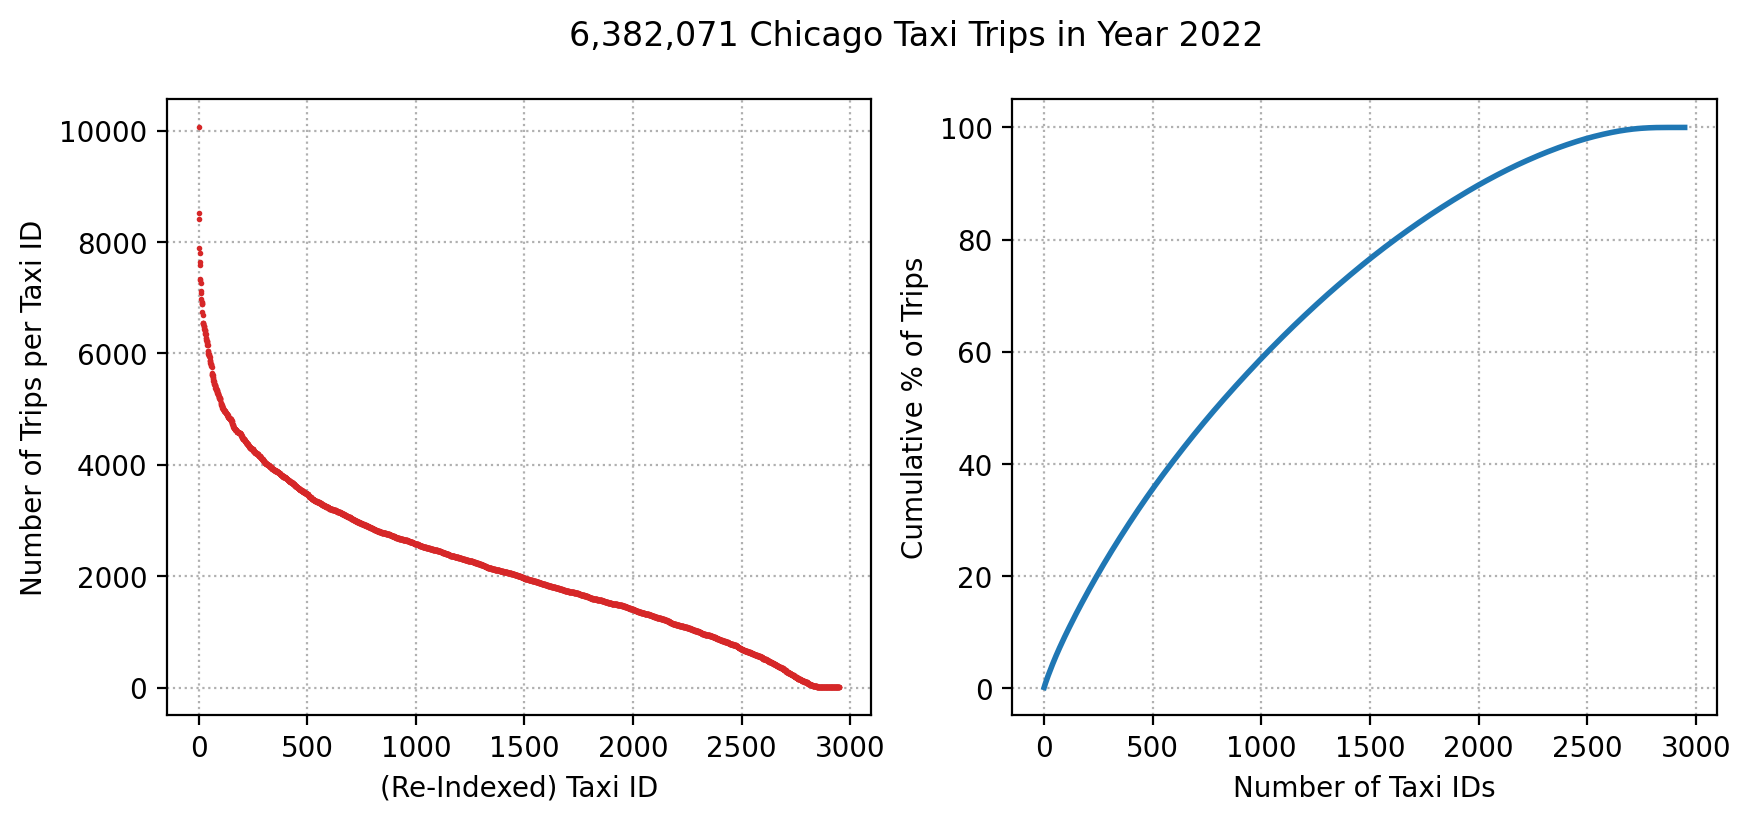

In [101]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
a = df['Taxi ID'].value_counts().to_numpy() # https://pandas.pydata.org/docs/user_guide/basics.html#attributes-and-underlying-data
plt.plot(a, '.', markersize=2, color='C3') # https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.grid(linestyle=':')
plt.xlabel('(Re-Indexed) Taxi ID')
plt.ylabel('Number of Trips per Taxi ID')

plt.subplot(122)
plt.plot(a.cumsum() / a.sum() * 100, linewidth=2, color='C0')
ax = plt.gca()
ax.grid(linestyle=':')
ax.set_axisbelow(True) # plt.rcParams['axes.axisbelow'] = True
ax.set_xlabel('Number of Taxi IDs')
ax.set_ylabel('Cumulative % of Trips')

plt.suptitle(f'{a.sum():,} Chicago Taxi Trips in Year 2022')
plt.show()

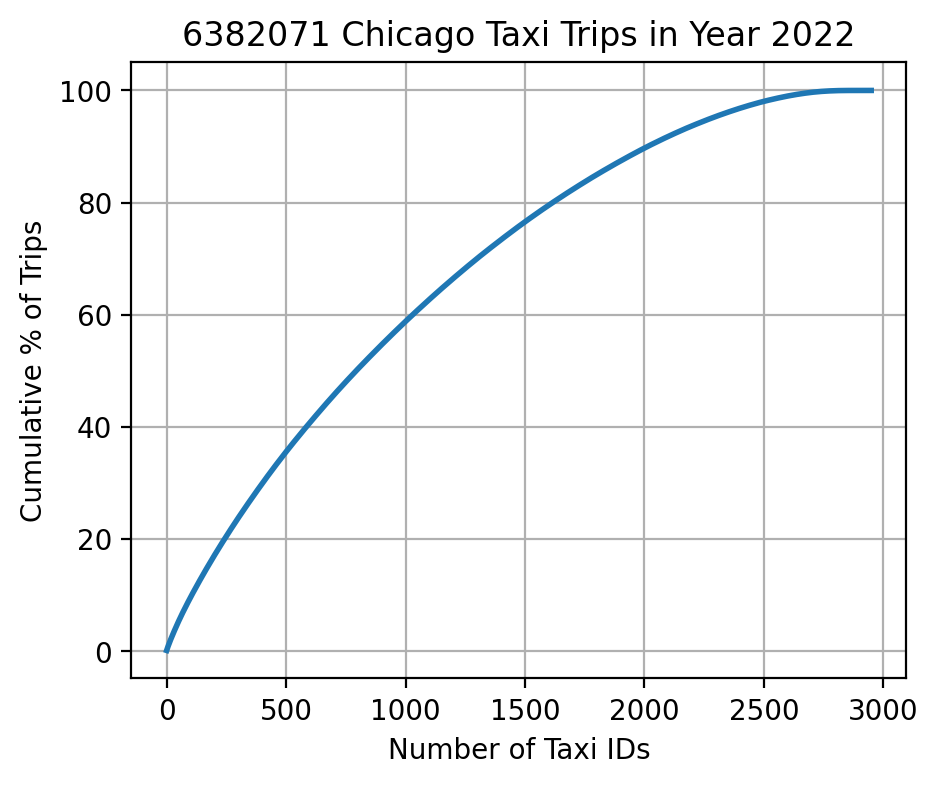

In [109]:
((df['Taxi ID'].value_counts().cumsum().reset_index(drop=True) / df['Taxi ID'].count() * 100)
 .plot(figsize=(5, 4),
       linewidth=2,
       grid=True,
       xlabel='Number of Taxi IDs',
       ylabel='Cumulative % of Trips',
       title=str(df['Taxi ID'].count()) + ' Chicago Taxi Trips in Year 2022'));
# https://pandas.pydata.org/docs/user_guide/visualization.html

In [34]:
df['Trip Start Timestamp']

0          01/01/2022 12:00:00 AM
1          01/01/2022 12:00:00 AM
2          01/01/2022 12:00:00 AM
3          01/01/2022 12:00:00 AM
4          01/01/2022 12:00:00 AM
                    ...          
6382420    12/31/2022 11:45:00 PM
6382421    12/31/2022 11:45:00 PM
6382422    12/31/2022 11:45:00 PM
6382423    12/31/2022 11:45:00 PM
6382424    12/31/2022 11:45:00 PM
Name: Trip Start Timestamp, Length: 6382425, dtype: object

In [35]:
type(df['Trip Start Timestamp'].iat[0])

str

In [111]:
#Parse to datetime object in the standard ISO notation

df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p')
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

df['Trip Start Timestamp']

0         2022-01-01 00:00:00
1         2022-01-01 00:00:00
2         2022-01-01 00:00:00
3         2022-01-01 00:00:00
4         2022-01-01 00:00:00
                  ...        
6382420   2022-12-31 23:45:00
6382421   2022-12-31 23:45:00
6382422   2022-12-31 23:45:00
6382423   2022-12-31 23:45:00
6382424   2022-12-31 23:45:00
Name: Trip Start Timestamp, Length: 6382425, dtype: datetime64[ns]

In [37]:
type(df['Trip Start Timestamp'].iat[0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
# Q: Any missing trip start time?
df['Trip Start Timestamp'].isna().sum()

0

In [113]:
# Q: Any trip start time not in year 2022?
(df['Trip Start Timestamp'].dt.year == 2022).all()

# https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors
# https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components

True

In [40]:
# Q: Any calendar date not present?
df['Trip Start Timestamp'].dt.date.unique().size

365

In [41]:
# Q: How many trips per month?
df['Trip Start Timestamp'].dt.month.value_counts().sort_index()

Trip Start Timestamp
1     308179
2     364545
3     518637
4     521742
5     596191
6     639269
7     573232
8     589033
9     608507
10    606713
11    542788
12    513589
Name: count, dtype: int64

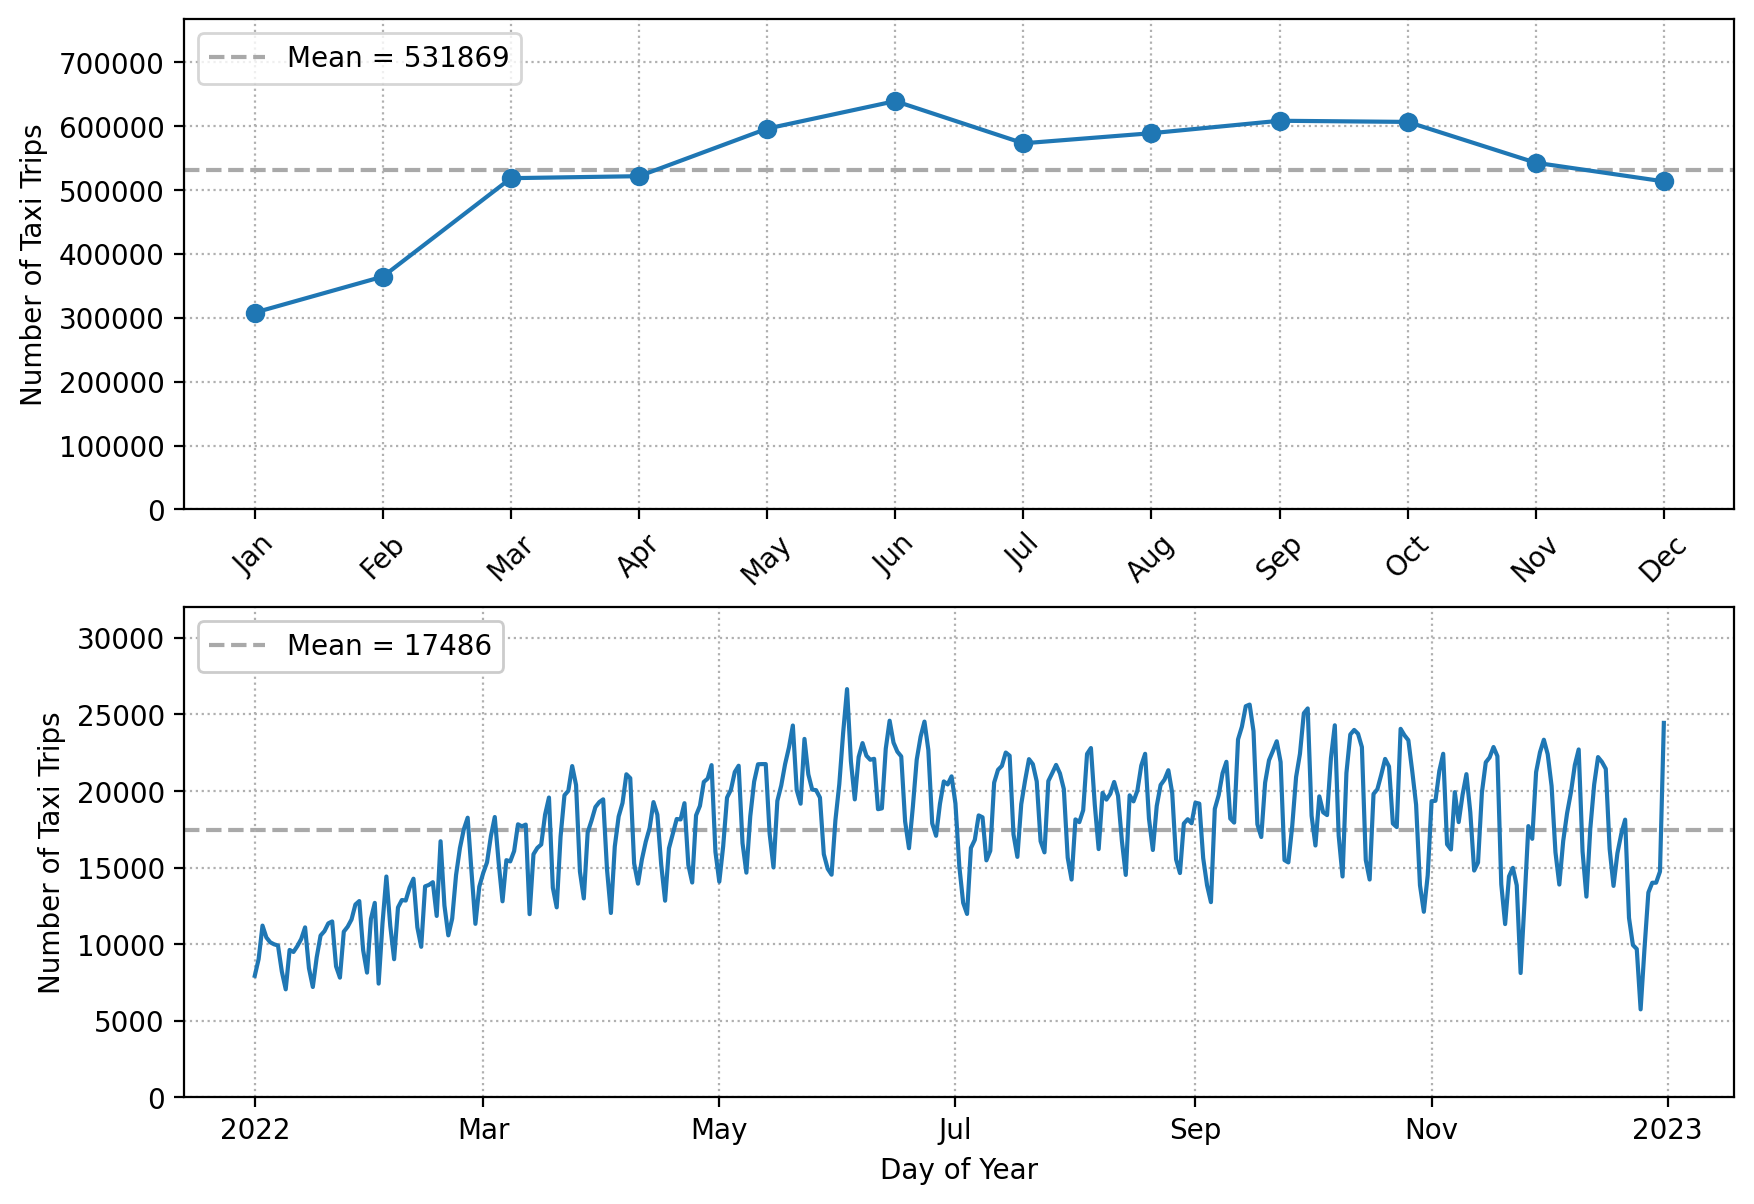

In [42]:
import calendar # https://docs.python.org/3/library/calendar.html
import matplotlib.dates

fig = plt.figure(figsize=(10, 7))

ax1 = plt.subplot(2, 1, 1)
v1 = df['Trip Start Timestamp'].dt.month.value_counts().sort_index()
ax1.plot(list(calendar.month_abbr)[1:], v1, 'o-', )
ax1.axhline(v1.mean(), linestyle='--', color='darkgray', zorder=1.5, # https://matplotlib.org/stable/gallery/misc/zorder_demo.html
            label=f'Mean = {round(v1.mean())}')
ax1.set_ylim(bottom=0, top=v1.max() * 1.2)
ax1.grid(linestyle=':')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Number of Taxi Trips')
ax1.legend(loc='upper left')

ax2 = plt.subplot(2, 1, 2)
v2 = df['Trip Start Timestamp'].dt.date.value_counts().sort_index()
ax2.plot(v2)
ax2.axhline(v2.mean(), linestyle='--', color='darkgray', zorder=1.5, label=f'Mean = {v2.mean():.0f}')
ax2.xaxis.set(major_formatter=matplotlib.dates.ConciseDateFormatter(matplotlib.dates.AutoDateLocator()))
ax2.set_ylim(bottom=0, top=v2.max() * 1.2)
ax2.grid(linestyle=':')
ax2.set_xlabel('Day of Year')
ax2.set_ylabel('Number of Taxi Trips')
ax2.legend(loc='upper left', framealpha=1)

plt.show()

In [43]:
# Q: Which dates had most trips?
df['Trip Start Timestamp'].dt.date.value_counts().nlargest(10)

Trip Start Timestamp
2022-06-03    26650
2022-09-15    25641
2022-09-14    25533
2022-09-30    25389
2022-09-29    25074
2022-06-14    24588
2022-06-23    24530
2022-12-31    24445
2022-10-07    24289
2022-05-20    24274
Name: count, dtype: int64

In [44]:
# Q: Which dates had fewest trips?
df['Trip Start Timestamp'].dt.date.value_counts().nsmallest(10)

Trip Start Timestamp
2022-12-25    5748
2022-01-09    7056
2022-01-16    7210
2022-02-02    7429
2022-01-23    7820
2022-01-01    7939
2022-11-24    8121
2022-01-30    8147
2022-01-08    8207
2022-01-15    8436
Name: count, dtype: int64

In [45]:
# Q: How many trips per day of week?
df['Trip Start Timestamp'].dt.dayofweek.value_counts().sort_index() # 0 is Monday

Trip Start Timestamp
0     887351
1     954151
2     978410
3    1010665
4    1016192
5     821606
6     714050
Name: count, dtype: int64

In [46]:
# Q: How many trips per hour?
df['Trip Start Timestamp'].dt.hour.value_counts().sort_index()

Trip Start Timestamp
0     132168
1      90280
2      55245
3      38776
4      39717
5      60098
6     108468
7     192698
8     281855
9     320206
10    340711
11    364707
12    398371
13    407572
14    418096
15    428276
16    438406
17    457721
18    441778
19    395986
20    320037
21    263510
22    216385
23    171358
Name: count, dtype: int64

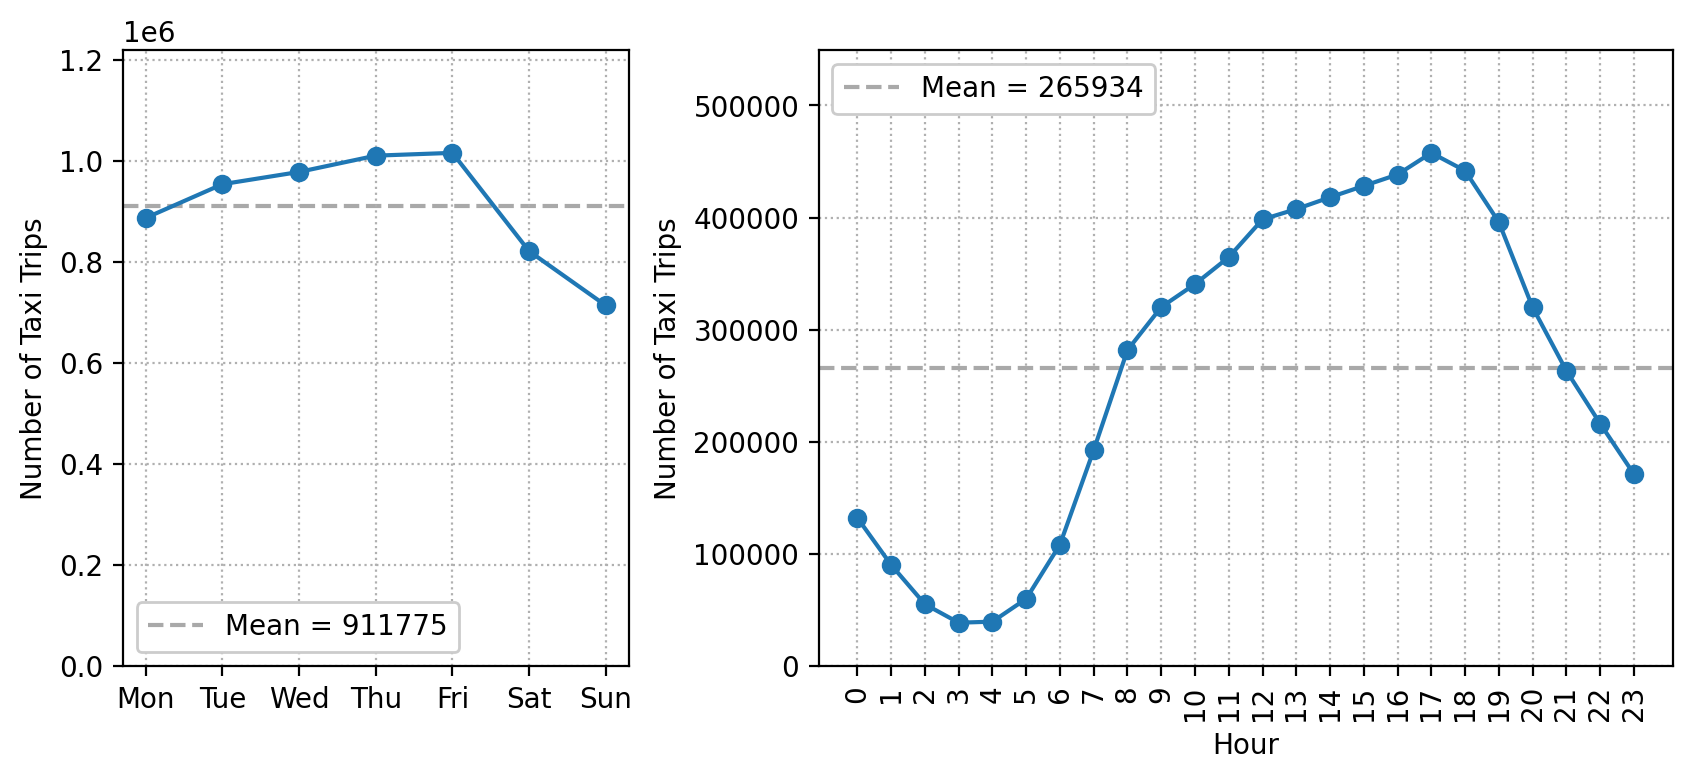

In [47]:
import matplotlib.gridspec
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html

fig = plt.figure(figsize=(10, 4))
gs = matplotlib.gridspec.GridSpec(1, 5, figure=fig, wspace=1.2)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2:])

v1 = df['Trip Start Timestamp'].dt.dayofweek.value_counts().sort_index()
ax1.plot(calendar.day_abbr, v1, 'o-')
ax1.axhline(v1.mean(), linestyle='--', color='darkgray', zorder=1.5, label=f'Mean = {v1.mean():.0f}')
ax1.set_ylim(bottom=0, top=v1.max() * 1.2)
ax1.grid(linestyle=':')
ax1.set_ylabel('Number of Taxi Trips')
ax1.legend(loc='lower left', framealpha=1)

v2 = df['Trip Start Timestamp'].dt.hour.value_counts().sort_index()
ax2.plot(v2, 'o-')
ax2.axhline(v2.mean(), linestyle='--', color='darkgray', zorder=1.5, label=f'Mean = {v2.mean():.0f}')
ax2.set_ylim(bottom=0, top=v2.max() * 1.2)
ax2.grid(linestyle=':')
ax2.set_xticks(np.arange(24))
ax2.tick_params(axis='x', rotation=90)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Number of Taxi Trips')
ax2.legend(loc='upper left', framealpha=1)

plt.show()

In [48]:
# Q: Number of trips per date for the busiest taxi IDs?
busy_taxi = df['Taxi ID'].value_counts().nlargest(5).index
df2 = (df
       [df['Taxi ID'].isin(busy_taxi)]
       .value_counts(['Taxi ID', df['Trip Start Timestamp'].dt.date])
       .unstack()
       .T
       .fillna(0)
       .rename(columns=lambda x: x[:6])
       .rename_axis('Trip Start Date'))

df2

Taxi ID          2780ea  3d9da1  66d380  8da9e1  f98ae5
Trip Start Date                                        
2022-01-01         39.0    12.0    36.0     0.0    22.0
2022-01-02         39.0    13.0    33.0     9.0    14.0
2022-01-03         22.0    17.0    17.0    15.0    12.0
2022-01-04         31.0    11.0    20.0    20.0     7.0
2022-01-05         23.0    16.0    18.0    24.0     9.0
...                 ...     ...     ...     ...     ...
2022-12-27         29.0    17.0    23.0    22.0    16.0
2022-12-28         35.0    18.0    17.0    25.0    22.0
2022-12-29         30.0    22.0    22.0    14.0    26.0
2022-12-30         40.0    24.0    24.0    23.0    21.0
2022-12-31         72.0    36.0    40.0    30.0    42.0

[365 rows x 5 columns]

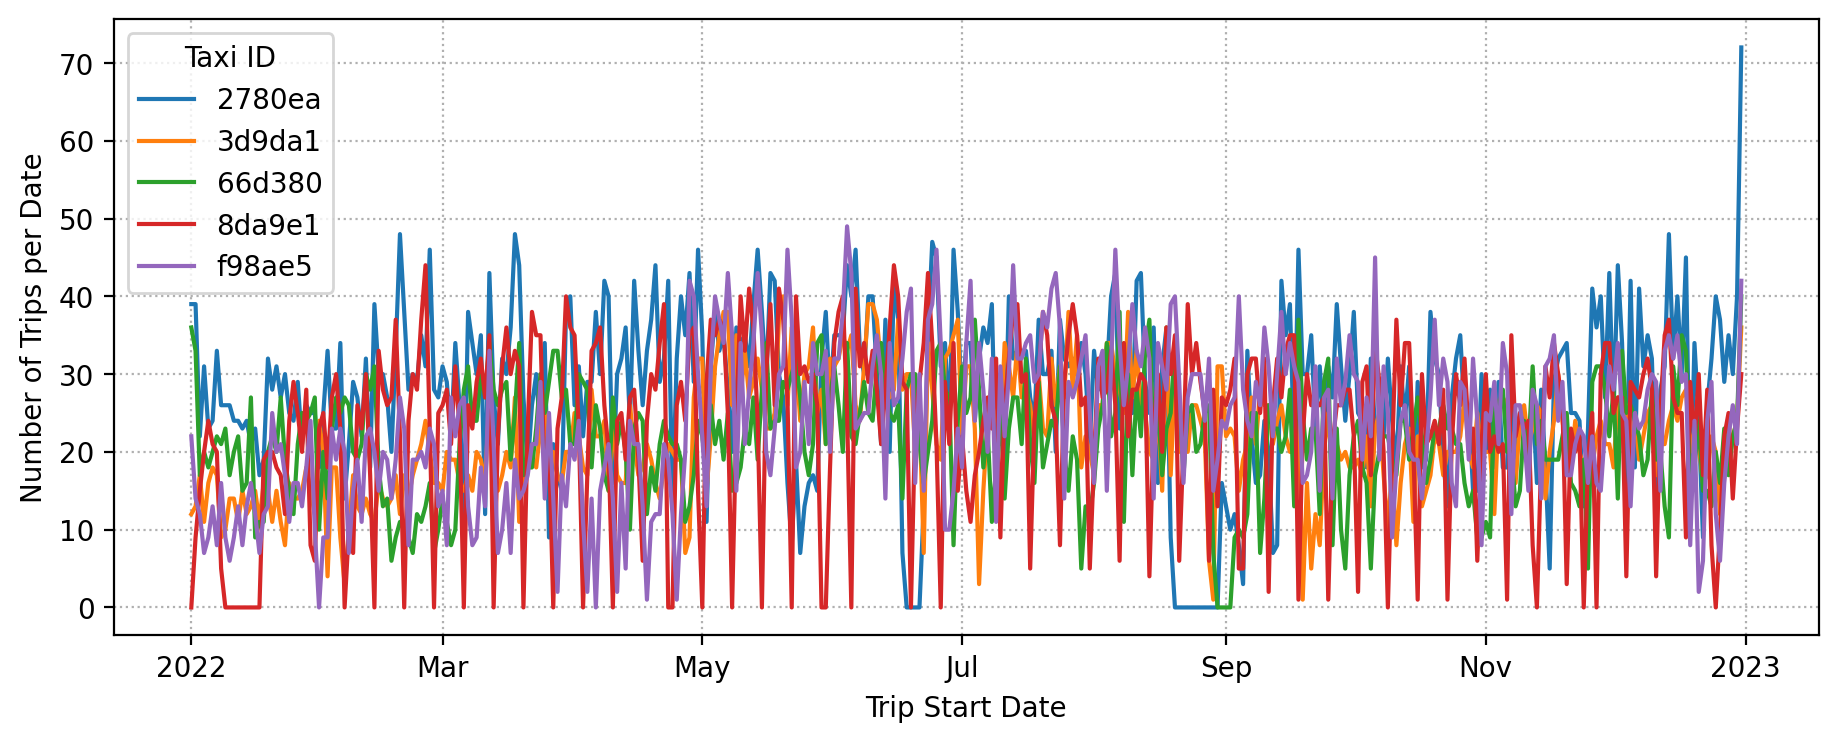

In [49]:
ax = df2.plot(figsize=(11, 4), ylabel='Number of Trips per Date')
ax.grid(linestyle=':')
ax.xaxis.set(major_formatter=matplotlib.dates.ConciseDateFormatter(matplotlib.dates.AutoDateLocator()));

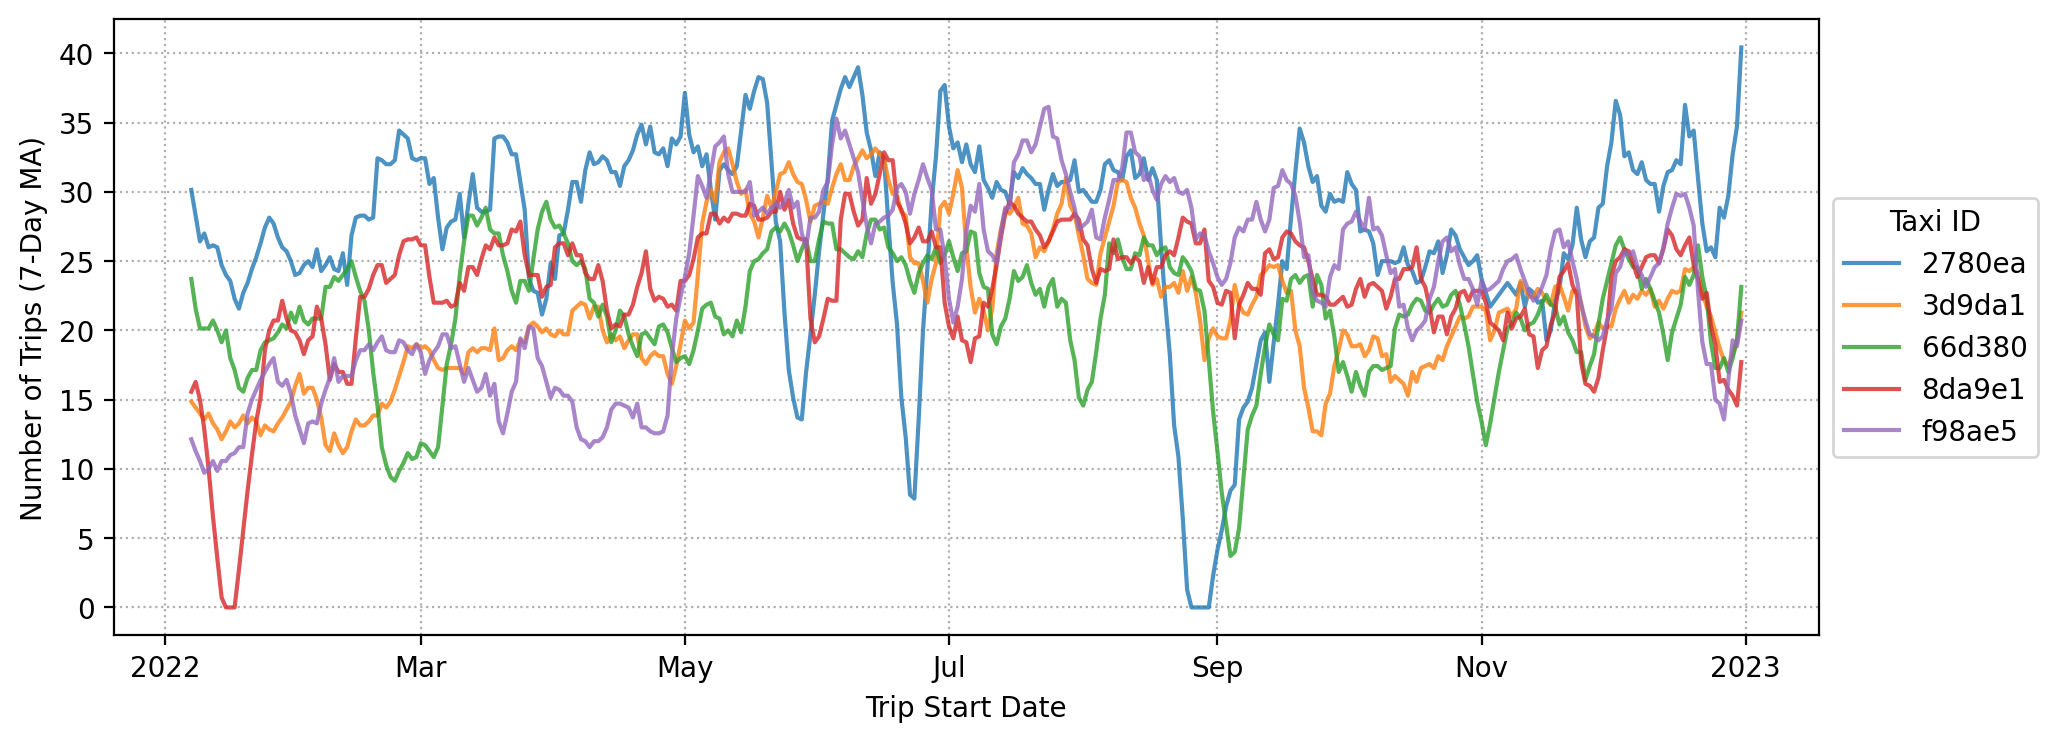

In [50]:
ax = (df2
      .rolling(window=7) # https://pandas.pydata.org/docs/user_guide/window.html#window-generic
      .mean()
      .plot(figsize=(11, 4), alpha=0.8, ylabel='Number of Trips (7-Day MA)'))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Taxi ID')
ax.grid(linestyle=':')
ax.xaxis.set(major_formatter=matplotlib.dates.ConciseDateFormatter(matplotlib.dates.AutoDateLocator()));

In [51]:
df['Trip End Timestamp'] = pd.to_datetime(df['Trip End Timestamp'], format='%m/%d/%Y %I:%M:%S %p')

In [52]:
# Q: How many missing trip end time?
df['Trip End Timestamp'].isna().sum()

212

In [53]:
# Q: Anything special about rows with missing trip end time?
df[df['Trip End Timestamp'].isna()]

Trip ID  \
7947     2138daabdc8a40e4003f37a9afb950f264570ef5   
23973    feee626970be5f6fab328e653f7ddb399ea6862c   
64607    1595ad9be307fb884203c0b7d0d82bf6f2aa61bd   
66794    ea888612112af451bd5eeaa7f2bb6aec5d227d02   
71915    62a109ee095aafc1bf0215936522ea8be9d2f8db   
...                                           ...   
6258400  f95efdeb7f97365cb6ce502435bc0037174557a8   
6263652  0d80dd153293482cd0ca03ab76be51e8464641b8   
6274621  b5ee9d7fc97216b77a6d51653cfc75d5c5890e06   
6293343  ae6eed5440800aac7f6c183f8f55a113d0023d64   
6333106  ef1c0fdad89239615d60be548a692c4722c4bd30   

                                                   Taxi ID  \
7947     1f3593421771a4a6cc906137e5d3221ed2ab7bef3c2bfa...   
23973    34ed8ae3af562da8ab7ee7aa07c83287baf647219d79cf...   
64607    e585218a9f728ba533db40a74237a1caa23f01212f0fa8...   
66794    bef8b8ce015170bb9aa8b1572ae3c5b704aafc09cf971c...   
71915    1b0a05f16ca6759e00f934c5b39e93939b52bb1e28c114...   
...                                                    ...   
6258400  fbb69858d94acd550ff8b8d685137eae3aae40bf83c3a5...   
6263652  f3e31800d0d53c00d6b0f4e35242f868b87fc31ebc11d5...   
6274621  b12c6be9f088bab50b80d41139e9c64c78030e062ad567...   
6293343  56f2fce86600dd132681be1323fe78ce26e60f2fffe4b3...   
6333106  ee81904fa9a8cd1448dacf8ad9f5715ac8bb89174578de...   

        Trip Start Timestamp Trip End Timestamp  Trip Seconds  Trip Miles  \
7947     2022-01-02 00:00:00                NaT           NaN         0.0   
23973    2022-01-03 15:30:00                NaT           NaN         0.0   
64607    2022-01-07 16:00:00                NaT           NaN         0.0   
66794    2022-01-07 18:45:00                NaT           NaN         0.0   
71915    2022-01-08 13:30:00                NaT           NaN         0.0   
...                      ...                ...           ...         ...   
6258400  2022-12-22 10:00:00                NaT           NaN         0.0   
6263652  2022-12-22 16:30:00                NaT           NaN         0.0   
6274621  2022-12-23 19:30:00                NaT           NaN         0.0   
6293343  2022-12-26 09:00:00                NaT           NaN         0.0   
6333106  2022-12-29 11:30:00                NaT           NaN         0.0   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
7947                     NaN                   NaN                    8.0   
23973           1.703116e+10                   NaN                   16.0   
64607                    NaN                   NaN                   24.0   
66794           1.703113e+10                   NaN                   13.0   
71915           1.703198e+10                   NaN                   76.0   
...                      ...                   ...                    ...   
6258400         1.703108e+10                   NaN                    8.0   
6263652         1.703108e+10                   NaN                    8.0   
6274621         1.703198e+10                   NaN                   76.0   
6293343                  NaN                   NaN                    8.0   
6333106         1.703133e+10                   NaN                   33.0   

         Dropoff Community Area  ...  Extras  Trip Total  Payment Type  \
7947                        NaN  ...     0.0         0.0       Unknown   
23973                       NaN  ...     0.0         0.0       Unknown   
64607                       NaN  ...     0.0         0.0       Unknown   
66794                       NaN  ...     0.0         0.0       Unknown   
71915                       NaN  ...     0.0         0.0       Unknown   
...                         ...  ...     ...         ...           ...   
6258400                     NaN  ...     0.0         0.0       Unknown   
6263652                     NaN  ...     0.0         0.0       Unknown   
6274621                     NaN  ...     0.0         0.0       Unknown   
6293343                     NaN  ...     0.0         0.0       Unknown

In [54]:
df[df['Trip End Timestamp'].isna()].count() # All do not have trip seconds and dropoff location

Trip ID                       212
Taxi ID                       211
Trip Start Timestamp          212
Trip End Timestamp              0
Trip Seconds                    0
Trip Miles                    212
Pickup Census Tract            73
Dropoff Census Tract            0
Pickup Community Area         108
Dropoff Community Area          0
Fare                          212
Tips                          212
Tolls                         212
Extras                        212
Trip Total                    212
Payment Type                  212
Company                       212
Pickup Centroid Latitude      108
Pickup Centroid Longitude     108
Pickup Centroid Location      108
Dropoff Centroid Latitude       0
Dropoff Centroid Longitude      0
Dropoff Centroid  Location      0
dtype: int64

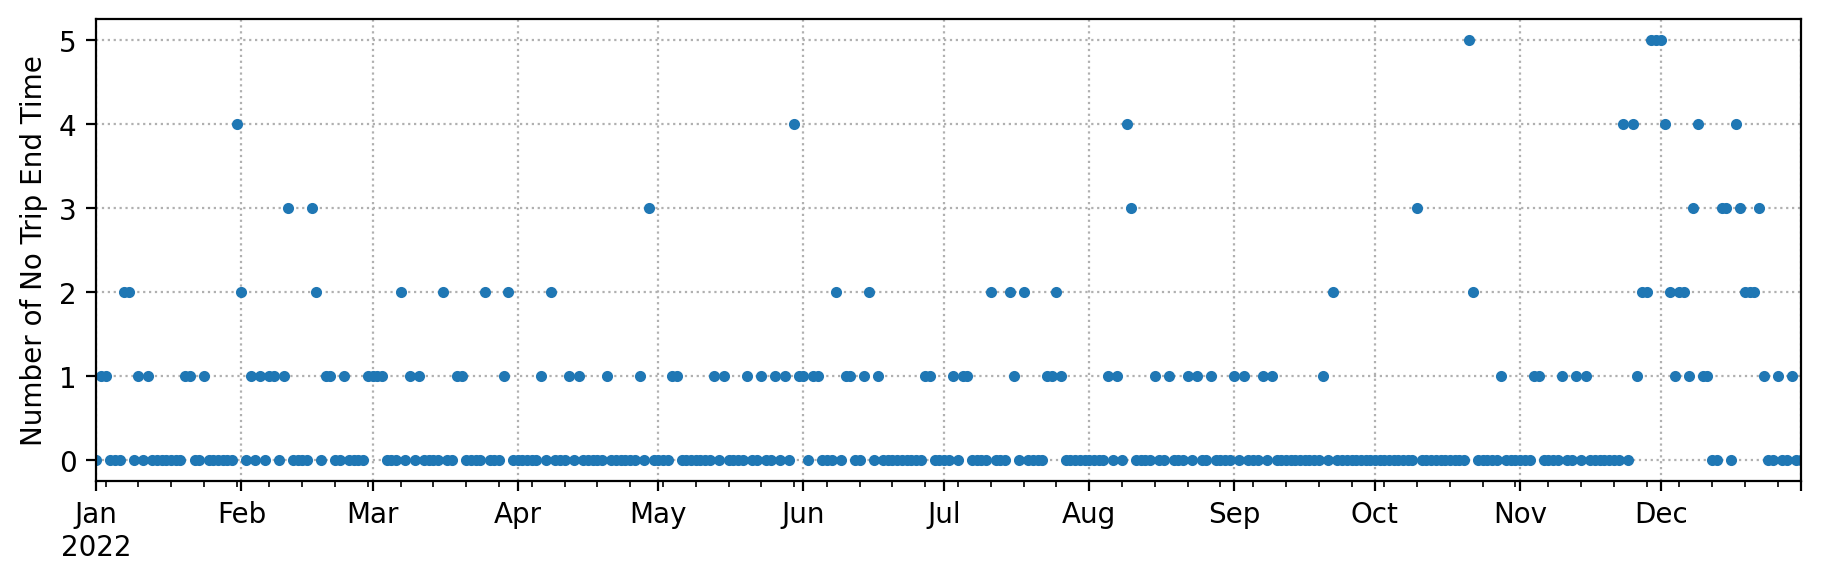

In [55]:
# Q: Is trip end time missing randomly over date?
ax = (df['Trip Start Timestamp']
      [df['Trip End Timestamp'].isna()]
      .dt.date
      .value_counts()
      .reindex(index=pd.date_range('2022-01-01', '2022-12-31'), fill_value=0) # https://pandas.pydata.org/docs/user_guide/basics.html#basics-reindexing
      .plot(figsize=(11, 3), marker='.', linestyle='', ylabel='Number of No Trip End Time'))
ax.grid(linestyle=':')

In [56]:
# Q: Any trip end time not in year 2022?
df['Trip End Timestamp'].dt.year.value_counts()

Trip End Timestamp
2022.0    6382063
2023.0        148
2014.0          1
2003.0          1
Name: count, dtype: int64

In [57]:
# Q: What dates if trip ends in year 2023?
df['Trip End Timestamp'][df['Trip End Timestamp'].dt.year == 2023].value_counts().sort_index()

Trip End Timestamp
2023-01-01 00:00:00    96
2023-01-01 00:15:00    24
2023-01-01 00:30:00     8
2023-01-01 00:45:00     2
2023-01-01 01:00:00     2
2023-01-01 07:15:00     4
2023-01-01 09:00:00     2
2023-01-01 12:45:00     2
2023-01-01 15:00:00     2
2023-01-01 15:30:00     2
2023-01-01 15:45:00     2
2023-01-01 16:00:00     2
Name: count, dtype: int64

In [58]:
# Q: What dates if trip ends before year 2022?
df[df['Trip End Timestamp'].dt.year < 2022]

Trip ID  \
1047299  18c63ea0856a928490f91acfc35043ca3dca1fcc   
4639829  f86ed2a122e570c353f2fce9989ba6a3481c2b69   

                                                   Taxi ID  \
1047299  55e53aceec1519445bae3e8414b4cbf11e59e50800f714...   
4639829  813f13e9ed00615788ec81497e9585ef6ae4993a4491b8...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
1047299  2022-03-23 22:30:00 2014-09-22 14:00:00           NaN        1.00   
4639829  2022-09-27 17:15:00 2003-02-11 17:45:00           NaN        4.42   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
1047299                  NaN                   NaN                    NaN   
4639829                  NaN                   NaN                    8.0   

         Dropoff Community Area  ...  Extras  Trip Total  Payment Type  \
1047299                     8.0  ...     2.0       38.05          Cash   
4639829                     8.0  ...     1.0       15.00          Cash   

                                   Company  Pickup Centroid Latitude  \
1047299  Blue Ribbon Taxi Association Inc.                       NaN   
4639829                        5 Star Taxi                 41.899602   

        Pickup Centroid Longitude             Pickup Centroid Location  \
1047299                       NaN                                  NaN   
4639829                -87.633308  POINT (-87.6333080367 41.899602111)   

         Dropoff Centroid Latitude  Dropoff Centroid Longitude  \
1047299                  41.899602                  -87.633308   
4639829                  41.899602                  -87.633308   

                  Dropoff Centroid  Location  
1047299  POINT (-87.6333080367 41.899602111)  
4639829  POINT (-87.6333080367 41.899602111)  

[2 rows x 23 columns]

In [59]:
# Q: How many trips have end time before start time?
df[df['Trip Start Timestamp'] > df['Trip End Timestamp']]

Trip ID  \
37703    4437b5efa8b632abf91b24d4dbfbd7b2aebb4c8b   
266119   8eb67d250438864bd3f355e10c3ab0ce38bb0207   
670005   f9e1520bdd97f5a1c7e1bf8cb6798024d2719a3c   
706947   d1ac33bacb551f0522d74bc6a57d66bebaa7714e   
767641   39ea48ace580b8ff69d4e40f13dc6d06d889bf9b   
...                                           ...   
5426107  e147b72ed90f0ffdb06c7d13deae98ab55127888   
5785984  730e27de91a884ceee1ca1d4108f78446a8b897f   
6084476  948bd9d02589b2cfb547a7f5b8a7df7b863e83d1   
6153759  610820dc04f1bd59268e0995ea0580d735fe39cb   
6170183  a2ac67e93e75adb84eb92fb9e47d8ee5042ed6fd   

                                                   Taxi ID  \
37703    f8b84760a5c303b6f781d9864346b47bc9d11271782082...   
266119   daf26343c74ba7742cf4ea2c61ffbff2209dd45f36a891...   
670005   098ac56b572ab91b2ce62b528a811d7e5e1ff9abdd3f87...   
706947   104880671c858323475b279b1ea4370cca4508a64a70e4...   
767641   f8b84760a5c303b6f781d9864346b47bc9d11271782082...   
...                                                    ...   
5426107  f962126062d38e2ef0fa177812eba73ccd30513c1c6cfa...   
5785984  0bd1d932b3086e8afc5ffa6372c26866d85ff1abaa15db...   
6084476  ace613150343ec9584249a0595c0c35af8e99fad625ade...   
6153759  ace613150343ec9584249a0595c0c35af8e99fad625ade...   
6170183  65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
37703    2022-01-04 20:30:00 2022-01-04 20:15:00           NaN       16.50   
266119   2022-01-28 00:45:00 2022-01-27 10:15:00           NaN        0.00   
670005   2022-02-28 18:30:00 2022-02-28 18:15:00           NaN        0.00   
706947   2022-03-03 11:00:00 2022-03-03 10:45:00           NaN        0.00   
767641   2022-03-07 07:15:00 2022-03-05 07:45:00           NaN        4.80   
...                      ...                 ...           ...         ...   
5426107  2022-11-06 02:00:00 2022-11-06 01:15:00           NaN        8.51   
5785984  2022-11-27 03:45:00 2022-11-25 06:45:00           NaN       12.80   
6084476  2022-12-12 18:45:00 2022-12-05 12:15:00           NaN        0.90   
6153759  2022-12-16 06:30:00 2022-12-07 13:00:00           NaN        6.80   
6170183  2022-12-16 19:45:00 2022-12-07 12:15:00           NaN       17.60   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
37703                    NaN                   NaN                    NaN   
266119                   NaN                   NaN                   28.0   
670005                   NaN                   NaN                    NaN   
706947                   NaN                   NaN                    NaN   
767641                   NaN                   NaN                    NaN   
...                      ...                   ...                    ...   
5426107                  NaN                   NaN                   76.0   
5785984                  NaN                   NaN                   76.0   
6084476                  NaN                   NaN                    6.0   
6153759                  NaN                   NaN                    6.0   
6170183         1.703198e+10          1.703108e+10                   76.0   

         Dropoff Community Area  ...  Extras  Trip Total  Payment Type  \
37703                       NaN  ...     4.0       53.70   Credit Card   
266119                      8.0  ...     0.0        7.50          Cash   
670005                      NaN  ...     0.0       14.75   Credit Card   
706947                      NaN  ...     0.0        8.75   Credit Card   
767641                      NaN  ...     5.0       19.25     No Charge   
...                         ...  ...     ...         ...           ...   
5426107                     NaN  ...     5.5       34.25   Credit Card   
5785984                     6.0  ...     7.0       40.00          Cash   
6084476                     6.0  ...     0.0        5.50          Cash   
6153759                    32.0  ...     0.0       28.00  

In [60]:
# Q: Is trip seconds always missing when trip end time before start time?
df['Trip Seconds'][df['Trip Start Timestamp'] > df['Trip End Timestamp']].isna().all()

True

In [61]:
is_dirty = (df['Taxi ID'].isna() |
            df['Trip End Timestamp'].isna() |
            (df['Trip Start Timestamp'] > df['Trip End Timestamp']))
is_dirty.sum()

687

In [62]:
df = df[~is_dirty]

In [63]:
# Q: How many missing trip seconds?
df['Trip Seconds'].isna().sum()

1131

In [64]:
# Q: Anything special about rows with missing trip seconds?
df[df['Trip Seconds'].isna()]

Trip ID  \
1594     740ae3212d0045e45912076a55f305a8c181e723   
2447     ab68a5166296c562f3ca5965039b5c78c08d3305   
16624    b681ddee00663ae9177a06b5362ed069c9d7e771   
24472    b43e05d5c0ea3603af45b6723177e941d5ca432a   
31493    6d331c19587a7a373efc20c4d599acb156525506   
...                                           ...   
6342906  7a6b78376ef94ff10fd26327a29adbce8f264788   
6365181  d84681187d394cbfb7ecc94e62634950683a3639   
6365214  0b78f4b50bdf3182f2bf9a27a33ef201e9953546   
6368739  783e5a2b743b7ee64876db139445b38c82ee0fa0   
6368921  6744ab7fa7cbdf075e7ccd22b7e1478c2a449113   

                                                   Taxi ID  \
1594     b7ac65c02ae59d09e31fdebdc18a4780593de3157d9c9c...   
2447     a7757fb6744a93997834888d41a9677289de26a17a110d...   
16624    175a4c9a16e22bfd2fee721e6cdfdc85dfde21cccb1fdc...   
24472    c51a860a4716b6a9e4529f8270d895478e79b5369d3fc2...   
31493    54ab53ea65bdfb30a1d764d23fa4f40261b6d8a657125a...   
...                                                    ...   
6342906  175a4c9a16e22bfd2fee721e6cdfdc85dfde21cccb1fdc...   
6365181  1c42c627375b79ab89fd3e55c3ad10309264d758ac270d...   
6365214  1c42c627375b79ab89fd3e55c3ad10309264d758ac270d...   
6368739  da1ddce066f7f02d7f134cb4b049fa71f94412f4b8e2af...   
6368921  da1ddce066f7f02d7f134cb4b049fa71f94412f4b8e2af...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
1594     2022-01-01 02:45:00 2022-01-03 15:45:00           NaN       45.08   
2447     2022-01-01 05:30:00 2022-01-02 10:30:00           NaN        8.24   
16624    2022-01-02 22:45:00 2022-01-04 09:00:00           NaN        1.43   
24472    2022-01-03 16:15:00 2022-01-05 12:45:00           NaN        0.00   
31493    2022-01-04 11:30:00 2022-01-05 14:15:00           NaN        0.46   
...                      ...                 ...           ...         ...   
6342906  2022-12-29 23:00:00 2022-12-31 10:00:00           NaN        1.43   
6365181  2022-12-31 12:30:00 2023-01-01 15:00:00           NaN       15.57   
6365214  2022-12-31 12:30:00 2023-01-01 15:00:00           NaN       15.57   
6368739  2022-12-31 15:00:00 2023-01-01 15:45:00           NaN        0.04   
6368921  2022-12-31 15:00:00 2023-01-01 15:45:00           NaN        0.04   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
1594                     NaN                   NaN                   32.0   
2447                     NaN                   NaN                    4.0   
16624                    NaN                   NaN                   77.0   
24472                    NaN                   NaN                    4.0   
31493                    NaN                   NaN                    NaN   
...                      ...                   ...                    ...   
6342906                  NaN                   NaN                    3.0   
6365181                  NaN                   NaN                    8.0   
6365214                  NaN                   NaN                    8.0   
6368739                  NaN                   NaN                    NaN   
6368921                  NaN                   NaN                    NaN   

         Dropoff Community Area  ...  Extras  Trip Total  Payment Type  \
1594                        NaN  ...     1.0      107.00          Cash   
2447                        2.0  ...     0.0       22.50          Cash   
16624                       3.0  ...     0.0        7.75          Cash   
24472                       4.0  ...     0.0        3.25          Cash   
31493                       NaN  ...     0.0        4.25          Cash   
...                         ...  ...     ...         ...           ...   
6342906                    32.0  ...     0.0        8.00          Cash   
6365181                    13.0  ...     0.0       15.76        Mobile   
6365214                    13.0  ...     0.0       15.76        Mobile   
6368739                     NaN  ...     8.0       11.25  

In [65]:
df[df['Trip Seconds'].isna()].count() # Most still have trip miles and pickup dropoff locations

Trip ID                       1131
Taxi ID                       1131
Trip Start Timestamp          1131
Trip End Timestamp            1131
Trip Seconds                     0
Trip Miles                    1130
Pickup Census Tract            309
Dropoff Census Tract           325
Pickup Community Area          970
Dropoff Community Area         943
Fare                           961
Tips                           961
Tolls                          961
Extras                         961
Trip Total                     961
Payment Type                  1131
Company                       1131
Pickup Centroid Latitude       971
Pickup Centroid Longitude      971
Pickup Centroid Location       971
Dropoff Centroid Latitude      944
Dropoff Centroid Longitude     944
Dropoff Centroid  Location     944
dtype: int64

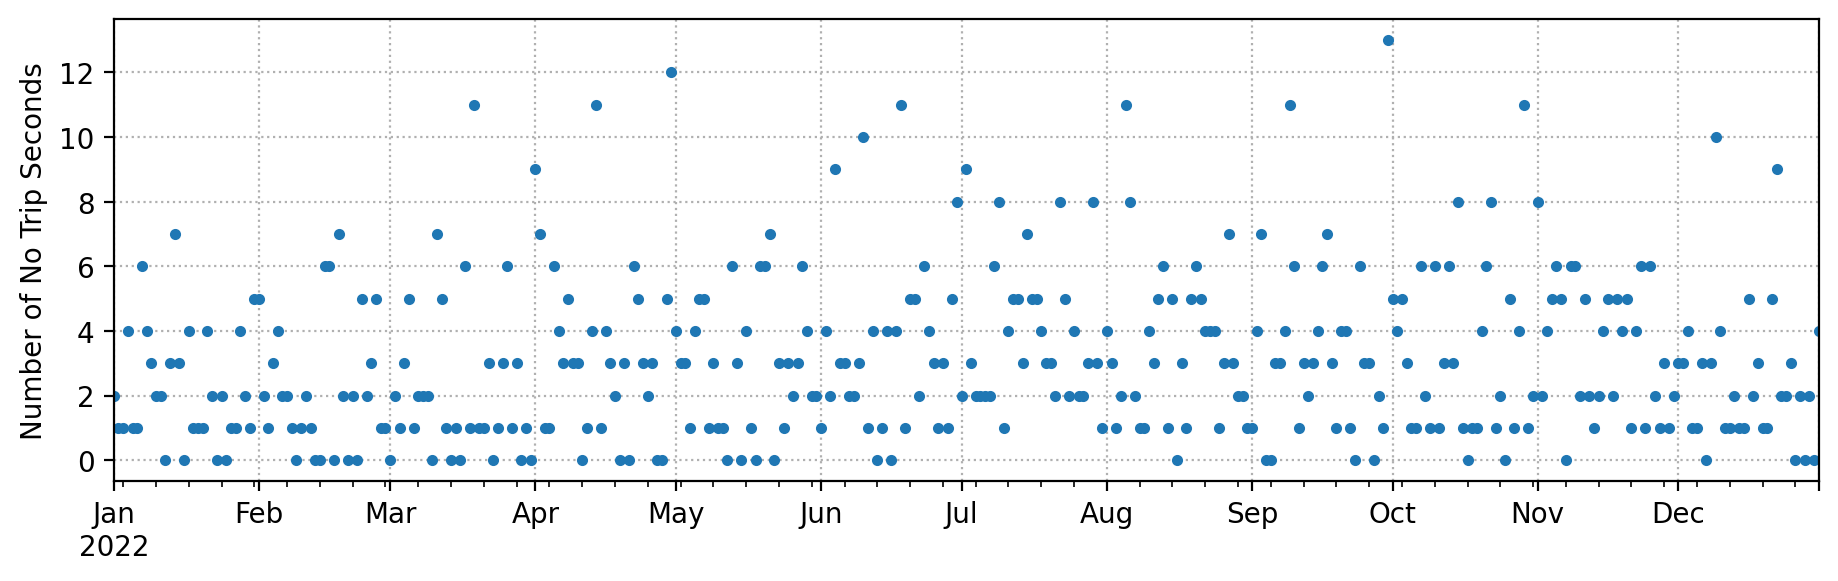

In [66]:
# Q: Is trip seconds missing randomly over date?
ax = (df['Trip Start Timestamp']
      [df['Trip Seconds'].isna()]
      .dt.date
      .value_counts()
      .reindex(index=pd.date_range('2022-01-01', '2022-12-31'), fill_value=0)
      .plot(figsize=(11, 3), marker='.', linestyle='', ylabel='Number of No Trip Seconds'))
ax.grid(linestyle=':')

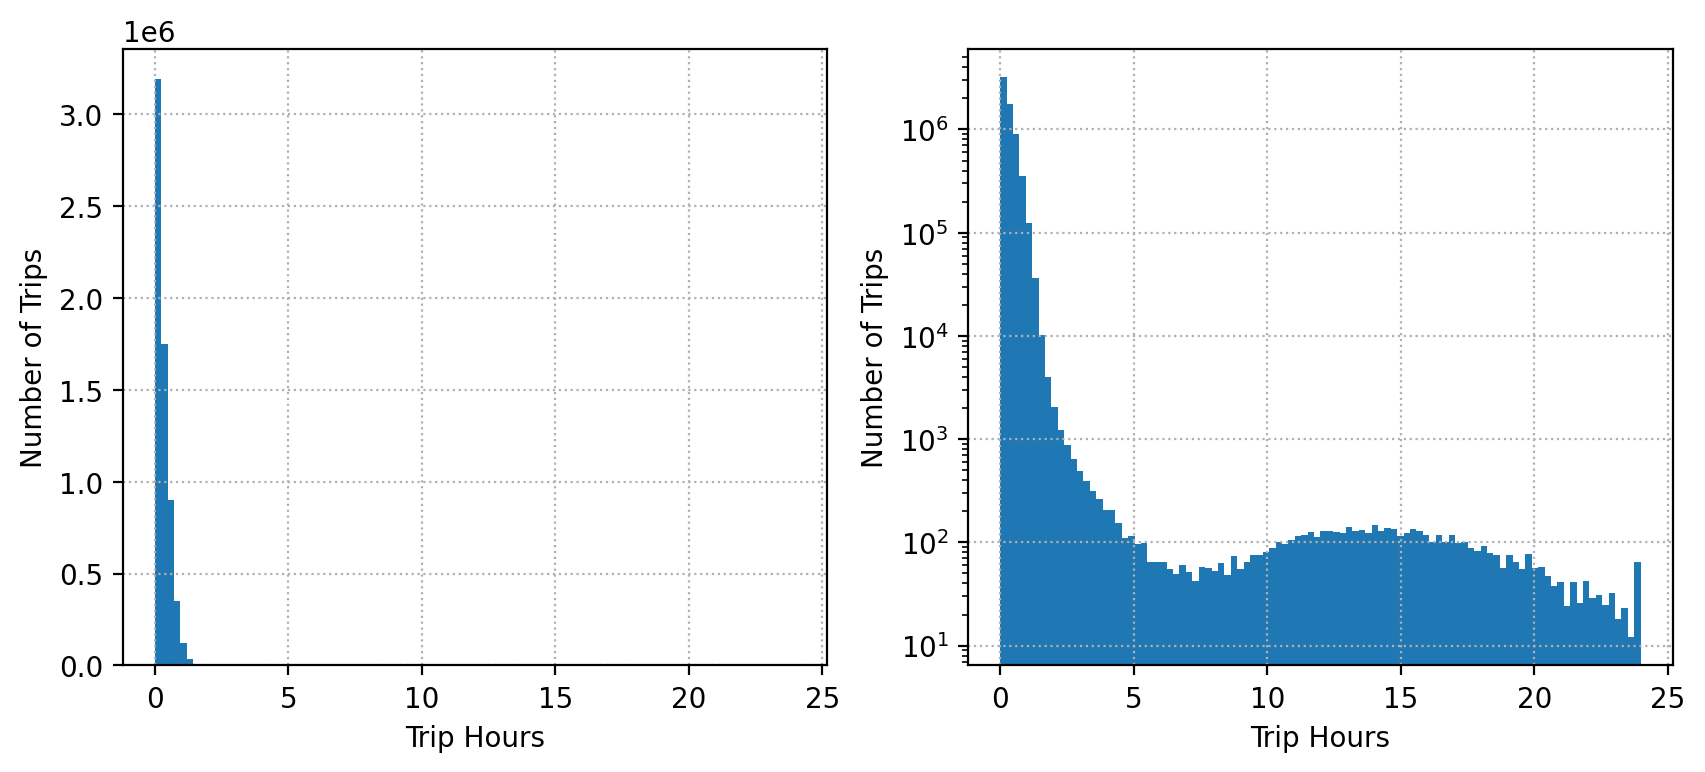

In [67]:
# Q: What is the distribution of trip seconds?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['Trip Seconds'] / 3600).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Trip Hours')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['Trip Seconds'] / 3600).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Trip Hours')
ax2.set_ylabel('Number of Trips')

plt.show()

In [68]:
# Q: What is the range of trip seconds?
df['Trip Seconds'].min(), df['Trip Seconds'].max(), df['Trip Seconds'].max() / 3600

(0.0, 86341.0, 23.98361111111111)

In [69]:
# Q: Is trip seconds an integer?
idx = df['Trip Seconds'].notna()
(df['Trip Seconds'][idx].round() == df['Trip Seconds'][idx]).all()

True

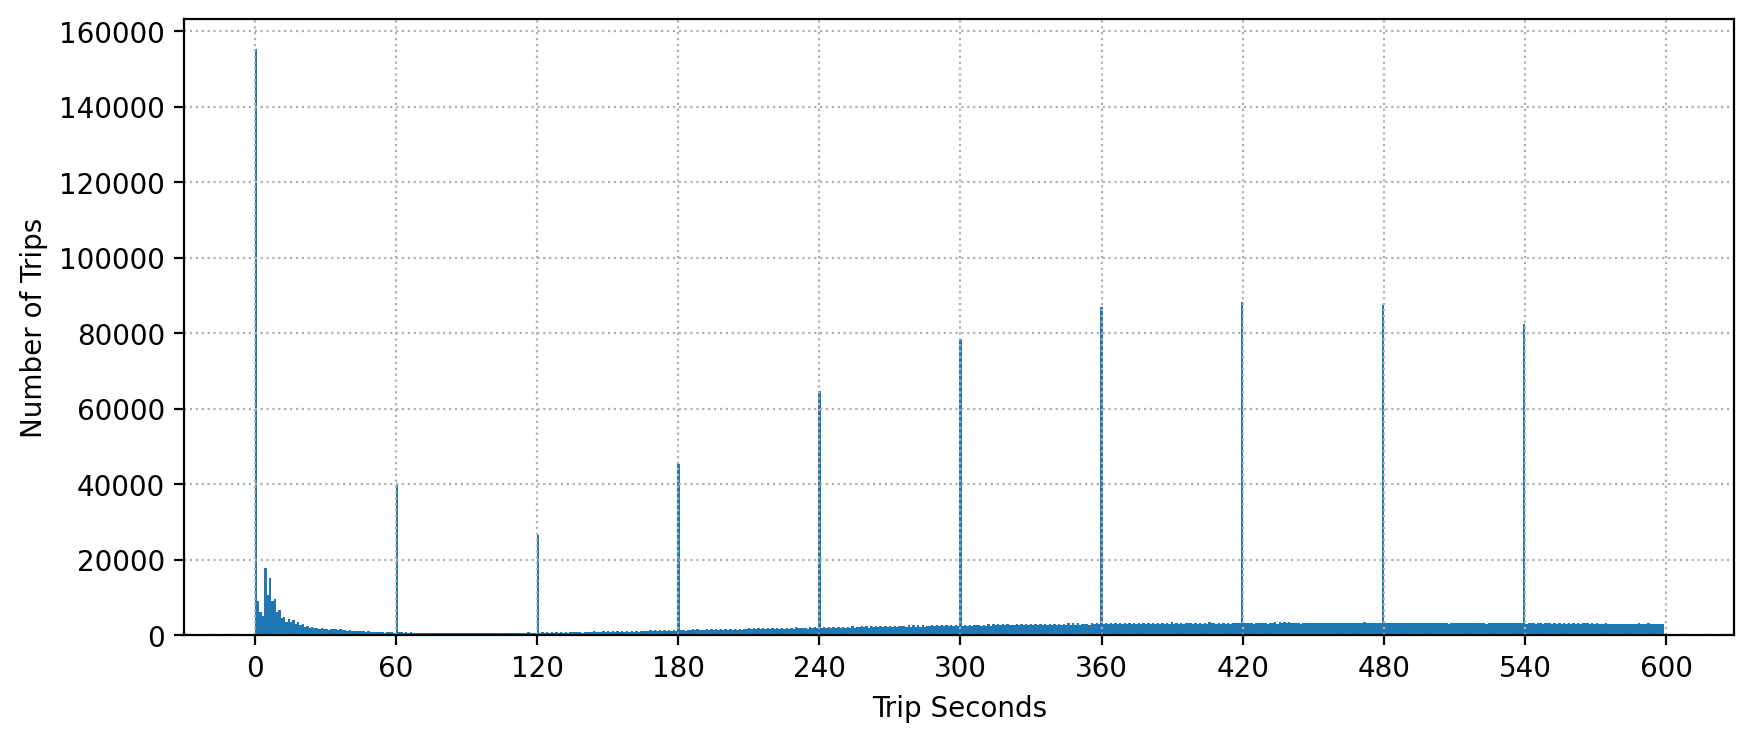

In [70]:
# Q: What is the distribution of trip seconds < 10 mins?
ax = (df['Trip Seconds'][df['Trip Seconds'] < 10 * 60]).hist(figsize=(10, 4), bins=600, grid=False)
ax.set_xticks(np.arange(0, 600 + 0.1, 60))
ax.grid(linestyle=':')
ax.set_xlabel('Trip Seconds')
ax.set_ylabel('Number of Trips');

In [71]:
# Q: What trip seconds represent the spikes above?
df['Trip Seconds'][df['Trip Seconds'] < 600].value_counts().head(10).sort_index()

Trip Seconds
0.0      155315
60.0      40107
120.0     26601
180.0     45509
240.0     64652
300.0     78467
360.0     86876
420.0     88281
480.0     87509
540.0     82453
Name: count, dtype: int64

In [72]:
# Q: Anything special about rows with 0 trip seconds?
df[df['Trip Seconds'] == 0].sample(10)

Trip ID  \
1963508  3512dec3c6d4cb4d851904838926a9212f30780c   
934848   b5f78d96041f5becec4566eea953fc2ef3a899f3   
2515185  551010a2898390fd7a40e80262ec434f2e56eb72   
2465086  8640a0574059f5025ecfd00d6f7f77384acce741   
4594134  2161a3e40bc37e5d41082fcf75f9faffdc2a65d3   
655627   290610c5dac40b22e7f50c6fca738faf1be34dfa   
4468952  b88cfa394d151e9b9e2ce6410b54f5685a3a2df2   
6324653  d2c565b9e7856d6028bc9515c00c0b4e64b7b51d   
3565739  59d8a513764716c706932b9ba9a922e4d2b97eb0   
337520   fcafc2563c86c867f1bcc978b40778415202486b   

                                                   Taxi ID  \
1963508  515dbaaba624daeb95c3dfefb93bfc1764b99ed2ff96b7...   
934848   4b92a02bf38d961c406e957edbe057dcafbd12d849d136...   
2515185  8710eb500626e6ff19dff2f1ed8d6253f89e99257fb11b...   
2465086  a9263292f54a406cd0fb2bac808b9aaca91f770ad5e0fd...   
4594134  ea4daf4e61f0f63ebcab3cf3a5e6400c14f65b95b191b2...   
655627   7a94870d6dd64df1780e28ebf8ca00311621929b717fa4...   
4468952  89ee7f39a29ed33f083ce17d20e0d9f7a07528a5188084...   
6324653  b130cba438002c59995778af059b4665aa6602d70a185a...   
3565739  f81c929ea7d9107e6de8bd7ee335f42563b3413e967e98...   
337520   cb3bd991c2f7932527ef9d5f341674dfba53745f25fe3e...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
1963508  2022-05-14 04:30:00 2022-05-14 04:30:00           0.0         0.0   
934848   2022-03-17 13:45:00 2022-03-17 13:45:00           0.0         0.0   
2515185  2022-06-10 09:15:00 2022-06-10 09:15:00           0.0         0.0   
2465086  2022-06-07 21:15:00 2022-06-07 21:15:00           0.0         0.0   
4594134  2022-09-25 05:45:00 2022-09-25 05:45:00           0.0         0.0   
655627   2022-02-27 17:30:00 2022-02-27 17:30:00           0.0         0.0   
4468952  2022-09-19 07:45:00 2022-09-19 07:45:00           0.0         0.0   
6324653  2022-12-28 17:00:00 2022-12-28 17:00:00           0.0         0.0   
3565739  2022-08-03 13:30:00 2022-08-03 13:30:00           0.0         0.0   
337520   2022-02-03 19:00:00 2022-02-03 19:00:00           0.0         0.0   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
1963508                  NaN                   NaN                    7.0   
934848                   NaN                   NaN                   77.0   
2515185                  NaN                   NaN                    NaN   
2465086                  NaN                   NaN                   28.0   
4594134                  NaN                   NaN                   32.0   
655627                   NaN                   NaN                    3.0   
4468952         1.703198e+10          1.703198e+10                   56.0   
6324653                  NaN                   NaN                    3.0   
3565739                  NaN                   NaN                   42.0   
337520          1.703128e+10          1.703128e+10                   28.0   

         Dropoff Community Area  ...  Extras  Trip Total  Payment Type  \
1963508                     7.0  ...    9.50       12.75   Credit Card   
934848                     77.0  ...    1.34        4.59          Cash   
2515185                     NaN  ...    0.00        3.25          Cash   
2465086                    28.0  ...    0.00        3.25          Cash   
4594134                    32.0  ...    0.00        3.25          Cash   
655627                      3.0  ...    0.00        3.25          Cash   
4468952                    56.0  ...    0.00       50.00          Cash   
6324653                     3.0  ...    0.00        3.25          Cash   
3565739                    42.0  ...    0.00        3.25          Cash   
337520                     28.0  ...    0.00        3.25          Cash   

                                   Company  Pickup Centroid Latitude  \
1963508          Taxi Affiliation Services                 41.922686   
934848   Blue Ribbon Taxi Association Inc.                 41.986712   
2515185          Taxi Affiliation Ser

In [73]:
# Q: Does 0 trip seconds always have same trip start and end times?
idx = df['Trip Seconds'] == 0
(df['Trip Start Timestamp'][idx] == df['Trip End Timestamp'][idx]).all()

True

In [74]:
# Q: Does 0 trip seconds always have 0 trip miles?
df['Trip Miles'][df['Trip Seconds'] == 0].value_counts().head(20)

Trip Miles
0.00    148340
0.10      3340
0.20       759
0.30       286
0.40       180
1.00       138
0.50        97
0.60        82
0.70        78
1.10        76
0.90        63
0.80        62
1.20        61
1.30        56
1.40        45
0.01        43
1.80        39
1.60        39
1.50        37
1.90        24
Name: count, dtype: int64

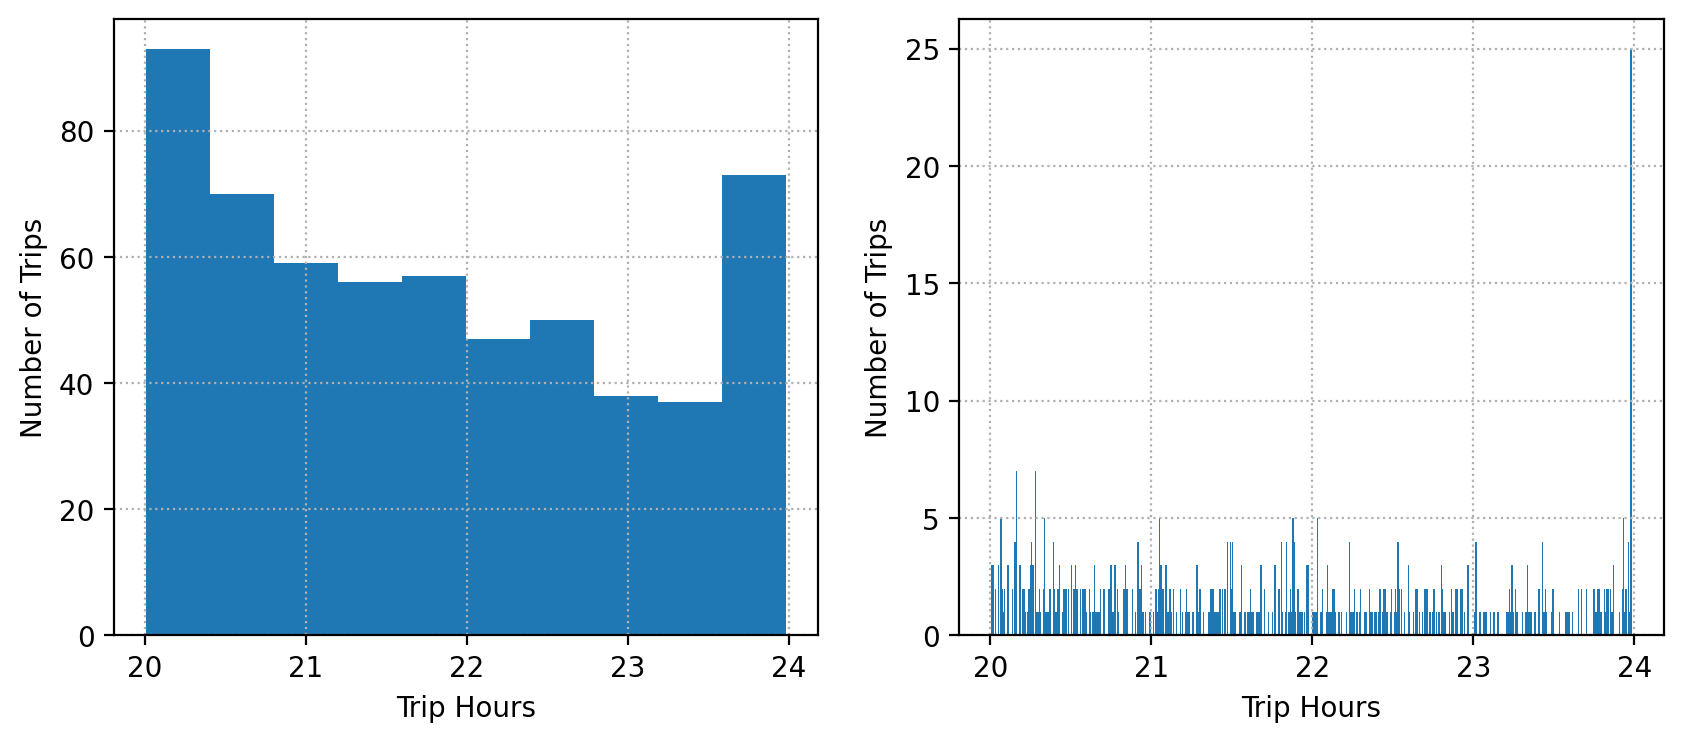

In [75]:
# Q: What is the distribution of trip seconds > 20 hours?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
idx = df['Trip Seconds'] > 20 * 3600
(df['Trip Seconds'][idx] / 3600).hist(ax=ax1, bins=10, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Trip Hours')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['Trip Seconds'][idx] / 3600).hist(ax=ax2, bins=500, grid=False)
ax2.grid(linestyle=':')
ax2.set_xlabel('Trip Hours')
ax2.set_ylabel('Number of Trips')

plt.show()

In [76]:
# Q: Anything special about rows with largest trip seconds?
df.nlargest(10, 'Trip Seconds') # df.sort_values('Trip Seconds', ascending=False).head(10)

Trip ID  \
6288168  a5deb6ab2df749afb7311157e1772f9c143020fe   
10032    bdfca001e3fbe3aa83a3923ee3af7cef9ff17520   
23719    d2ceca4d538bc6bdb0c7cfde1fdd934580e5350e   
136776   aa15c3e7cc3a552be9e2c2f6c4c7f5669b62fdf6   
414236   5bc0e6b1d8605920b3c23eb2cec072ac486fa73b   
723997   acaae1d2bc56fa6288d5676b1a459f0c82991dc5   
971144   f7ded1b39f3992efc8aac01a4535396cd84062b9   
1173965  b0827c1f523937c84f9d062f53e295eb2823a99c   
1813282  bf4fa12348122bcc9b38e0755933f7fd613f7ac5   
2000727  e431bed9f472bbda0fc545e9bab948302f765e39   

                                                   Taxi ID  \
6288168  bd374a36d0bd458e1312943ef55bd51b64d65bdc654154...   
10032    82436a5c2f9503cc461215c839f24fa16fa7f02d9390bb...   
23719    82436a5c2f9503cc461215c839f24fa16fa7f02d9390bb...   
136776   82436a5c2f9503cc461215c839f24fa16fa7f02d9390bb...   
414236   82436a5c2f9503cc461215c839f24fa16fa7f02d9390bb...   
723997   82436a5c2f9503cc461215c839f24fa16fa7f02d9390bb...   
971144   82436a5c2f9503cc461215c839f24fa16fa7f02d9390bb...   
1173965  82436a5c2f9503cc461215c839f24fa16fa7f02d9390bb...   
1813282  82436a5c2f9503cc461215c839f24fa16fa7f02d9390bb...   
2000727  82436a5c2f9503cc461215c839f24fa16fa7f02d9390bb...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
6288168  2022-12-25 11:45:00 2022-12-26 11:45:00       86341.0        1.94   
10032    2022-01-02 11:15:00 2022-01-03 11:00:00       86340.0        0.00   
23719    2022-01-03 15:15:00 2022-01-04 15:15:00       86340.0        0.00   
136776   2022-01-15 11:30:00 2022-01-16 11:15:00       86340.0        0.00   
414236   2022-02-10 08:45:00 2022-02-11 08:45:00       86340.0        0.00   
723997   2022-03-04 11:00:00 2022-03-05 11:00:00       86340.0        0.00   
971144   2022-03-19 14:15:00 2022-03-20 14:15:00       86340.0        0.00   
1173965  2022-03-31 08:00:00 2022-04-01 08:00:00       86340.0        0.00   
1813282  2022-05-06 13:15:00 2022-05-07 13:15:00       86340.0        0.00   
2000727  2022-05-16 12:00:00 2022-05-17 12:00:00       86340.0        0.00   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
6288168                  NaN                   NaN                    8.0   
10032                    NaN                   NaN                   56.0   
23719           1.703198e+10                   NaN                   56.0   
136776                   NaN                   NaN                    8.0   
414236          1.703198e+10                   NaN                   56.0   
723997          1.703184e+10          1.703108e+10                   32.0   
971144                   NaN                   NaN                   56.0   
1173965         1.703132e+10                   NaN                   32.0   
1813282         1.703198e+10                   NaN                   76.0   
2000727                  NaN                   NaN                    NaN   

         Dropoff Community Area  ...  Extras  Trip Total  Payment Type  \
6288168                    32.0  ...     1.5        9.75          Cash   
10032                       6.0  ...     0.0       58.25   Credit Card   
23719                       NaN  ...     0.0       84.50   Credit Card   
136776                      NaN  ...     0.0      105.50   Credit Card   
414236                      NaN  ...     0.0       92.50   Credit Card   
723997                      8.0  ...     0.0       40.75   Credit Card   
971144                      NaN  ...     0.0       55.50   Credit Card   
1173965                     NaN  ...     0.0      109.50   Credit Card   
1813282                     NaN  ...     0.0      105.00   Credit Card   
2000727                     NaN  ...     0.0       32.25   Credit Card   

            Company  Pickup Centroid Latitude Pickup Centroid Longitude  \
6288168    Sun Taxi                 41.899602                -87.633308   
10032    Globe Taxi                 41.792592                -87.769615   
23719    Globe Taxi         

In [77]:
df['trip_time'] = (df['Trip End Timestamp'] - df['Trip Start Timestamp']).dt.total_seconds()
# http://dev.cityofchicago.org/open%20data/data%20portal/2019/04/12/tnp-taxi-privacy.html

C:\Users\Owner\AppData\Local\Temp\ipykernel_14892\3251285320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_time'] = (df['Trip End Timestamp'] - df['Trip Start Timestamp']).dt.total_seconds()


In [78]:
# Q: What is the range of derived trip time?
df['trip_time'].min(), df['trip_time'].max(), df['trip_time'].max() / 3600

(0.0, 1788300.0, 496.75)

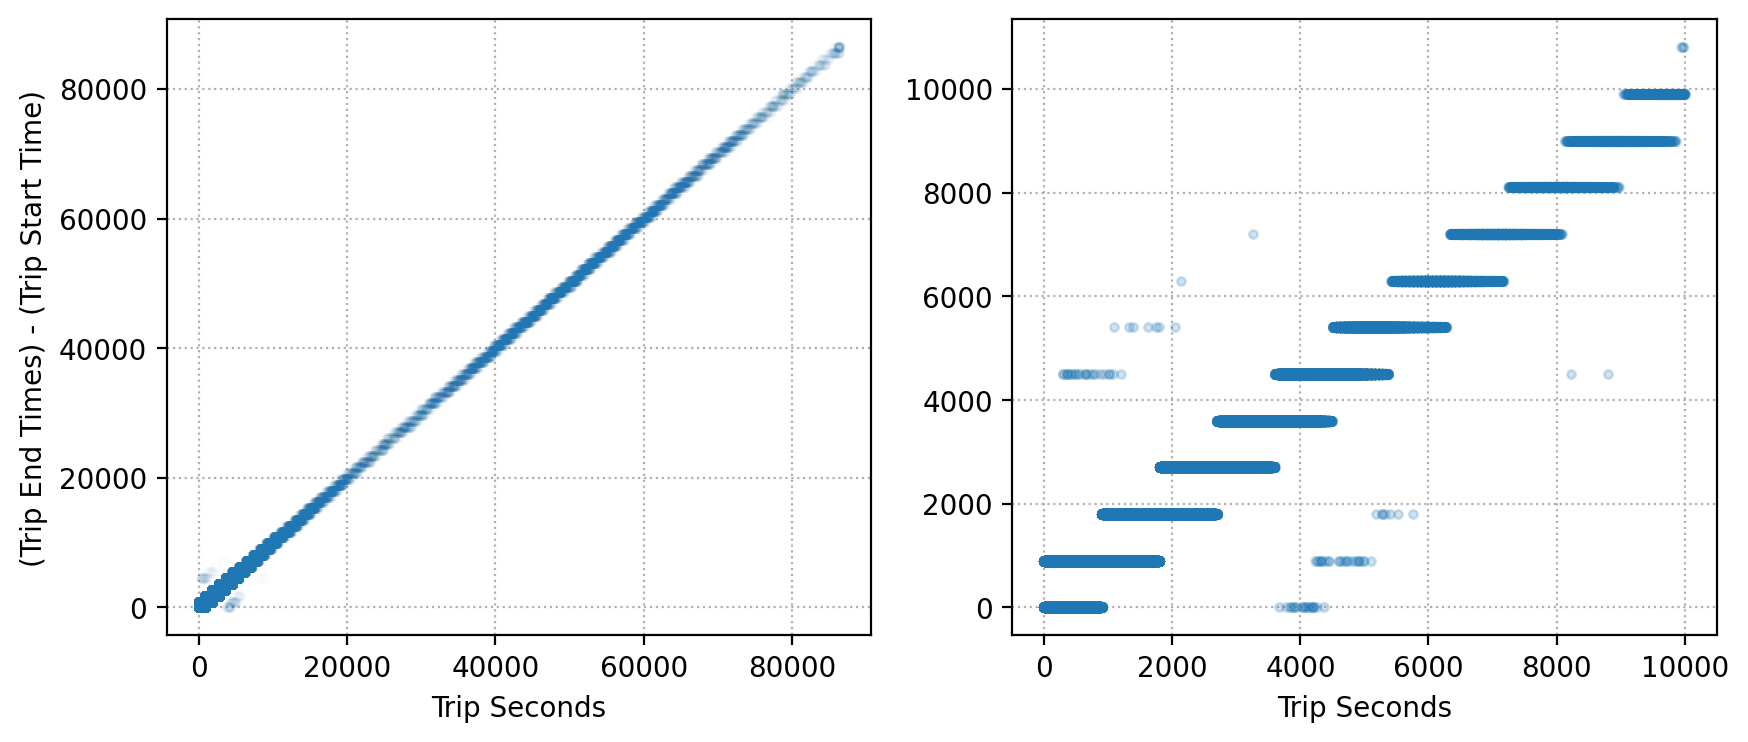

In [79]:
# Q: Is trip seconds vs derived trip time consistent?
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
idx = df['Trip Seconds'].notna()
plt.plot(df['Trip Seconds'][idx], df['trip_time'][idx], '.', alpha=0.01)
plt.xlabel('Trip Seconds')
plt.ylabel('(Trip End Times) - (Trip Start Time)')
plt.grid(linestyle=':')

plt.subplot(1, 2, 2)
idx = df['Trip Seconds'].notna() & (df['Trip Seconds'] < 10000)
plt.plot(df['Trip Seconds'][idx], df['trip_time'][idx], '.', alpha=0.2)
plt.xlabel('Trip Seconds')
plt.grid(linestyle=':')

plt.show()

In [80]:
# Q: Anything special about rows with largest trip time?
df.nlargest(10, 'trip_time')

Trip ID  \
383030   7f5ab878f7da793a989acfbdf26562b5ee334017   
2518294  cbe2504677538822edc5fd198d7d3d328a6cdbc2   
1789091  3de00b7c66e0e2b73fd740f08a8f7efd85cdb4ec   
867358   2a9f1a69f80d72f55b1feda68660155d43446bd4   
426592   b5a4a54f0e872dfb6fcc219fdaa681c2b8d226f7   
3625360  a5d3156de72380b0b41de34b1af3bb55c8cd273c   
3141146  a34575cf20f0fdcd2b7ec5fefc4d773c4a9de531   
5340256  0abc651fe0c0df890c58764de5c7454cadeb2b18   
166590   6775fb2b8591005e5feb7f463e6498a396c5897b   
4320046  b2ecd7681dc3e96bd4b1f33884debac1447995a2   

                                                   Taxi ID  \
383030   daf26343c74ba7742cf4ea2c61ffbff2209dd45f36a891...   
2518294  4f78222d267c08ee7267810e5f3f2241dc61bf1396d036...   
1789091  cfee0ed5f6fc991e0676185e33e05756684b245a257633...   
867358   e54b5e0b458fbbfdbd31472d001c5a9fe79aec496e24b4...   
426592   3278a0dd17ed3de47adf8cf7236bf8f21f29e62c04394b...   
3625360  daf26343c74ba7742cf4ea2c61ffbff2209dd45f36a891...   
3141146  6cf97b9e8e3e1c183c090cdd868df381de772a52987239...   
5340256  def4d7f708bad8d98ae110c6986f6b77558d0f431abe51...   
166590   afd6682bb3e13d9d0fc86c0a11d897f505a5d529808311...   
4320046  dd49823dc32cc1ab686ed5873c2652d7bc1ffde6aac7cc...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
383030   2022-02-07 17:00:00 2022-02-28 09:45:00           NaN        1.20   
2518294  2022-06-10 11:45:00 2022-06-30 06:15:00           NaN       12.10   
1789091  2022-05-05 11:45:00 2022-05-22 13:15:00           NaN       19.60   
867358   2022-03-13 01:30:00 2022-03-28 07:45:00           NaN       16.70   
426592   2022-02-11 03:45:00 2022-02-20 17:15:00           NaN       15.40   
3625360  2022-08-06 09:30:00 2022-08-13 12:00:00           NaN        1.10   
3141146  2022-07-12 15:15:00 2022-07-19 12:15:00           NaN        0.00   
5340256  2022-11-01 17:45:00 2022-11-08 12:45:00           NaN        8.62   
166590   2022-01-18 16:45:00 2022-01-25 10:15:00           NaN        0.00   
4320046  2022-09-12 14:00:00 2022-09-19 07:00:00           NaN        0.00   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
383030                   NaN                   NaN                    3.0   
2518294                  NaN                   NaN                    8.0   
1789091         1.703198e+10          1.703184e+10                   76.0   
867358                   NaN                   NaN                   76.0   
426592                   NaN                   NaN                   76.0   
3625360         1.703132e+10          1.703198e+10                   32.0   
3141146                  NaN                   NaN                   22.0   
5340256         1.703198e+10          1.703198e+10                   76.0   
166590                   NaN                   NaN                    NaN   
4320046                  NaN                   NaN                    2.0   

         Dropoff Community Area  ...  Trip Total  Payment Type  \
383030                     51.0  ...       52.25       Unknown   
2518294                    30.0  ...       39.25          Cash   
1789091                    33.0  ...       53.75          Cash   
867358                      NaN  ...       57.40   Credit Card   
426592                      7.0  ...       48.00   Credit Card   
3625360                    76.0  ...       47.75   Credit Card   
3141146                    22.0  ...        3.25          Cash   
5340256                    76.0  ...       51.00          Cash   
166590                      NaN  ...        3.25          Cash   
4320046                     2.0  ...        3.25          Cash   

                               Company  Pickup Centroid Latitude  \
383030       Taxi Affiliation Services                 41.965812   
2518294  Taxicab Insurance Agency, LLC                 41.899602   
1789091                      U Taxicab                 41.979071   
867358         Choice Taxi Association                 41.980264   
4

In [81]:
# Q: Anything special about rows with inconsistent trip seconds vs derived trip time?
df[(df['Trip Seconds'] - df['trip_time']).abs() > 15 * 60]

Trip ID  \
867103  2b916b12d79ba8a79b5cbee62c1d40058d34719f   
867238  1dd26b34200e2376e2ffcca4fdac3b6e151596af   
867350  1576ec5b21fa02b5434b84981b36484eea576ca6   
867371  3e66777056aa36be03320132873964e196c847c2   
867382  54c81ffd18f27fa1c86321fbaf737e9fe38b0f1a   
...                                          ...   
867644  e143f1e71a6562b430a223fd38cc78497da7a0b8   
867647  e2c5fab1ff5aeaf8e170ba912c4249c6b1c81dde   
867649  e6d778349506a6258058d94cf297d091e0957dd6   
867651  eab514cbbd6fc750a8e7902530a1ac286b6024bf   
867660  fd3e2a4e828280ed15e270f8ec64705eedaa3562   

                                                  Taxi ID  \
867103  1aa7696cf1ac4c5d9e302177fdb918829d2ddcd9d420a3...   
867238  5648d53206ccad62bbe17e3d36016271b55c5b23916cc0...   
867350  678095878a2306fa01b08e520d914baaf2ace4999c5118...   
867371  1cbeb81c014454ffb50758bd2968302bb9a443b3df9889...   
867382  31d18c12a75eaeb647e36a502a0c3e548fe4e08ed6f7f4...   
...                                                   ...   
867644  ac631f0167353286bd820a3d29d38490cf7380d95b59d5...   
867647  4136627ef25b9fad79910c55679c02d8e1f2a42925d29c...   
867649  0a2412f478181908974ce4f03ac52607833c0a92f3c4ff...   
867651  9a8899dcdf0d6b8a716018392bed8c6dafe929b0b7ea7d...   
867660  04314cd00cdc5987ed8e77a1a69fc1f13d34916df96e14...   

       Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
867103  2022-03-13 01:00:00 2022-03-13 03:00:00        3260.0       10.32   
867238  2022-03-13 01:15:00 2022-03-13 03:00:00        2131.0       27.41   
867350  2022-03-13 01:30:00 2022-03-13 03:00:00        2043.0       23.97   
867371  2022-03-13 01:30:00 2022-03-13 03:00:00        1620.0       16.30   
867382  2022-03-13 01:30:00 2022-03-13 03:00:00        1330.0       17.18   
...                     ...                 ...           ...         ...   
867644  2022-03-13 03:00:00 2022-03-13 03:15:00        4224.0        0.82   
867647  2022-03-13 03:00:00 2022-03-13 03:30:00        5520.0        1.00   
867649  2022-03-13 03:00:00 2022-03-13 03:00:00        4119.0        1.40   
867651  2022-03-13 03:00:00 2022-03-13 03:15:00        4320.0        4.16   
867660  2022-03-13 03:00:00 2022-03-13 03:30:00        5321.0        0.00   

        Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
867103                  NaN                   NaN                   70.0   
867238         1.703198e+10                   NaN                   76.0   
867350                  NaN                   NaN                    NaN   
867371                  NaN                   NaN                   56.0   
867382                  NaN                   NaN                    3.0   
...                     ...                   ...                    ...   
867644                  NaN                   NaN                    8.0   
867647                  NaN                   NaN                   56.0   
867649                  NaN                   NaN                    8.0   
867651                  NaN                   NaN                    6.0   
867660                  NaN                   NaN                   28.0   

        Dropoff Community Area  ...  Trip Total  Payment Type  \
867103                    35.0  ...       35.75        Prcard   
867238                     NaN  ...      127.81   Credit Card   
867350                     NaN  ...       91.00          Cash   
867371                     6.0  ...       51.75   Credit Card   
867382                     NaN  ...       94.00   Credit Card   
...                        ...  ...         ...           ...   
867644                     8.0  ...        7.50          Cash   
867647                     7.0  ...       57.25   Credit Card   
867649                    32.0  ...        8.50          Cash   
867651                     8.0  ...       17.29        Mobile   
867660                     6.0  ...       27.85        Mobile   

                          Company  Pickup Centroid Latitude  \
8

In [82]:
# Q: What trip start time have inconsistent trip seconds and derived trip time?
df['Trip Start Timestamp'][(df['Trip Seconds'] - df['trip_time']).abs() > 15 * 60].value_counts().sort_index()

Trip Start Timestamp
2022-03-13 01:00:00     1
2022-03-13 01:15:00     1
2022-03-13 01:30:00     7
2022-03-13 01:45:00    23
2022-03-13 03:00:00    51
Name: count, dtype: int64

In [83]:
# Q: How many missing trip miles?
df['Trip Miles'].isna().sum()

56

In [84]:
# Q: Anything special about rows with missing trip miles?
df[df['Trip Miles'].isna()]

Trip ID  \
561      cbca8a8c3f25c86499bd64b847e7ca47f46e6a3e   
6998     5440c56a4c96a4800279419918aaa73e5781b8d4   
10842    ced3875911ddb95261695ded805d788b5e597c58   
18182    350a74da7035f5adc4a0c2e034251e3c674c566a   
21907    bfa369223ce70f216b8d7c79700e4b4736604aaf   
59257    48a317592603fb2f3677dd94c7ab83a96b0f3c76   
62676    80fcc5c3121214e61c7a17afe5c0186cc761f17d   
72697    329d68ee4086f0957673abd0e66c1cf27bf27c5e   
77245    380b8cde878cbe9699dfba795d71884ee1f50628   
77512    0f5527b65af977285e15163b7ff86b7a8366093a   
84315    8b863936dc42c37183edd10fe26b81efb0190603   
115554   7fb71c571968f2328deeefbc9c4d009dfcd15d38   
134743   3745fb2cd3e805c51fe25530a00edf4f084000bf   
212546   9cf6b45d97f5abbcc6d644b5f160e7cd6adb892a   
300603   dc78b6f91db06e688c338657e192cdbf55eb91db   
313722   6e788ff4149e74d42662fa9bbafaab386b305178   
363101   90dfcd5f558c4e60d6b14903e04b978aac6eb0d8   
480255   5df02ce3a8b78d68b68cd5e41de80757025675ba   
538191   e23080afac3ce6eb85bdbbd8fe591fc5dd4422d4   
564128   851b78e6ba9edebfec3d05a80d4d72029137ba12   
602280   71408b1842433f478180d76eaeee080ada335ae1   
604051   7018ad5d25094e6045734847b6d89f52968bcae8   
604607   58f6c51953b64818064fc8514caf8e061ca79365   
634086   d813596b9bd909d692f5dfa69712246129680cee   
648562   8f747ffd9f30efaca65f00bc00a6d8e745f621f6   
757455   d8eca618e422d8922c0b1606bed60365e51b7971   
948460   8cbb9ff3835c504739133901f2473edc28693206   
949222   1b65773af7e5d6be89b0492fa8cfa616025b4baa   
952046   1625740c0edaa8e80f750fc464e220e462c54d1b   
995256   3dd13c99367382536e39cdf5adfe19bc06c1b25b   
1016966  c3b2f744797c69c0713562ce5ca1c09d8bd8204f   
1095751  6602f855814f58166851f730d12314c82058a527   
1522271  d67b5289dcf4a1c89c6ad9ed3477b9e4990b98e6   
1532915  2c2825d55f67a48089bdc10d84c04e1c684ef7f3   
1661481  ee4d34e56a29591ba43ae549f206b9f536da3629   
1834477  2a02fab9a7ce4218897660e8f00de1caaf9f0e15   
1902774  64353ea4f442c773c3a910cb8f970a0194a1c731   
2256914  c569290b68fec8b793f9e10ff2b8f3663e720aba   
2522328  38d367e9191996991c2a7be0227f054b794308ed   
2540264  e9f102f60cecc19b3deb2f52a81a378a5f63192f   
2595594  f8b13d72d23526f7e591e51e6438d71ec73664fa   
2649744  c74d9d805a2db27da2078a28c13babedec23df5e   
2666057  878ddf1573fe0adae49572a72f731c6b4d77f9d5   
2805830  b7ae55fbf857154c9e848634c952b7d94b984480   
3002308  ea349572738a2b3e5443d2a5d52225e8885f4005   
3229809  d147822b1f67409f472082c5a3ac7f84847aafb9   
3713790  d53dd9b27db54dc9aca17f36feb577a0e87cd4d5   
4025887  67977e35a4451725ceaae6a8e53d705c9eece4c0   
4242642  1b27999d4523c9790fe321899482750e5a337d2c   
4278854  ac6f2c9179115d5932dacd156eeeb2c4e545267e   
4708165  d965a2280bf6aa30252c603d1156517dabb82f0e   
4897313  1c09af16b944d78ad7c219709e4378340a1e9afe   
5282161  e19fd7eb304c9e4c6e5a96790aa7911521e833d4   
5482636  b14104e75443c814504850a8bdf4d25b8e388f64   
5765363  dc2ab3868e6ccfb3deab5859d9daea6b76cf0f56   
6002423  a8715df009bb62bcc8b5aace417207b5c0bc0f40   

                                                   Taxi ID  \
561      201c8f3d95f81b3d765f2ea3fc7a640031a3f73d6dbfb1...   
6998     137a3605d33badaf4f3ced9115d44ebd822c90ec3cedcb...   
10842    af81055879d24a95160c247f6cd3e00fe32d1810082902...   
18182    b597697c5b962a3f36ed67d274ec82ed1b72232c537b5a...   
21907    ddc0a237498a82a0803761188d0ea048623b5d91f29ad2...   
59257    d34bb905b4c5c5e6eb5fd923ee496a3741dddda46d95dc...   
62676    7274daf07dd4da878465e03ee2f72165d7e044bcde1c2c...   
72697    045270ae331ab61646c36aaf542de0077e97a5b0294e29...   
77245    cf39200ae52386dfa52be5a8e1da54653690fac9fba627...   
77512    201c8f3d95f81b3d765f2ea3fc7a640031a3f73d6dbfb1...   
84315    95ec993d14762b5d1b7e4d2b30661da6b49b7f0c1eb20f...   
115554   71ebe150c7d317935a0843c988eea605df50b3ba7cb6bf...   
134743   cf39200ae52386dfa52be5a8e1da54653690fac9fba627...   
212546   cf39200ae52386dfa52be5a8e1da54653690fac9fba627...   
300603   68d8a6445d5b8aac5115462e9c9c4afd942413594d0863...   
313722   0c16d63294bfa9a1d64

In [85]:
df[df['Trip Miles'].isna()].count() # Most still have trip seconds and pickup dropoff locations

Trip ID                       56
Taxi ID                       56
Trip Start Timestamp          56
Trip End Timestamp            56
Trip Seconds                  55
Trip Miles                     0
Pickup Census Tract           16
Dropoff Census Tract          16
Pickup Community Area         50
Dropoff Community Area        51
Fare                          56
Tips                          56
Tolls                         56
Extras                        56
Trip Total                    56
Payment Type                  56
Company                       56
Pickup Centroid Latitude      50
Pickup Centroid Longitude     50
Pickup Centroid Location      50
Dropoff Centroid Latitude     51
Dropoff Centroid Longitude    51
Dropoff Centroid  Location    51
trip_time                     56
dtype: int64

In [86]:
# Q: Is trip miles missing randomly over date?
df['Trip Start Timestamp'][df['Trip Miles'].isna()].dt.month.value_counts().sort_index()

Trip Start Timestamp
1     15
2     10
3      7
4      3
5      3
6      6
7      2
8      2
9      3
10     2
11     2
12     1
Name: count, dtype: int64

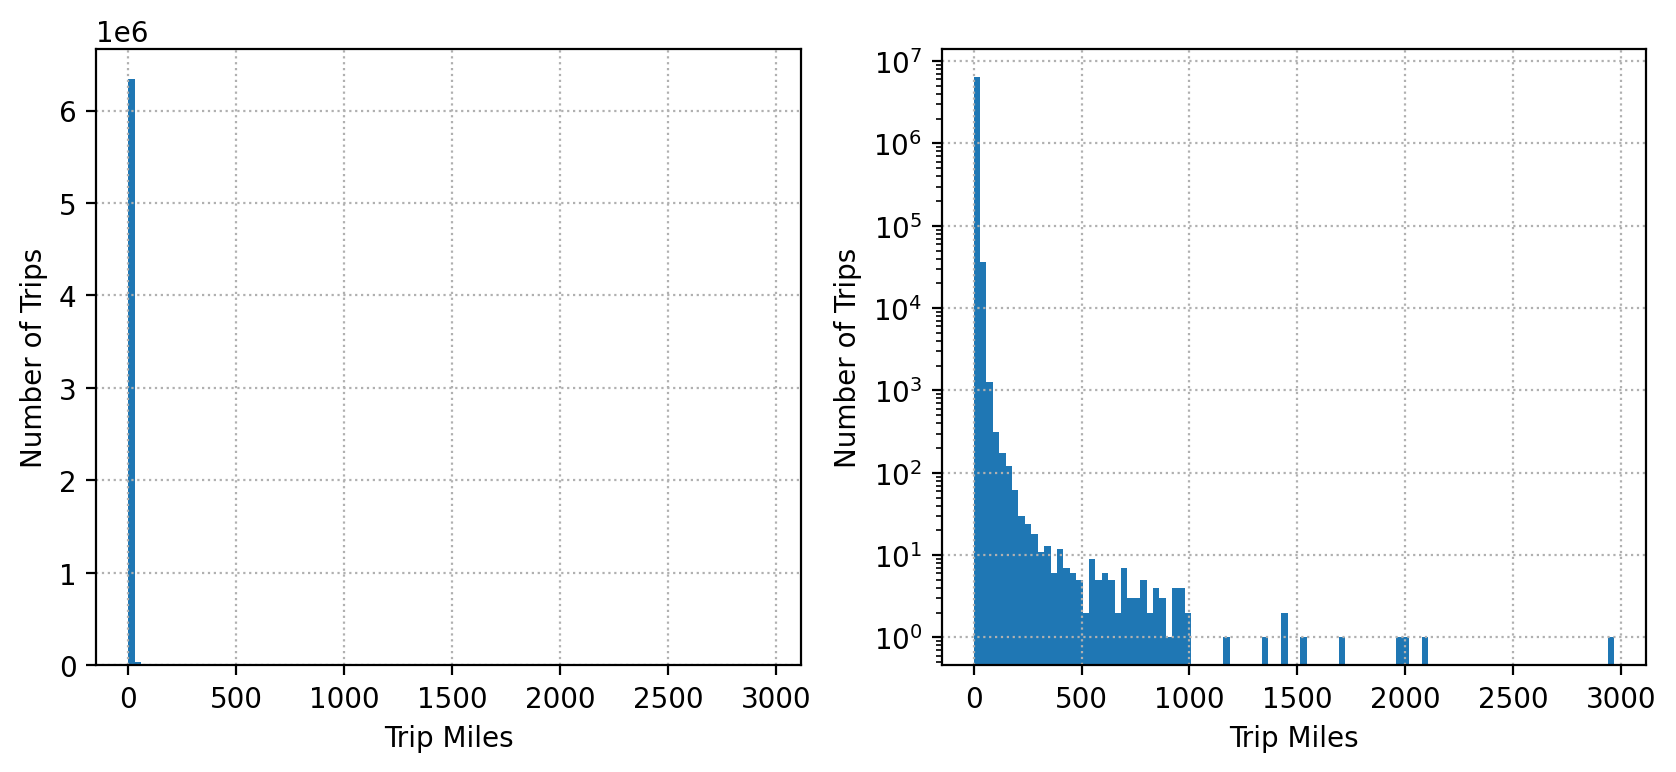

In [87]:
# Q: What is the distribution of trip miles?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['Trip Miles']).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Trip Miles')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['Trip Miles']).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Trip Miles')
ax2.set_ylabel('Number of Trips')

plt.show()

In [88]:
# Q: What is the range of trip miles?
df['Trip Miles'].min(), df['Trip Miles'].max(), df['Trip Miles'].max() * 1.609344 # In km

(0.0, 2967.54, 4775.7926937600005)

In [89]:
# Q: How many 0 trip miles?
df['Trip Miles'].value_counts().sort_index()

Trip Miles
0.00       794965
0.01        12989
0.02         9231
0.03         6851
0.04         5409
            ...  
1708.96         1
1985.20         1
2001.53         1
2087.55         1
2967.54         1
Name: count, Length: 7105, dtype: int64

In [90]:
# Q: What fraction of 0 trip seconds when 0 trip miles?
(df['Trip Seconds'][df['Trip Miles'] == 0] == 0).mean()

0.18659941003691988

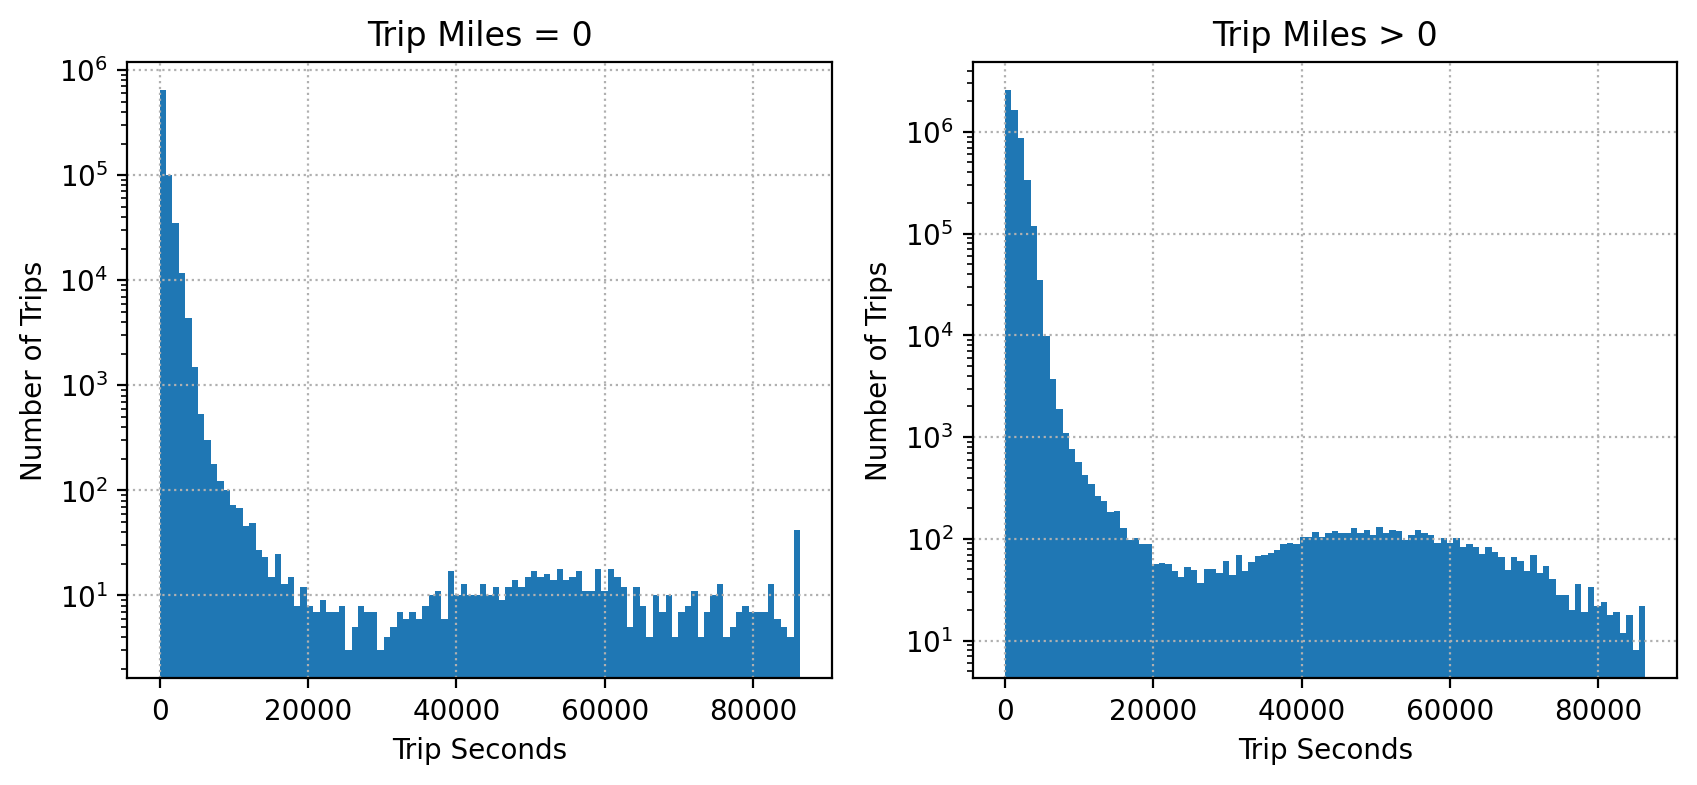

In [91]:
# Q: What is the distribution of trip seconds when 0 trip miles?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['Trip Seconds'][df['Trip Miles'] == 0]).hist(ax=ax1, bins=100, grid=False)
ax1.set_yscale('log')
ax1.grid(linestyle=':')
ax1.set_xlabel('Trip Seconds')
ax1.set_ylabel('Number of Trips')
ax1.set_title('Trip Miles = 0')

ax2 = plt.subplot(1, 2, 2)
(df['Trip Seconds'][df['Trip Miles'] > 0]).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Trip Seconds')
ax2.set_ylabel('Number of Trips')
ax2.set_title('Trip Miles > 0')

plt.show()

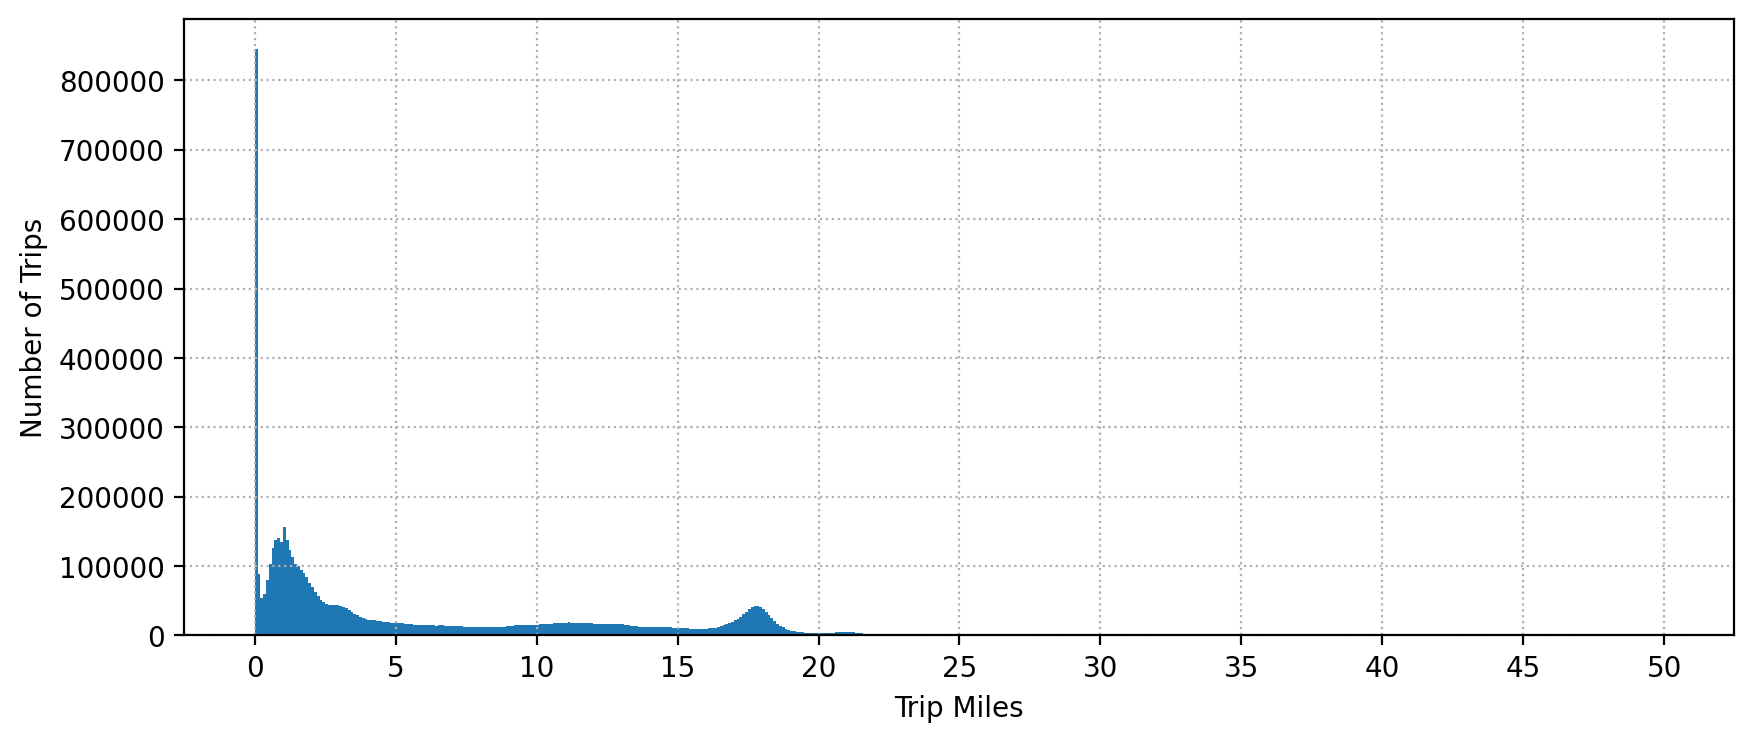

In [92]:
# Q: What is the distribution of trip miles < 50 miles?
ax = (df['Trip Miles'][df['Trip Miles'] < 50]).hist(figsize=(10, 4), bins=500, grid=False)
ax.set_xticks(np.arange(0, 50 + 0.1, 5))
ax.grid(linestyle=':')
ax.set_xlabel('Trip Miles')
ax.set_ylabel('Number of Trips');

In [93]:
# Q: Anything special about rows with longest trip miles?
df.nlargest(10, 'Trip Miles')

Trip ID  \
4043670  d2ef078e993f6ffa30c83ff1b44be36a236cb8e1   
140624   c2c943d04e5c9cab7da366f61e366f0a363395f2   
4275763  d65869e036de250f188dab6eb5ad2633a98bcef7   
3834321  63679d8944f674faba7f453ffc02ac4557d82cc6   
3834250  231c39254b2dade1be1545e16d181ef1739cee1f   
5655507  dd9651fbd8161c0f288d4fd5f66786e4e1868d4e   
6016505  eb6706718607e1f3470242ea5056f2e66c49fdab   
1370121  90e96b6cbcdb64f045112934516973cf7a71e47f   
1370415  eb0435c4aba344d8b7f75c04ebbd25cc0a522d49   
3058128  2c5f7352c66bf70c32b28eca93b4250204d8b625   

                                                   Taxi ID  \
4043670  f20c9c5845dab1e51799b959d378c102763d4b31d738da...   
140624   8ef1056519939d511d24008e394f83e925d2539d668a00...   
4275763  9b073503fc82b659145a716c7080758226d4dc63158673...   
3834321  c8c3f1713dadc77d30d959755c933092b402d0c3cef08e...   
3834250  c8c3f1713dadc77d30d959755c933092b402d0c3cef08e...   
5655507  84957c8960b674346784746bbc1d48cafff4976b162323...   
6016505  edd72a023f2bffadbf0081c4bb036a7137fec79c3e9ce4...   
1370121  1cbeb81c014454ffb50758bd2968302bb9a443b3df9889...   
1370415  1cbeb81c014454ffb50758bd2968302bb9a443b3df9889...   
3058128  d032016cdde07ebbac8ab34b98a534aed192e1c86d610f...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
4043670  2022-08-28 03:00:00 2022-08-28 03:15:00        1025.0     2967.54   
140624   2022-01-15 18:30:00 2022-01-15 18:30:00           2.0     2087.55   
4275763  2022-09-10 09:00:00 2022-09-10 09:00:00         486.0     2001.53   
3834321  2022-08-17 13:00:00 2022-08-22 15:15:00           NaN     1985.20   
3834250  2022-08-17 13:00:00 2022-08-19 12:00:00           NaN     1708.96   
5655507  2022-11-17 23:45:00 2022-11-17 23:45:00           2.0     1513.46   
6016505  2022-12-08 21:15:00 2022-12-08 21:30:00         643.0     1449.68   
1370121  2022-04-11 13:30:00 2022-04-11 13:30:00          60.0     1442.80   
1370415  2022-04-11 13:45:00 2022-04-11 13:45:00         240.0     1358.70   
3058128  2022-07-07 22:15:00 2022-07-09 14:45:00           NaN     1164.64   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
4043670                  NaN                   NaN                    NaN   
140624                   NaN                   NaN                    8.0   
4275763                  NaN                   NaN                   28.0   
3834321                  NaN                   NaN                    NaN   
3834250                  NaN                   NaN                    NaN   
5655507                  NaN                   NaN                    8.0   
6016505                  NaN                   NaN                    3.0   
1370121         1.703121e+10          1.703121e+10                   21.0   
1370415                  NaN                   NaN                   21.0   
3058128                  NaN                   NaN                    2.0   

         Dropoff Community Area  ...  Trip Total  Payment Type  \
4043670                     8.0  ...       32.48          Cash   
140624                      8.0  ...       11.67        Mobile   
4275763                    28.0  ...        8.75          Cash   
3834321                     NaN  ...     5359.75          Cash   
3834250                     NaN  ...     4036.50          Cash   
5655507                     8.0  ...       13.67        Mobile   
6016505                     1.0  ...       14.06        Mobile   
1370121                    21.0  ...       23.25          Cash   
1370415                    21.0  ...       69.50          Cash   
3058128                     2.0  ...     3009.25          Cash   

                              Company  Pickup Centroid Latitude  \
4043670                     Flash Cab                       NaN   
140624                      Flash Cab                 41.899602   
4275763  Blue Ribbon Taxi Association                 41.874005   
3834321              Medallion Leasin                       NaN   
383425

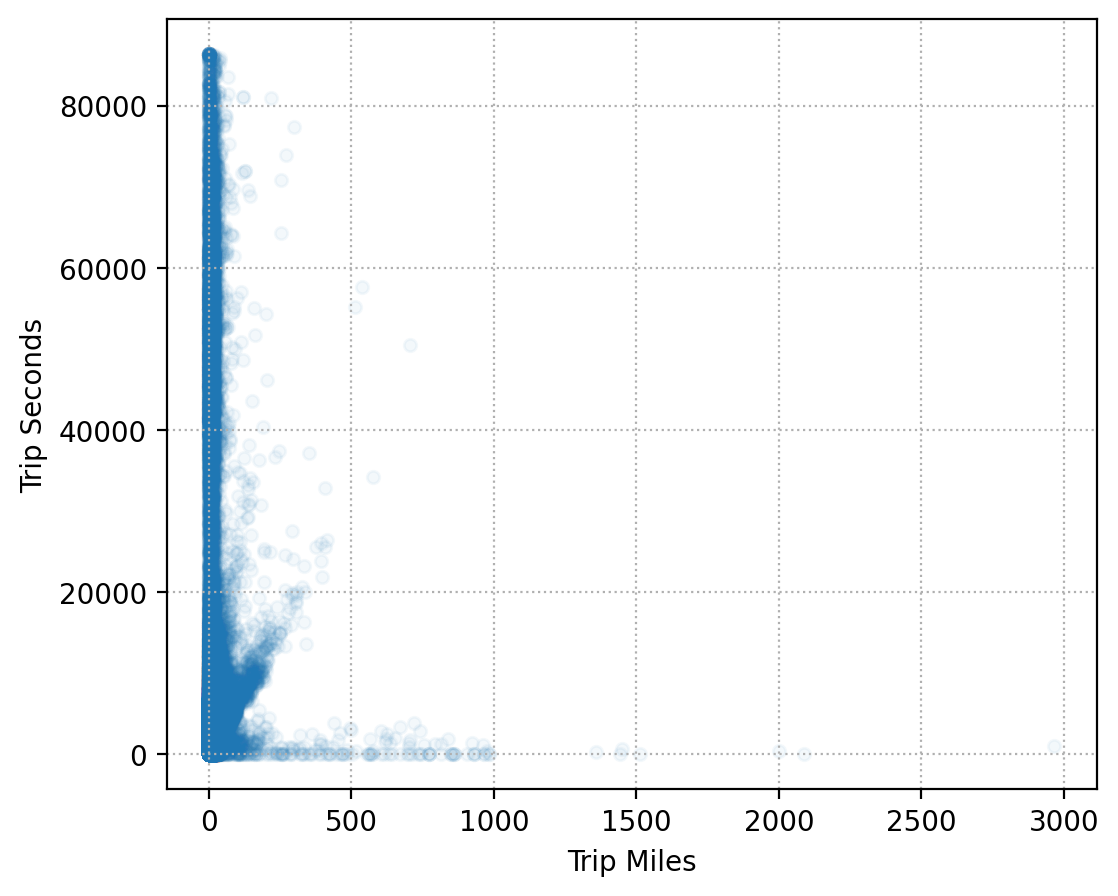

In [94]:
ax = df.plot.scatter(x='Trip Miles', y='Trip Seconds', alpha=0.05, figsize=(6, 5))
ax.grid(linestyle=':')

In [95]:
# Q: Do all trip miles have at most 2 deicmal places?
def num_decimal(x):
    try:
        return len(str(x).split('.')[1])
    except IndexError:
        return 0

df['Trip Miles'].map(lambda x: num_decimal(x) <= 2).all() # See .apply()

True

In [96]:
is_dirty = (df['Trip Seconds'].isna() |
            ((df['Trip Seconds'] - df['trip_time']).abs() > 15 * 60) |
            df['Trip Miles'].isna())

is_dirty.sum()

1269

In [97]:
df = df[~is_dirty]

In [98]:
# Q: Are pickup centroid missing simultaneously?
df[df.columns[df.columns.str.startswith('Pickup Centroid')]].apply(pd.isna).value_counts()

Pickup Centroid Latitude  Pickup Centroid Longitude  Pickup Centroid Location
False                     False                      False                       5869581
True                      True                       True                         510888
Name: count, dtype: int64

In [99]:
# Q: Does at least one of pickup census tract or community area exist when pickup centroid exists?
(df
 [['Pickup Census Tract', 'Pickup Community Area']]
 [df['Pickup Centroid Location'].notna()]
 .notna()
 .any(axis=1)
 .all())
# http://dev.cityofchicago.org/open%20data/data%20portal/2019/04/12/tnp-taxi-privacy.html

True

In [100]:
# Q: Are dropoff centroid missing simultaneously?
df[df.columns[df.columns.str.startswith('Dropoff Centroid')]].apply(pd.isna).value_counts().reset_index()

Dropoff Centroid Latitude  Dropoff Centroid Longitude  \
0                      False                       False   
1                       True                        True   

   Dropoff Centroid  Location    count  
0                       False  5783345  
1                        True   597124

In [101]:
# Q: Does at least one of dropoff census tract or community area exist when dropoff centroid exists?
(df
 [['Dropoff Census Tract', 'Dropoff Community Area']]
 [df['Dropoff Centroid  Location'].notna()]
 .notna()
 .any(axis=1)
 .all())

True

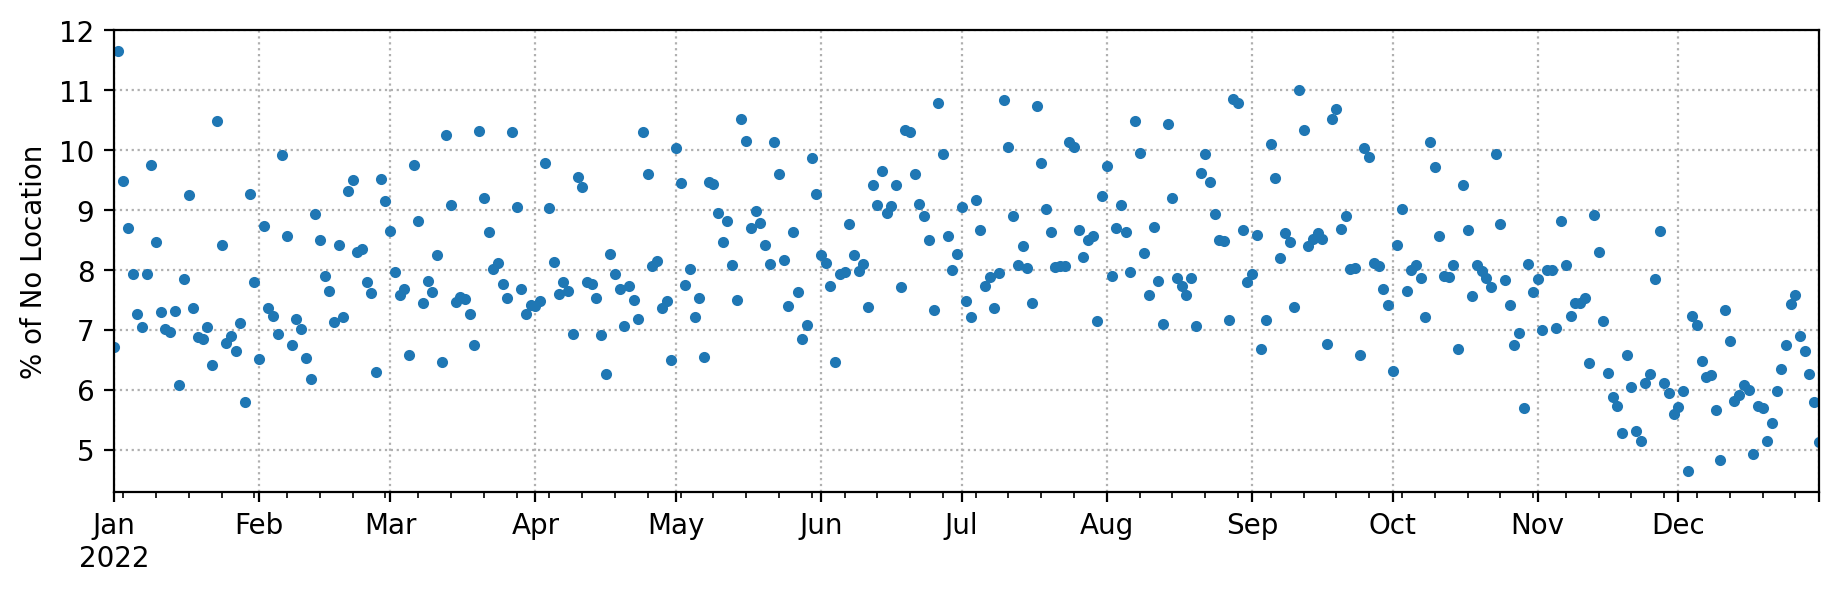

In [102]:
# Q: Is pickup dropoff location missing randomly over date?
ax = (df
      .assign(no_location=df['Pickup Centroid Location'].isna() | df['Pickup Centroid Location'].isna())
      .groupby(df['Trip Start Timestamp'].dt.date) # https://pandas.pydata.org/docs/user_guide/groupby.html
      ['no_location']
      .mean()
      .mul(100)
      .reindex(index=pd.date_range('2022-01-01', '2022-12-31'), fill_value=0)
      .plot(figsize=(11, 3), marker='.', linestyle='', ylabel='% of No Location'))
ax.grid(linestyle=':')

In [103]:
is_dirty = (df['Pickup Centroid Location'].isna() |
            df['Dropoff Centroid  Location'].isna())

is_dirty.sum()

879965

In [104]:
df = df[~is_dirty]

In [105]:
# Q: Do pickup dropoff centroid location have same format?
(df['Pickup Centroid Location'].str.startswith('POINT (').all(),
 df['Pickup Centroid Location'].str.endswith(')').all(),
 df['Dropoff Centroid  Location'].str.startswith('POINT (').all(),
 df['Dropoff Centroid  Location'].str.endswith(')').all())
# https://pandas.pydata.org/docs/user_guide/text.html

(True, True, True, True)

In [106]:
# Q: Is pickup centroid location consistent with its longitude and latitude?
pickup_coord = (df
                ['Pickup Centroid Location']
                .str[7:-1]
                .str.split(expand=True)
                .rename(columns={0: 'pickup_longitude', 1: 'pickup_latitude'})
                .map(float))

np.abs(df[['Pickup Centroid Longitude', 'Pickup Centroid Latitude']].to_numpy() - pickup_coord.to_numpy()).max()

5.000089231543825e-10

In [107]:
# Q: Is dropoff centroid location consistent with its longitude and latitude?
dropoff_coord = (df
                 ['Dropoff Centroid  Location']
                 .str[7:-1]
                 .str.split(expand=True)
                 .rename(columns={0: 'dropoff_longitude', 1: 'dropoff_latitude'})
                 .map(float))

np.abs(df[['Dropoff Centroid Longitude', 'Dropoff Centroid Latitude']].to_numpy() - dropoff_coord.to_numpy()).max()

5.000089231543825e-10

In [108]:
# Q: What is the range of longitude and latitude?
df[['Pickup Centroid Longitude',
    'Dropoff Centroid Longitude',
    'Pickup Centroid Latitude',
    'Dropoff Centroid Latitude']].describe(percentiles=[0.5]).round(2)

Pickup Centroid Longitude  Dropoff Centroid Longitude  \
count                 5500504.00                  5500504.00   
mean                      -87.68                      -87.66   
std                         0.10                        0.07   
min                       -87.91                      -87.91   
50%                       -87.63                      -87.63   
max                       -87.53                      -87.53   

       Pickup Centroid Latitude  Dropoff Centroid Latitude  
count                5500504.00                 5500504.00  
mean                      41.90                      41.89  
std                        0.06                       0.06  
min                       41.65                      41.66  
50%                       41.89                      41.89  
max                       42.02                      42.02

In [109]:
df.count()

Trip ID                       5500504
Taxi ID                       5500504
Trip Start Timestamp          5500504
Trip End Timestamp            5500504
Trip Seconds                  5500504
Trip Miles                    5500504
Pickup Census Tract           2519314
Dropoff Census Tract          2519314
Pickup Community Area         5498273
Dropoff Community Area        5470693
Fare                          5497895
Tips                          5497895
Tolls                         5497895
Extras                        5497895
Trip Total                    5497895
Payment Type                  5500504
Company                       5500504
Pickup Centroid Latitude      5500504
Pickup Centroid Longitude     5500504
Pickup Centroid Location      5500504
Dropoff Centroid Latitude     5500504
Dropoff Centroid Longitude    5500504
Dropoff Centroid  Location    5500504
trip_time                     5500504
dtype: int64

In [110]:
# Q: Are fare, tips, tolls, extras, and trip total missing simultaneously?
fare_cols = ['Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total']
df[fare_cols].apply(pd.isna).value_counts()

Fare   Tips   Tolls  Extras  Trip Total
False  False  False  False   False         5497895
True   True   True   True    True             2609
Name: count, dtype: int64

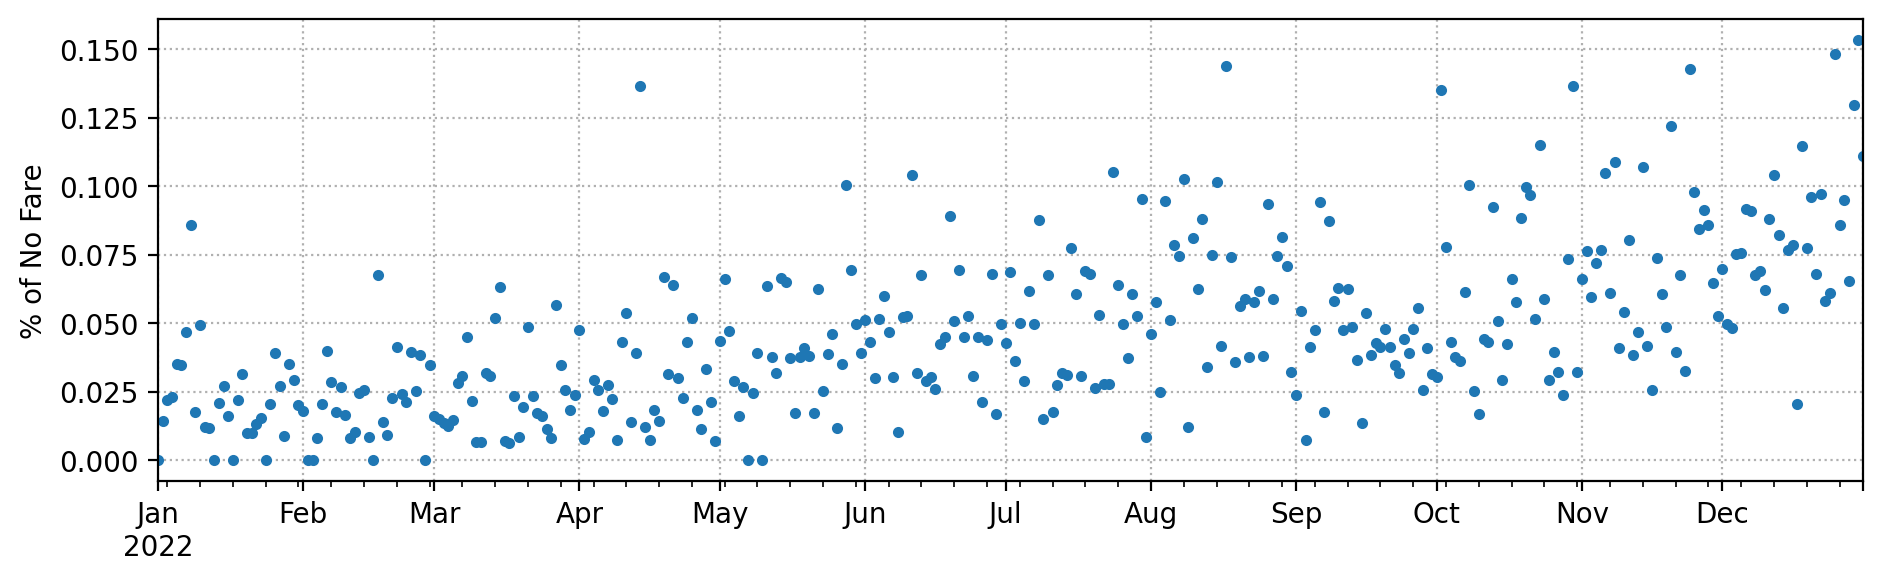

In [111]:
# Q: Is fare etc missing randomly over date?
ax = (df
      .assign(no_fare=df['Fare'].isna())
      .groupby(df['Trip Start Timestamp'].dt.date)
      ['no_fare']
      .mean()
      .mul(100)
      .reindex(index=pd.date_range('2022-01-01', '2022-12-31'), fill_value=0)
      .plot(figsize=(11, 3), marker='.', linestyle='', ylabel='% of No Fare'))
ax.grid(linestyle=':')

In [112]:
# Q: Is fare etc missing randomly per company?
idx = df['Fare'].isna()
pd.concat([(df['Company'][idx].value_counts() / idx.sum()).rename('No Fare %'),
           (df['Company'].value_counts() / df['Company'].count()).rename('Company Share %')],
          join='inner', axis=1).round(4) * 100

No Fare %  Company Share %
Company                                                         
Taxicab Insurance Agency Llc              31.39             4.52
City Service                              18.90             9.34
Flash Cab                                 15.64            21.96
Star North Taxi Management Llc            15.37             2.35
Sun Taxi                                  12.11            10.89
Globe Taxi                                 1.72             3.77
Chicago Independents                       1.69             4.96
5 Star Taxi                                1.03             2.33
Blue Ribbon Taxi Association               0.69             2.53
Medallion Leasin                           0.57             4.10
Chicago Taxicab                            0.34             0.29
Taxi Affiliation Services                  0.34            21.94
24 Seven Taxi                              0.08             0.93
Metro Jet Taxi A.                          0.08             0.09
Patriot Taxi Dba Peace Taxi Associat       0.04             0.36

In [113]:
# Q: Is fare etc missing randomly per payment type?
idx = df['Fare'].isna()
pd.concat([(df['Payment Type'][idx].value_counts() / idx.sum()).rename('No Fare %'),
           (df['Payment Type'].value_counts() / df['Payment Type'].count()).rename('Payment Type %')],
          join='inner', axis=1).round(4) * 100

No Fare %  Payment Type %
Payment Type                           
Cash              97.93           32.11
Credit Card        1.92           36.56
Mobile             0.11           16.07
Prcard             0.04            9.89

In [114]:
# Q: What is the range of fare etc?
df[fare_cols].describe().round(2)

Fare        Tips       Tolls      Extras  Trip Total
count  5497895.00  5497895.00  5497895.00  5497895.00  5497895.00
mean        19.65        2.44        0.02        1.28       23.54
std         44.99        3.61        8.00       21.82       52.63
min          0.00        0.00        0.00        0.00        0.00
25%          7.50        0.00        0.00        0.00        9.50
50%         12.21        0.07        0.00        0.00       14.82
75%         30.00        3.18        0.00        1.00       31.50
max       9900.26      321.08     6666.66     8888.88     9900.26

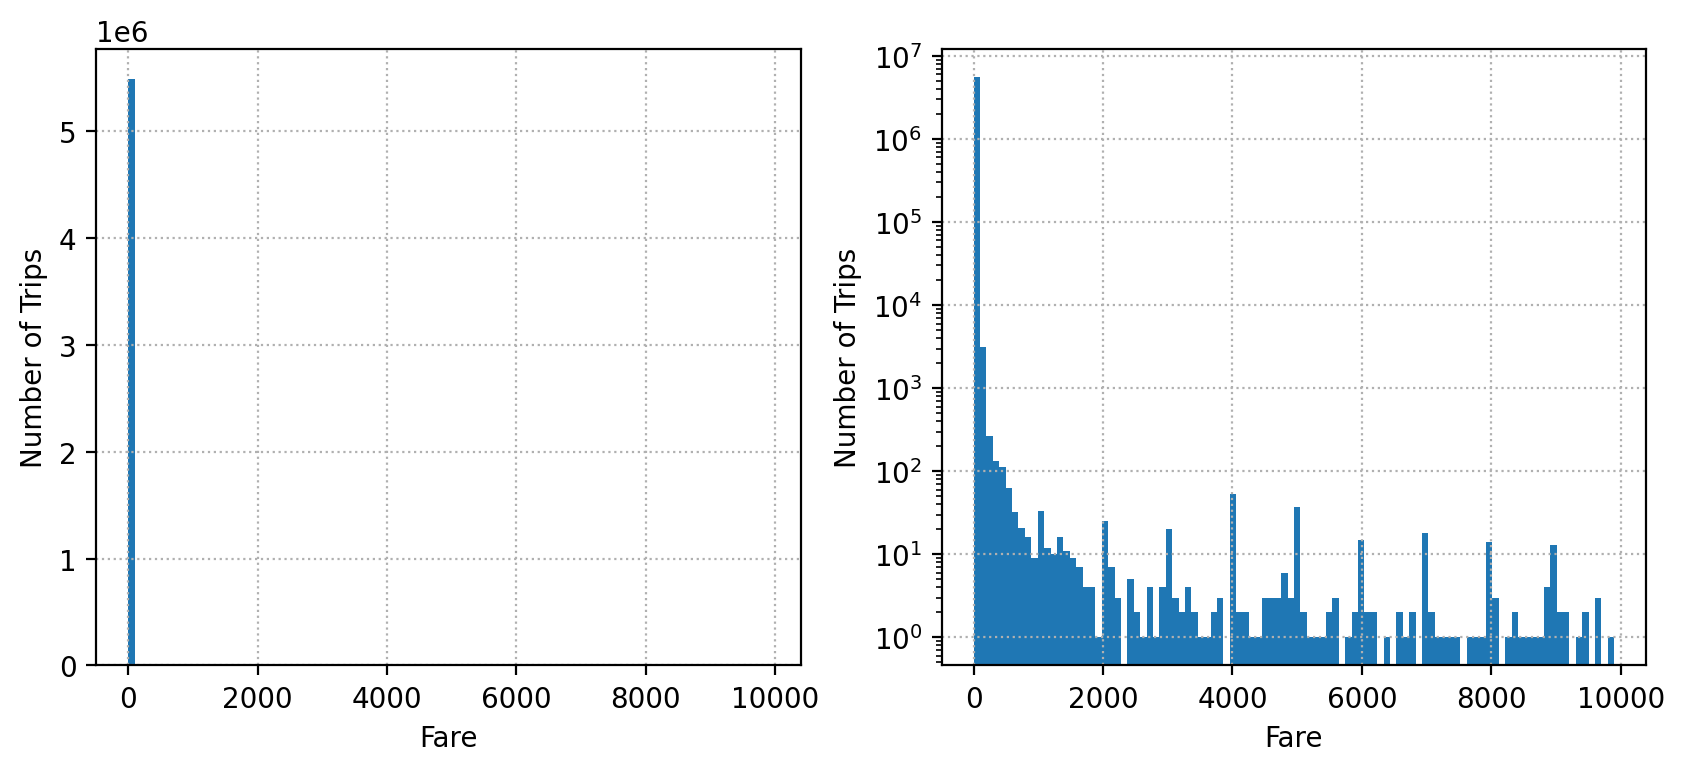

In [115]:
# Q: What is the distribution of fare?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['Fare']).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Fare')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['Fare']).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Number of Trips')

plt.show()

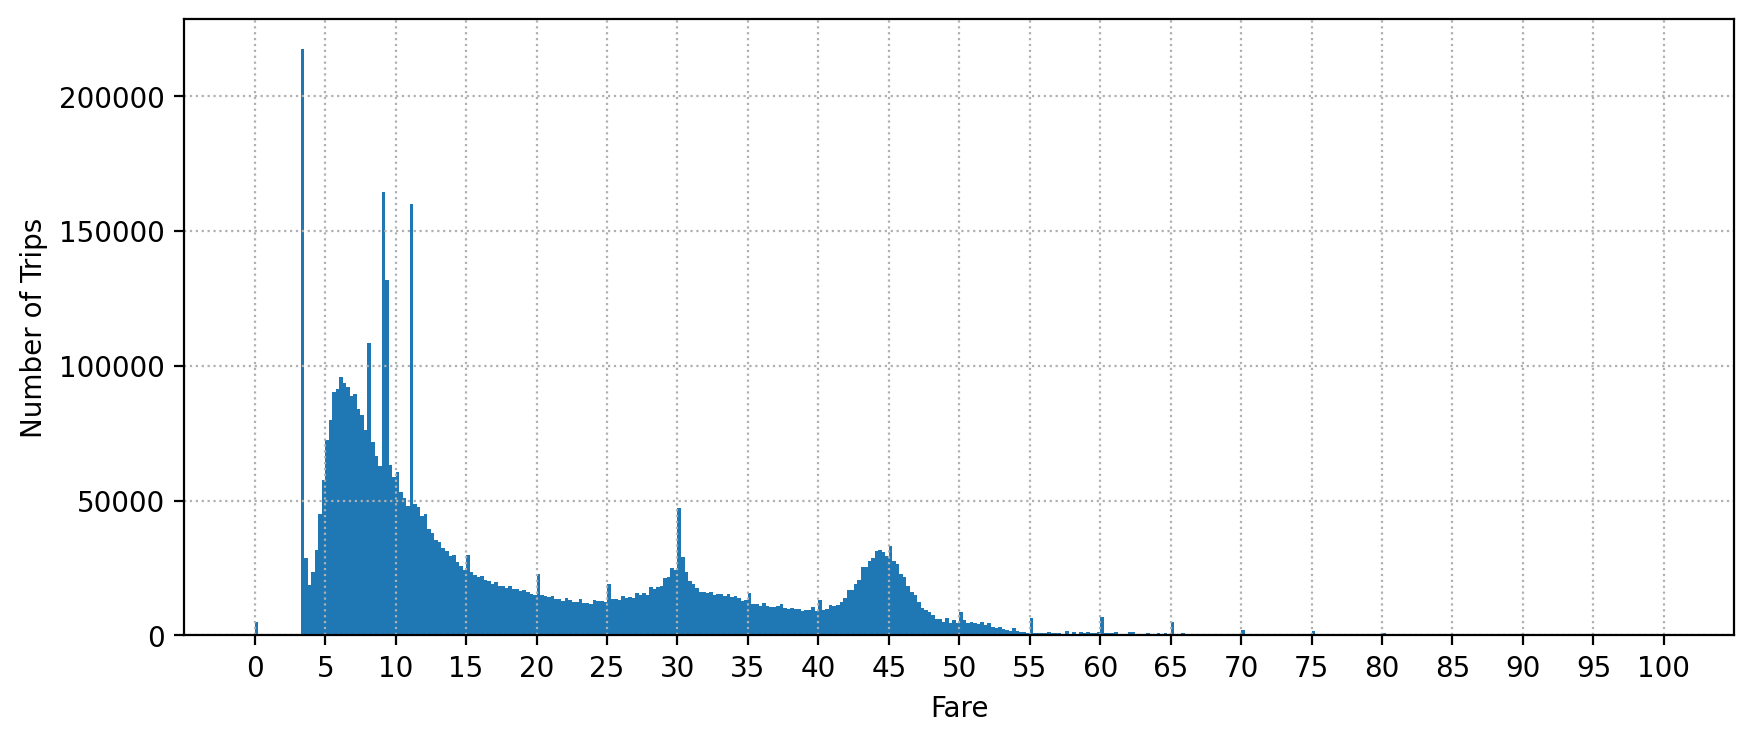

In [116]:
# Q: What is the distribution of fare <= $100?
ax = (df['Fare'][df['Fare'] <= 100]).hist(figsize=(10, 4), bins=400, grid=False)
ax.set_xticks(np.arange(0, 100 + 0.1, 5))
ax.grid(linestyle=':')
ax.set_xlabel('Fare')
ax.set_ylabel('Number of Trips');

In [117]:
# Q: What fare represents the spikes above?
df['Fare'].value_counts().head(10) # $3.25 is base fare https://yellowcabchicago.com/rates/

Fare
3.25     217486
9.00     155942
11.00    146498
8.00     105407
6.00      95859
6.25      93624
6.50      92010
5.75      91274
5.50      90163
7.00      89440
Name: count, dtype: int64

In [118]:
# Q: What fare represents the spike around $30?
df['Fare'][df['Fare'].between(20, 40)].value_counts().head(5)

Fare
30.00    46804
30.25    28716
29.50    24360
29.75    23784
30.50    22923
Name: count, dtype: int64

In [119]:
# Q: How many $0 fare?
df['Fare'].value_counts().sort_index()

Fare
0.00       4036
0.01        779
0.02         41
0.03         17
0.04         24
           ... 
9500.55       1
9628.63       1
9700.25       1
9700.31       1
9900.26       1
Name: count, Length: 7237, dtype: int64

In [120]:
# Q: Anything special about rows with $0 fare?
zone_cols = ['Pickup Census Tract', 'Dropoff Census Tract', 'Pickup Community Area', 'Dropoff Community Area']
df[df['Fare'] == 0].sample(10).drop(labels=zone_cols, axis='columns')

Trip ID  \
5089180  b58bbb01eb5aa3b752e21a7f29889a8a08559af6   
1379000  fce294a64421823fe7df1e24e94c4b6fb710ccea   
3968461  322ac6ce662cd9f1e0488740fe5305774558cdc3   
5336760  07d88863efb4d69e1b868e796b123d62218800c1   
3996683  0329635e66506fbdbdfa59b4ca2d9294e2c1d78e   
6219771  26f2f98afcbb2b9bf589f59a1c6aa7e06b1f37d9   
921044   488b858aab524c9bd53f67387315db7ec249ce26   
861045   76367902bce21d52dad95ff73ade193d2a10d413   
1771720  d16ca75d3ac982f15852a16bf7a49fe412a9b22b   
2628218  e8c2b6b3bd70337b9ff092808b105adc0b5a3ccc   

                                                   Taxi ID  \
5089180  24b92618e8b1d13a0f6a1c79fae29f97b0ad146b5c9885...   
1379000  fbb69858d94acd550ff8b8d685137eae3aae40bf83c3a5...   
3968461  f1595f3f9536df1d8d7df672cb3f0835fe79e1754f6c7a...   
5336760  07800b5117d6e914644f00471b596f2a38426759f6f64c...   
3996683  b00c5a92a2d7cd526d9ca9a5b63b98eb3111a00db69c57...   
6219771  624a6a680c34b514659e430a8c859b763e61c2cd9f0e2f...   
921044   d6fd39863cdce99011c7282605bedf70d9d059ecf0da5e...   
861045   7182f6b851fe8fe0639ecd72e3f74fc1bac93462be2635...   
1771720  1095c5432cb9cfd88296fb166e38d560936d4690801ddd...   
2628218  38c32bfda2f77c2a57f33a9e3fcf7edb8e996f59bc2254...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
5089180  2022-10-19 17:45:00 2022-10-19 17:45:00           0.0        0.00   
1379000  2022-04-12 06:00:00 2022-04-12 06:00:00         120.0        0.00   
3968461  2022-08-24 09:30:00 2022-08-24 09:30:00           1.0        0.00   
5336760  2022-11-01 15:15:00 2022-11-01 15:15:00           3.0        0.00   
3996683  2022-08-25 15:15:00 2022-08-25 16:00:00        2413.0        5.79   
6219771  2022-12-20 00:15:00 2022-12-20 00:15:00         351.0        1.89   
921044   2022-03-16 16:45:00 2022-03-16 16:45:00           1.0        0.00   
861045   2022-03-12 18:15:00 2022-03-12 18:15:00           1.0        0.00   
1771720  2022-05-04 13:30:00 2022-05-04 13:45:00         871.0        2.16   
2628218  2022-06-15 13:15:00 2022-06-15 13:15:00           2.0        0.00   

         Fare  Tips  Tolls  Extras  Trip Total Payment Type  \
5089180   0.0   0.0    0.0     0.0         0.0         Cash   
1379000   0.0   0.0    0.0     0.0         0.0         Cash   
3968461   0.0   0.0    0.0     0.0         0.0         Cash   
5336760   0.0   0.0    0.0     0.0         0.0         Cash   
3996683   0.0   0.0    0.0     0.0         0.0         Cash   
6219771   0.0   0.0    0.0     0.0         0.0         Cash   
921044    0.0   0.0    0.0     0.0         0.0         Cash   
861045    0.0   0.0    0.0     0.0         0.0         Cash   
1771720   0.0   0.0    0.0     0.0         0.0         Cash   
2628218   0.0   0.0    0.0     0.0         0.0         Cash   

                               Company  Pickup Centroid Latitude  \
5089180      Taxi Affiliation Services                 41.880994   
1379000  Taxicab Insurance Agency, LLC                 41.979071   
3968461                      Flash Cab                 41.994381   
5336760                    5 Star Taxi                 41.979071   
3996683                   City Service                 41.922686   
6219771           Chicago Independents                 41.986712   
921044            Chicago Independents                 42.009623   
861045                       Flash Cab                 41.892042   
1771720           Chicago Independents                 41.857184   
2628218                      Flash Cab                 41.833518   

         Pickup Centroid Longitude              Pickup Centroid Location  \
5089180                 -87.632746  POINT (-87.6327464887 41.8809944707)   
1379000                 -87.903040  POINT (-87.9030396611 41.9790708201)   
3968461                 -87.672538   POINT (-87.672538401 41.9943810196)   
5336760                 -87.903040  POINT (-87.9030396611 41.9790708201)   
3996683                 -87.649489  POINT (-87.6494887289 41.9226862843)   
6219771          

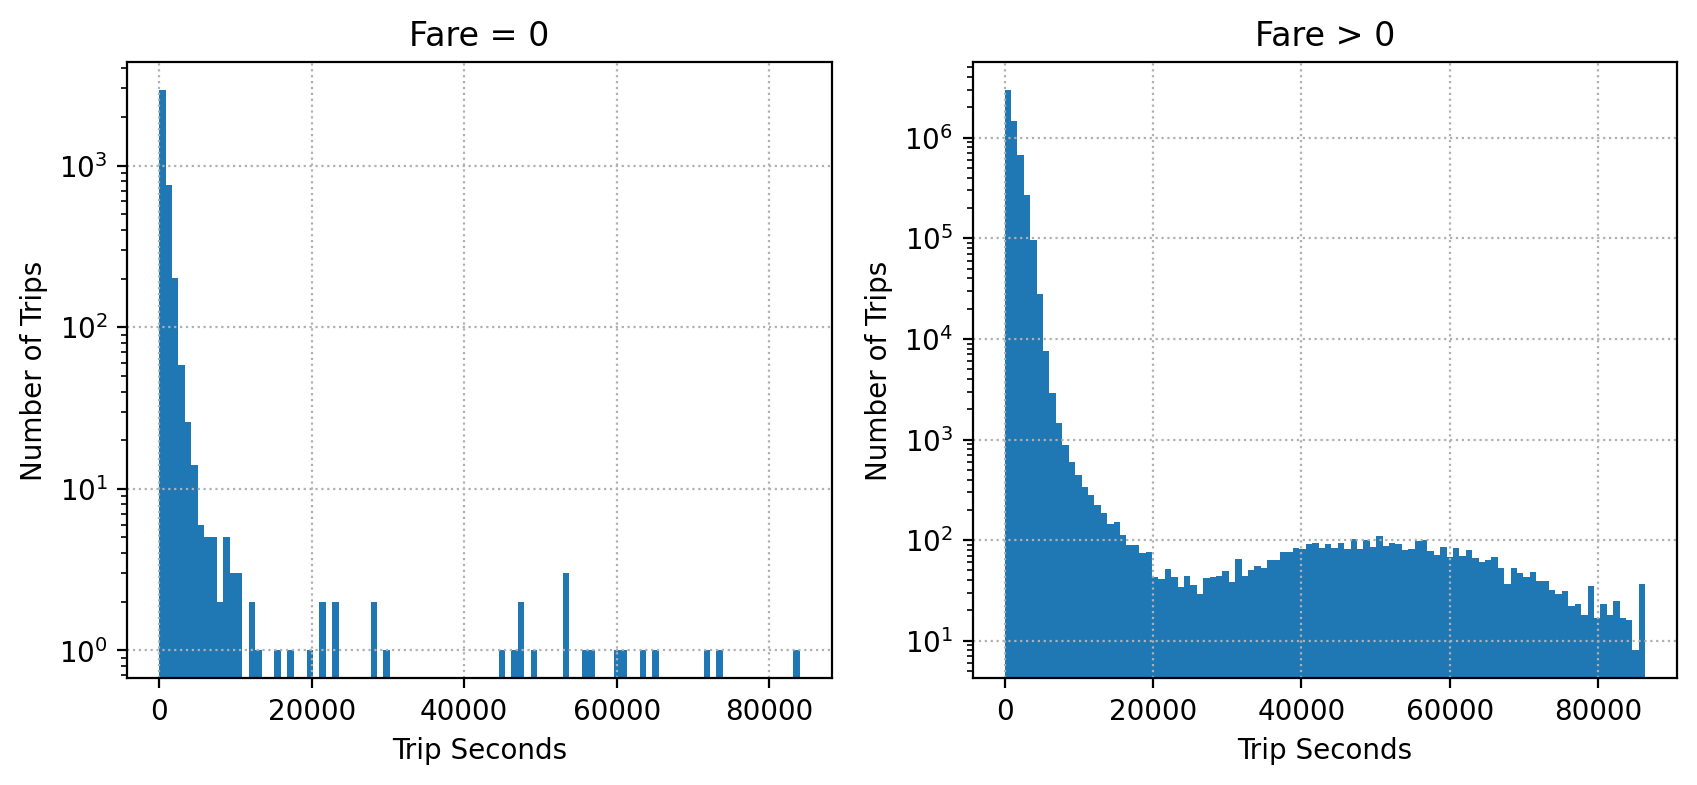

In [121]:
# Q: What is the distribution of trip seconds when $0 fare?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['Trip Seconds'][df['Fare'] == 0]).hist(ax=ax1, bins=100, grid=False)
ax1.set_yscale('log')
ax1.grid(linestyle=':')
ax1.set_xlabel('Trip Seconds')
ax1.set_ylabel('Number of Trips')
ax1.set_title('Fare = 0')

ax2 = plt.subplot(1, 2, 2)
(df['Trip Seconds'][df['Fare'] > 0]).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Trip Seconds')
ax2.set_ylabel('Number of Trips')
ax2.set_title('Fare > 0')

plt.show()

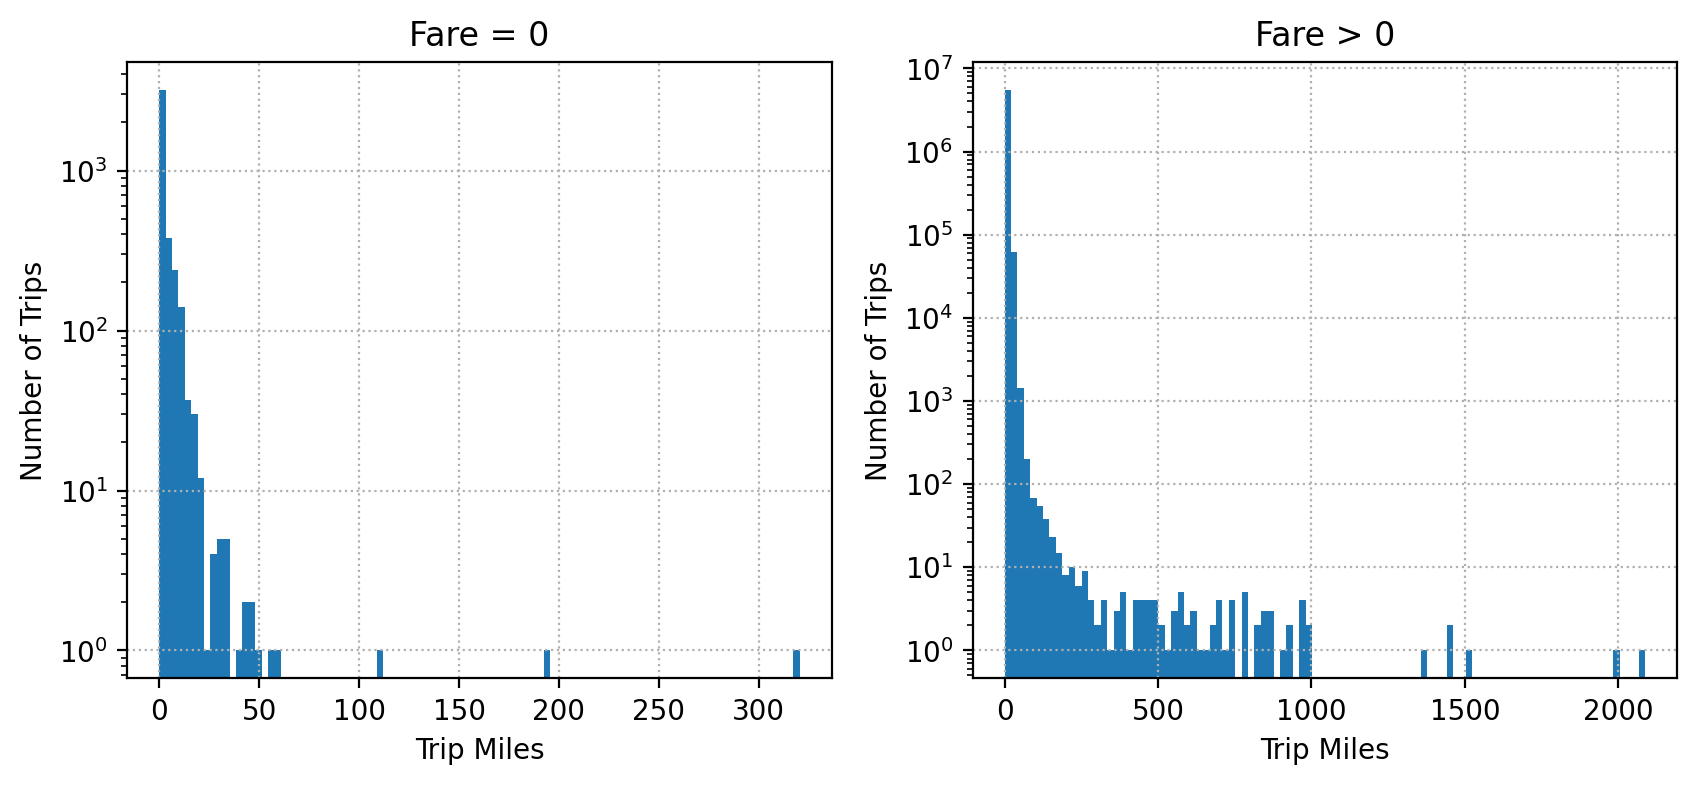

In [122]:
# Q: What is the distribution of trip miles when $0 fare?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['Trip Miles'][df['Fare'] == 0]).hist(ax=ax1, bins=100, grid=False)
ax1.set_yscale('log')
ax1.grid(linestyle=':')
ax1.set_xlabel('Trip Miles')
ax1.set_ylabel('Number of Trips')
ax1.set_title('Fare = 0')

ax2 = plt.subplot(1, 2, 2)
(df['Trip Miles'][df['Fare'] > 0]).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Trip Miles')
ax2.set_ylabel('Number of Trips')
ax2.set_title('Fare > 0')

plt.show()

In [123]:
# Q: Anything special about rows with high fare?
df.nlargest(10, 'Fare').drop(labels=zone_cols, axis='columns')

Trip ID  \
1723949  08cf2feae3ba3d3df719693fa46e383ff039ff2b   
1236235  2e6b53b34c3efb60b7f4a0ebe04ccac5955bf1f3   
659041   3fc1bf2572dcf440b9a536b44be4ee5f26a83cab   
6038279  1957668e5af6e4ea46b82e22b4e7f28b1c7a85cd   
2434952  c7136ac7320e201720df408fe4a8ba5803dc0258   
2290500  ceed52473fa0b58821afc2dd5a6ffd3af05ab6e5   
2370102  427ef5ffa380bc9f210553f2584b5af321597bb5   
2896434  953114fc15bc120df929573780d4bbc7bb33b829   
1186208  33f4981aacb2302d71c634fdec48583454323ff8   
2781903  6529d483ad7f1e9f63f6b2a86e1f7f096afdc476   

                                                   Taxi ID  \
1723949  0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e1...   
1236235  0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e1...   
659041   12bfcfb8715a63cacb9a4bc127f622071bab27b36a8488...   
6038279  279e6ef4129260b19e953938f5ca14fba369cbd6db1f06...   
2434952  0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e1...   
2290500  0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e1...   
2370102  0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e1...   
2896434  0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e1...   
1186208  0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e1...   
2781903  0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e1...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
1723949  2022-05-01 18:30:00 2022-05-01 18:45:00         980.0         0.0   
1236235  2022-04-03 20:45:00 2022-04-03 21:30:00        2543.0         0.0   
659041   2022-02-28 00:15:00 2022-02-28 00:15:00         843.0         0.0   
6038279  2022-12-09 20:30:00 2022-12-09 20:45:00         660.0         3.7   
2434952  2022-06-06 15:30:00 2022-06-06 17:00:00        5210.0         0.1   
2290500  2022-05-30 22:00:00 2022-05-30 22:00:00         708.0         0.0   
2370102  2022-06-03 17:00:00 2022-06-03 17:30:00        1953.0         0.0   
2896434  2022-06-28 14:30:00 2022-06-28 14:45:00        1579.0         0.0   
1186208  2022-03-31 18:15:00 2022-03-31 19:00:00        2986.0        43.7   
2781903  2022-06-22 20:00:00 2022-06-22 20:15:00         940.0         0.0   

            Fare  Tips  Tolls  Extras  Trip Total Payment Type  \
1723949  9900.26   0.0    0.0    0.00     9900.26         Cash   
1236235  9700.31   0.0    0.0    0.00     9700.31         Cash   
659041   9700.25   0.0    0.0    0.04     9700.29         Cash   
6038279  9628.63   0.0    0.0    1.00     9629.63         Cash   
2434952  9500.55   0.0    0.0    0.05     9500.60         Cash   
2290500  9500.24   0.0    0.0    0.04     9500.28         Cash   
2370102  9400.27   0.0    0.0    0.04     9400.31         Cash   
2896434  9200.25   0.0    0.0    0.04     9200.29         Cash   
1186208  9111.10   0.0    0.0   31.00     9142.10         Cash   
2781903  9100.24   0.0    0.0    0.00     9100.24         Cash   

                           Company  Pickup Centroid Latitude  \
1723949          Metro Jet Taxi A.                 41.901207   
1236235          Metro Jet Taxi A.                 41.899602   
659041             Chicago Taxicab                 41.792592   
6038279  Taxi Affiliation Services                 41.922686   
2434952          Metro Jet Taxi A.                 41.980264   
2290500          Metro Jet Taxi A.                 41.980264   
2370102          Metro Jet Taxi A.                 41.980264   
2896434          Metro Jet Taxi A.                 41.980264   
1186208          Metro Jet Taxi A.                 41.979071   
2781903          Metro Jet Taxi A.                 41.878866   

         Pickup Centroid Longitude              Pickup Centroid Location  \
1723949                 -87.676356  POINT (-87.6763559892 41.9012069941)   
1236235                 -87.633308   POINT (-87.6333080367 41.899602111)   
659041                  -87.769615  POINT (-87.7696154528 41.7925923603)   
6038279                 -87.649489  POINT (-87.6494887289 41.9226862843)   
2434952                 -87.913625   POINT (-87.913624596 41.9802643146)   
2290500                 -87.

In [124]:
# Q: Which company has fare > $500?
idx = df['Fare'] > 500
pd.concat([(df['Company'][idx].value_counts() / idx.sum()).rename('> $500 Fare Share %'),
           (df['Company'].value_counts() / df['Company'].count()).rename('Market Share %')],
          join='inner', axis=1).round(4) * 100

> $500 Fare Share %  Market Share %
Company                                                            
Metro Jet Taxi A.                             76.42            0.09
Taxi Affiliation Services                      6.22           21.94
Chicago Taxicab                                5.30            0.29
Taxicab Insurance Agency, LLC                  4.20            4.00
Medallion Leasin                               1.46            4.10
Flash Cab                                      1.10           21.96
Chicago Independents                           0.91            4.96
Sun Taxi                                       0.91           10.89
Blue Ribbon Taxi Association                   0.73            2.53
Choice Taxi Association                        0.73            1.95
Globe Taxi                                     0.55            3.77
Taxicab Insurance Agency Llc                   0.55            4.52
Star North Taxi Management Llc                 0.37            2.35
U Taxicab                                      0.18            0.82
5 Star Taxi                                    0.18            2.33
Petani Cab Corp                                0.18            0.06

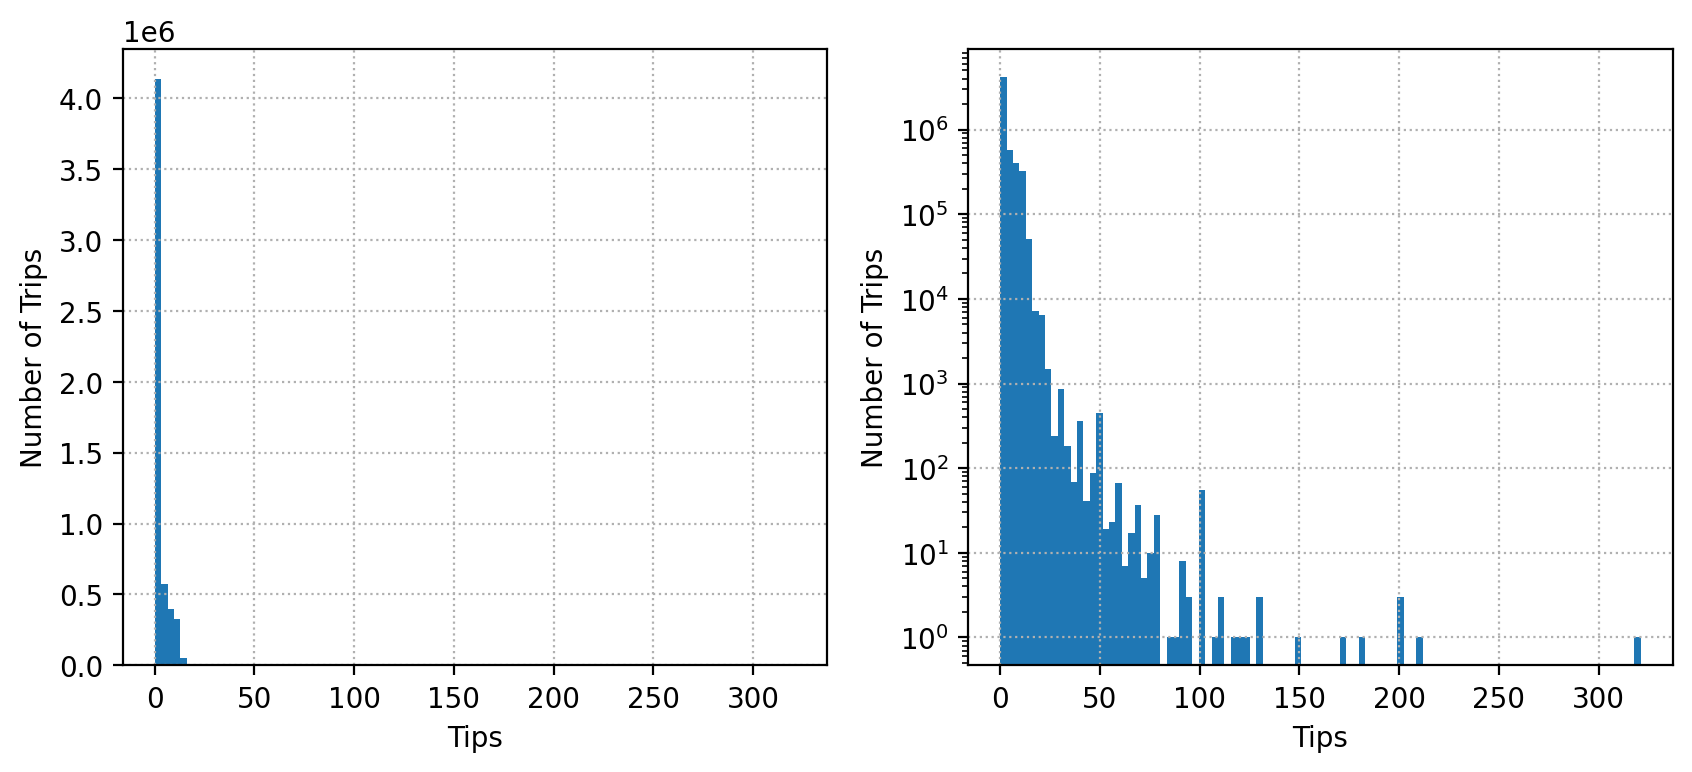

In [125]:
# Q: What is the distribution of tips?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['Tips']).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Tips')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['Tips']).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Tips')
ax2.set_ylabel('Number of Trips')

plt.show()

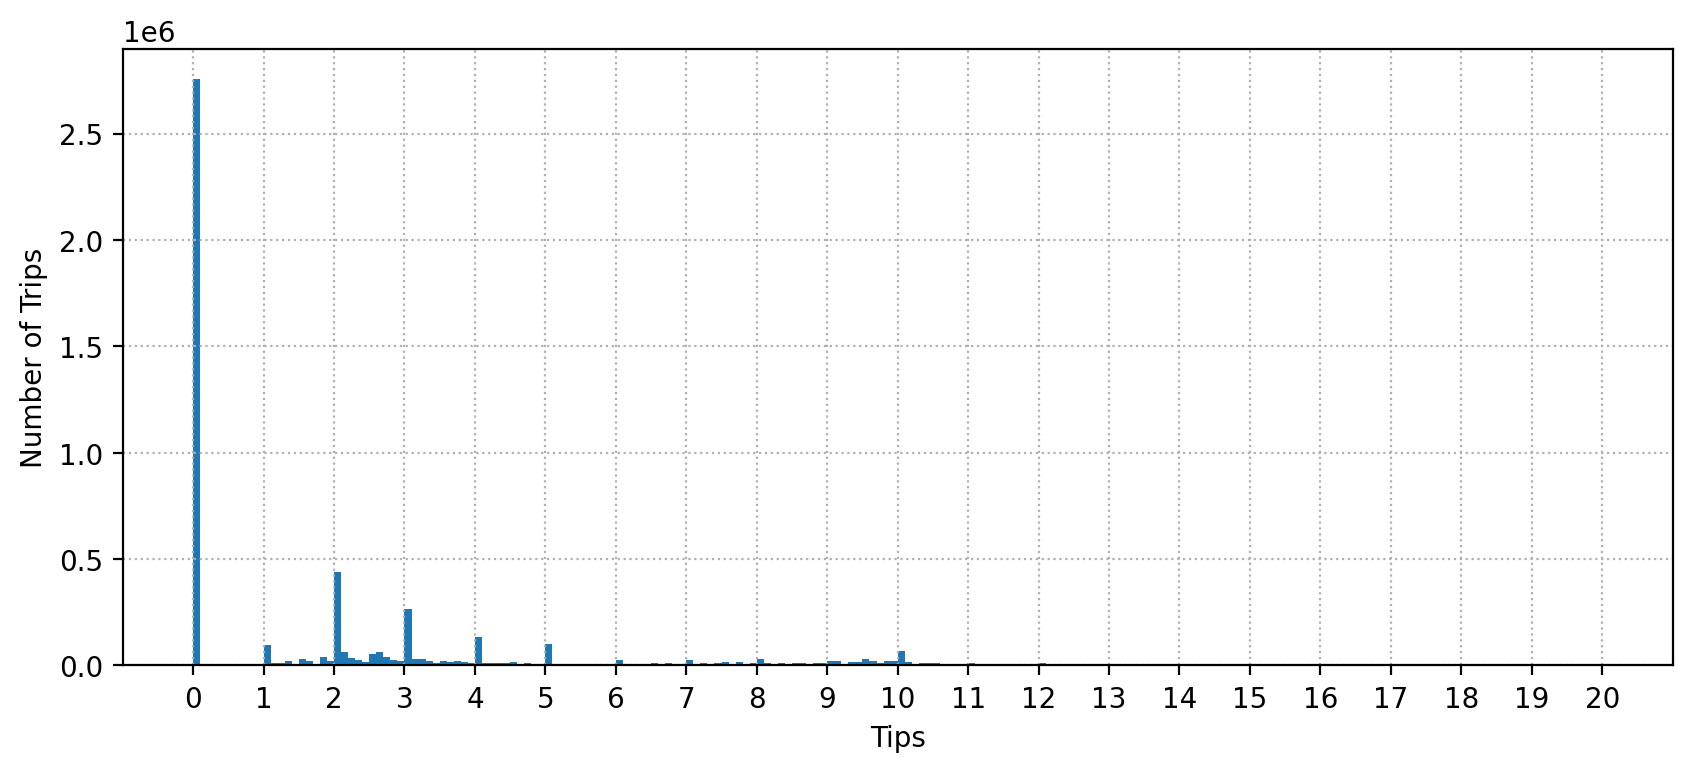

In [126]:
# Q: What is the distribution of tip <= $20?
ax = (df['Tips'][df['Tips'] <= 20]).hist(figsize=(10, 4), bins=200, grid=False)
ax.set_xticks(np.arange(0, 20 + 0.1, 1))
ax.grid(linestyle=':')
ax.set_xlabel('Tips')
ax.set_ylabel('Number of Trips');

In [127]:
# Q: What fare represents the spikes above?
df['Tips'].value_counts().head(20)

Tips
0.00     2744775
2.00      374802
3.00      245338
4.00      117323
5.00       90978
1.00       76531
10.00      48768
2.07       39639
2.16       34783
8.00       21555
6.00       19087
1.84       17736
2.58       17545
7.00       16297
1.50       15085
2.67       15040
2.63       14450
2.50       14114
1.55       11368
2.06       11109
Name: count, dtype: int64

In [128]:
# Q: Anything special about rows with large tips?
df.nlargest(10, 'Tips').drop(labels=zone_cols, axis='columns')

Trip ID  \
565648   05ef990e1f362a4fce493c73a44a8a5fc7f1200e   
4118825  58834bfc3c2a3873ea77518ffdadb74d689b93c8   
3504628  193d98a6830a09615dcbb1aac2de772d0fbafaea   
3116381  39dc7c1f08ae70cdbd7e848f5d87c0cefe53a4f2   
4613752  0c421067b2b00873ea3400d606a625204d4d0eb4   
4191290  dbb3db9ae8a879e40730402d799452bb72fe9804   
570602   b3ad6ac92401d176d957784fd72e8d2a83e28ef8   
5541637  a29abc7b3eeacac5b38d59ee1ef8b7340eac18ca   
3930777  135e349f7eca746ba26cc035a35ebb88de790893   
5755633  d4ea245ce698694af3556f43ab701eee2e497baa   

                                                   Taxi ID  \
565648   0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e1...   
4118825  31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...   
3504628  d5606e39aadb36a16739062a2d6fe7f388118af055199e...   
3116381  252ada1a45e512d3d038a61eb1832c0eec8e3c8dce5833...   
4613752  31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...   
4191290  1aa27355c709dc0cba3790a2549861c6b7864165ccf020...   
570602   68e19b1900a5a4e8193b45649935a261ceb26c8e01d1dc...   
5541637  df78a9555ae5e9041d230bb2f8e1ed8386a1a2a6e52baa...   
3930777  df78a9555ae5e9041d230bb2f8e1ed8386a1a2a6e52baa...   
5755633  df78a9555ae5e9041d230bb2f8e1ed8386a1a2a6e52baa...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
565648   2022-02-21 21:30:00 2022-02-21 22:00:00        1682.0         0.0   
4118825  2022-09-01 13:45:00 2022-09-01 15:00:00        4560.0         3.0   
3504628  2022-07-30 20:00:00 2022-07-30 20:30:00        1980.0        15.5   
3116381  2022-07-11 12:30:00 2022-07-11 12:30:00         120.0         0.2   
4613752  2022-09-26 12:00:00 2022-09-26 14:00:00        7080.0        19.5   
4191290  2022-09-05 23:15:00 2022-09-05 23:30:00        1320.0        16.3   
570602   2022-02-22 11:00:00 2022-02-22 13:45:00        9780.0         5.3   
5541637  2022-11-12 10:15:00 2022-11-12 11:00:00        2220.0         1.7   
3930777  2022-08-22 11:15:00 2022-08-22 13:00:00        6000.0         6.1   
5755633  2022-11-25 09:15:00 2022-11-25 11:00:00        6360.0         1.2   

            Fare    Tips  Tolls  Extras  Trip Total Payment Type  \
565648   2140.05  321.08    0.0     0.0     2461.63       Mobile   
4118825    31.25  210.00    0.0     0.5      241.75  Credit Card   
3504628    39.50  200.80    0.0     0.0      240.30  Credit Card   
3116381     4.00  200.00    0.0     0.0      204.00  Credit Card   
4613752    68.75  200.00    0.0    11.0      279.75  Credit Card   
4191290    40.25  180.00    0.0     4.0      224.25  Credit Card   
570602    214.50  173.00    0.0    12.0      399.50  Credit Card   
5541637    12.25  150.00    0.0     0.0      162.25  Credit Card   
3930777    32.75  130.00    0.0     0.0      162.75  Credit Card   
5755633    27.00  130.00    0.0     0.0      157.00  Credit Card   

                           Company  Pickup Centroid Latitude  \
565648           Metro Jet Taxi A.                 41.980264   
4118825  Taxi Affiliation Services                 41.938666   
3504628  Taxi Affiliation Services                 41.892508   
3116381  Taxi Affiliation Services                 41.884987   
4613752  Taxi Affiliation Services                 41.938666   
4191290  Taxi Affiliation Services                 41.980264   
570602   Taxi Affiliation Services                 41.859350   
5541637        Top Cab Affiliation                 41.884987   
3930777        Top Cab Affiliation                 41.884987   
5755633        Top Cab Affiliation                 41.878866   

         Pickup Centroid Longitude              Pickup Centroid Location  \
565648                  -87.913625   POINT (-87.913624596 41.9802643146)   
4118825                 -87.711211  POINT (-87.7112105933 41.9386661962)   
3504628                 -87.626215  POINT (-87.6262149064 41.8925077809)   
3116381                 -87.620993  POINT (-87.6209929134 41.8849871918)   
4613752                 -87.711211  POINT (-87.7112105933 41.9386661962)   
419129

In [129]:
# Q: Which company has tips > $100?
idx = df['Tips'] > 100
pd.concat([(df['Company'][idx].value_counts() / idx.sum()).rename('> $100 Tips %'),
           (df['Company'].value_counts() / df['Company'].count()).rename('Market Share %')], join='inner', axis=1).round(3) * 100

> $100 Tips %  Market Share %
Company                                                    
Taxi Affiliation Services              52.6            21.9
Top Cab Affiliation                    26.3             1.4
Metro Jet Taxi A.                       5.3             0.1
Globe Taxi                              5.3             3.8
Blue Ribbon Taxi Association            5.3             2.5
5 Star Taxi                             5.3             2.3

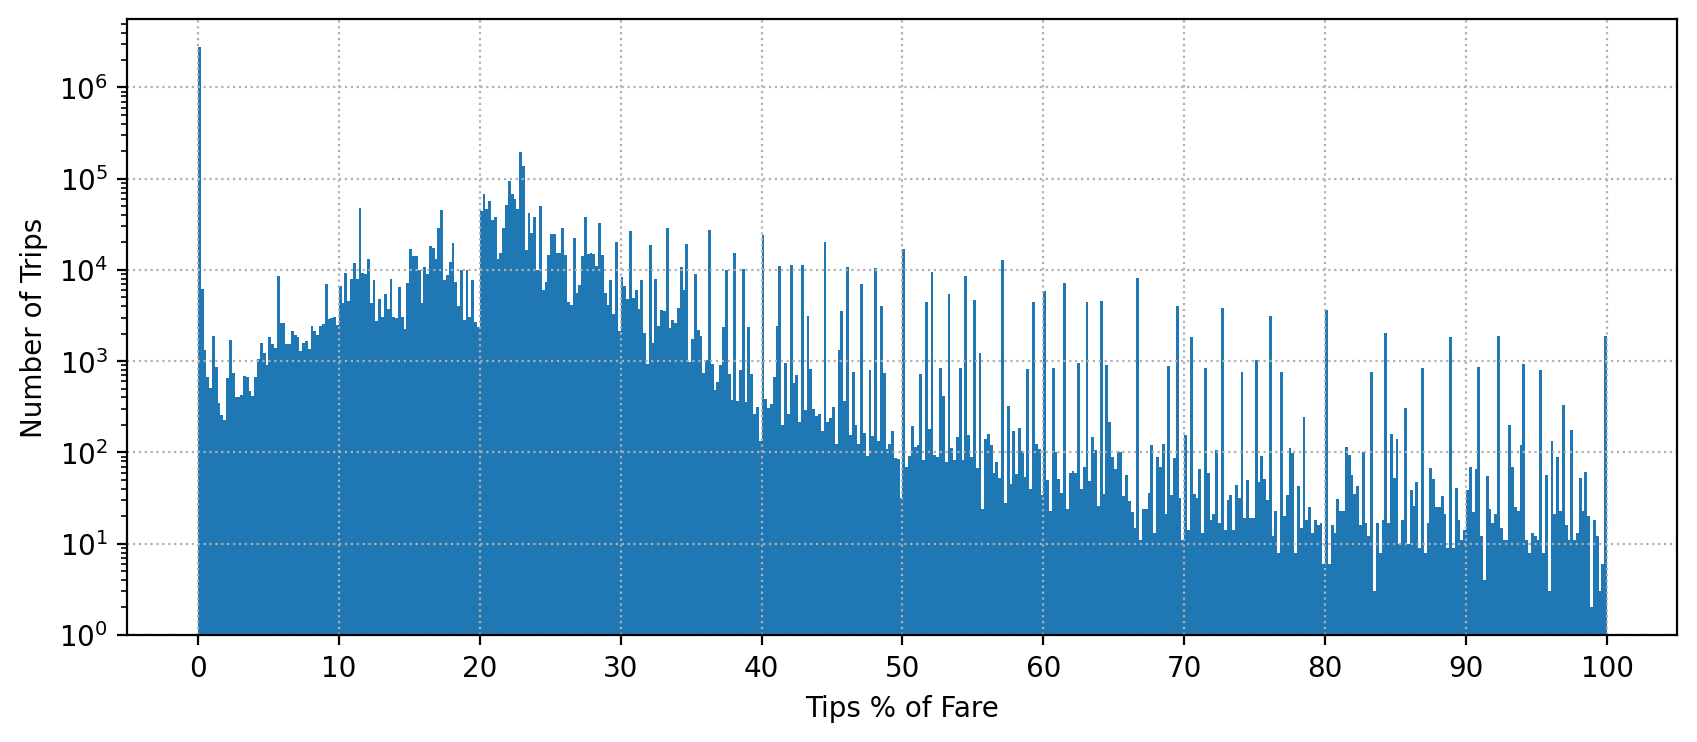

In [130]:
# Q: What is the distribution of tips % of fare?
idx = df['Fare'] >= df['Tips']
ax = (df['Tips'][idx] / df['Fare'][idx] * 100).hist(figsize=(10, 4), bins=500, grid=False)
ax.grid(linestyle=':')
ax.set_xticks(np.arange(0, 100 + 0.1, 10))
ax.set_yscale('log')
ax.set_xlabel('Tips % of Fare')
ax.set_ylabel('Number of Trips');

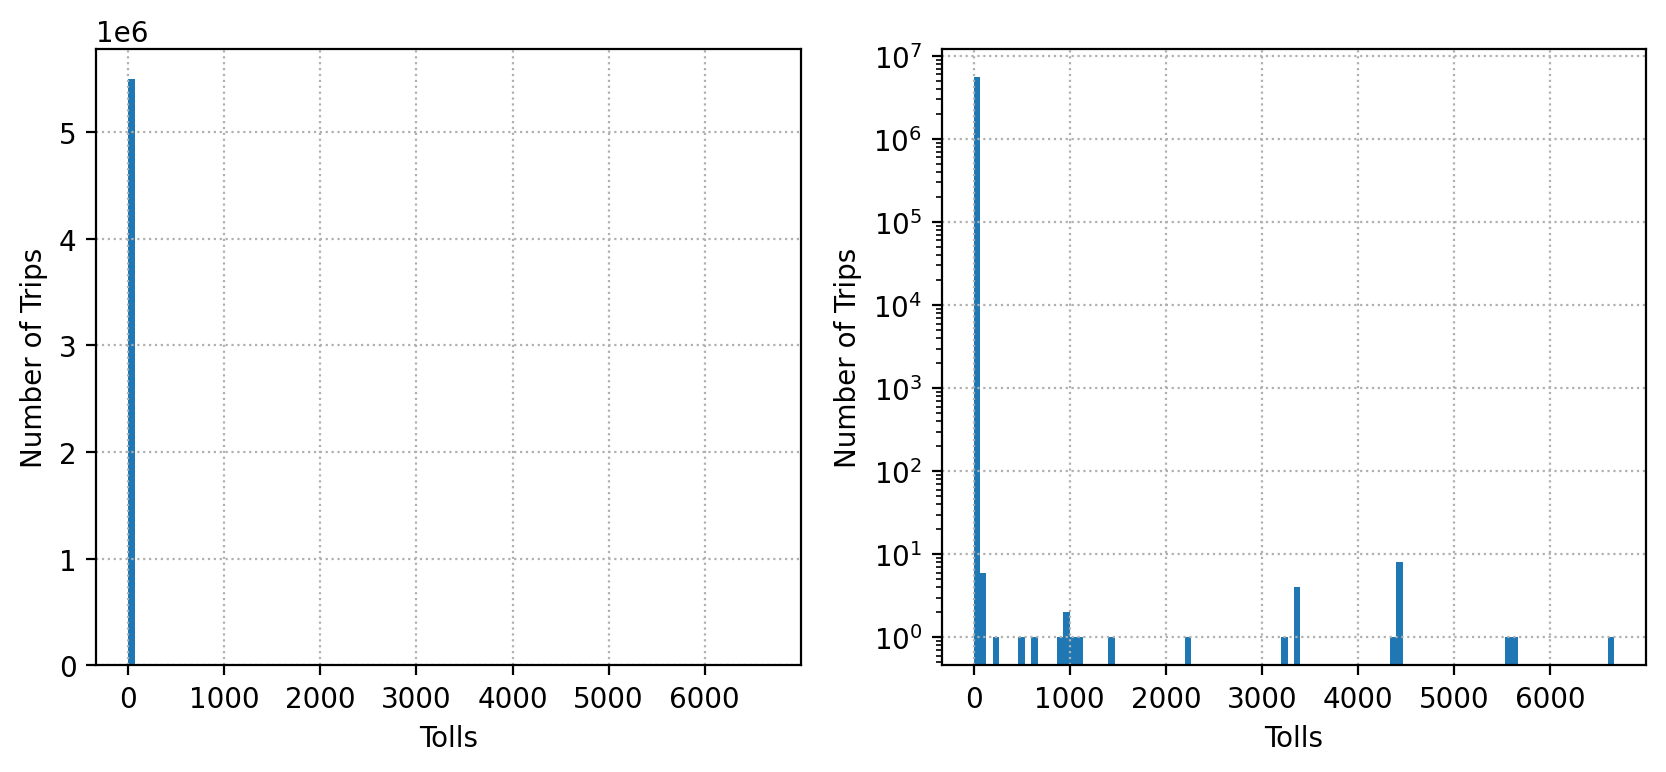

In [131]:
# Q: What is the distribution of tolls?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['Tolls']).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Tolls')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['Tolls']).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Tolls')
ax2.set_ylabel('Number of Trips')

plt.show()

In [132]:
df['Tolls'].value_counts().head(20)

Tolls
0.00     5494485
1.00        1257
4.00         473
2.00         267
5.00         248
1.50         242
0.01         217
3.00          88
4.50          61
6.00          52
7.00          49
1.90          39
9.00          26
3.60          25
10.00         24
5.50          18
2.50          16
11.00         14
50.00         12
8.00          11
Name: count, dtype: int64

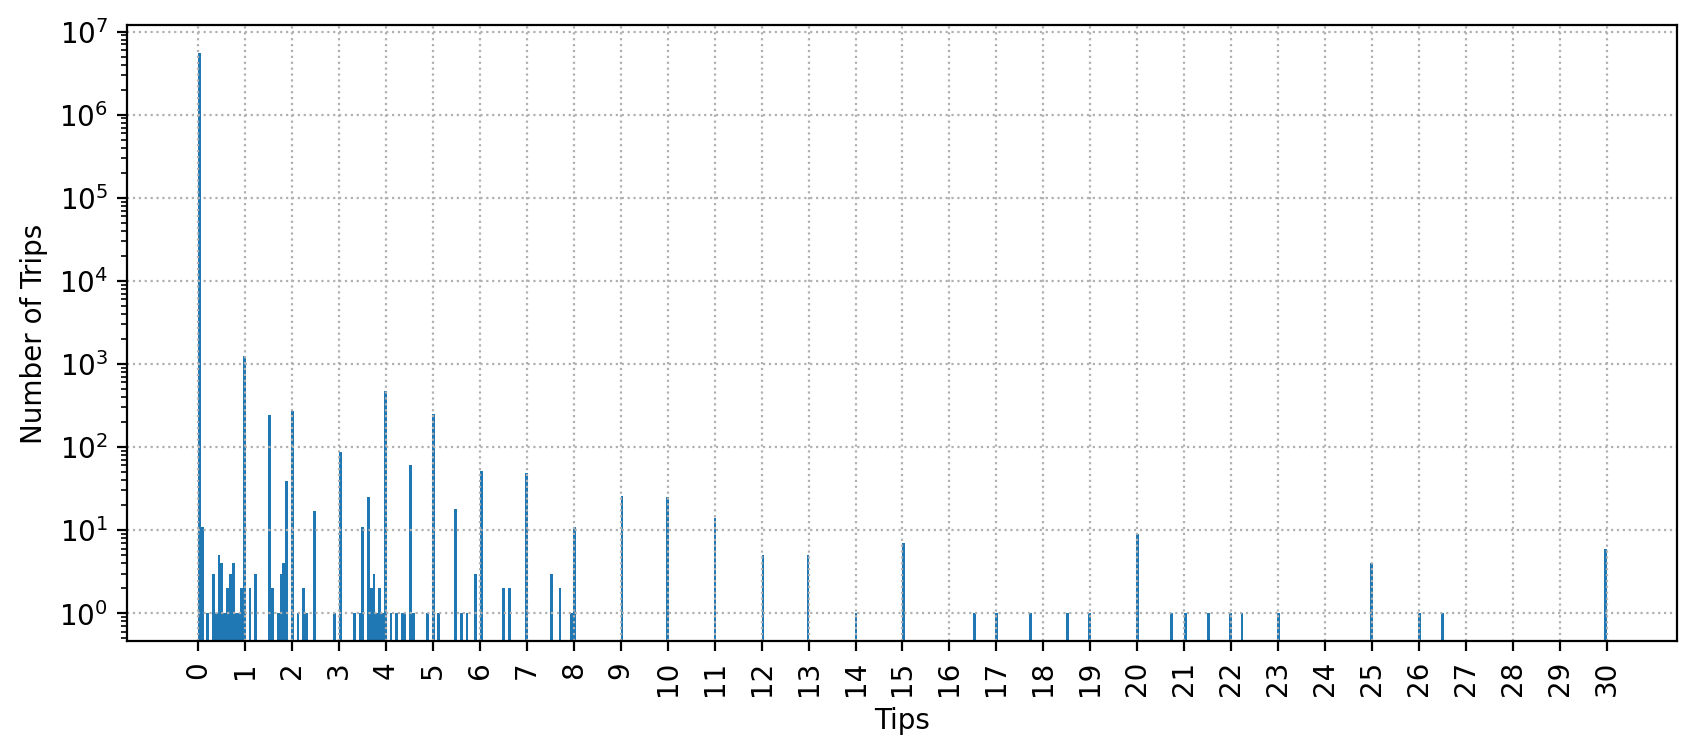

In [133]:
# Q: What is the distribution of tolls <= $30?
ax = (df['Tolls'][df['Tolls'] <= 30]).hist(figsize=(10, 4), bins=500, grid=False)
ax.set_xticks(np.arange(0, 30 + 0.1, 1))
ax.tick_params(axis='x', rotation=90)
ax.set_yscale('log')
ax.grid(linestyle=':')
ax.set_xlabel('Tips')
ax.set_ylabel('Number of Trips');

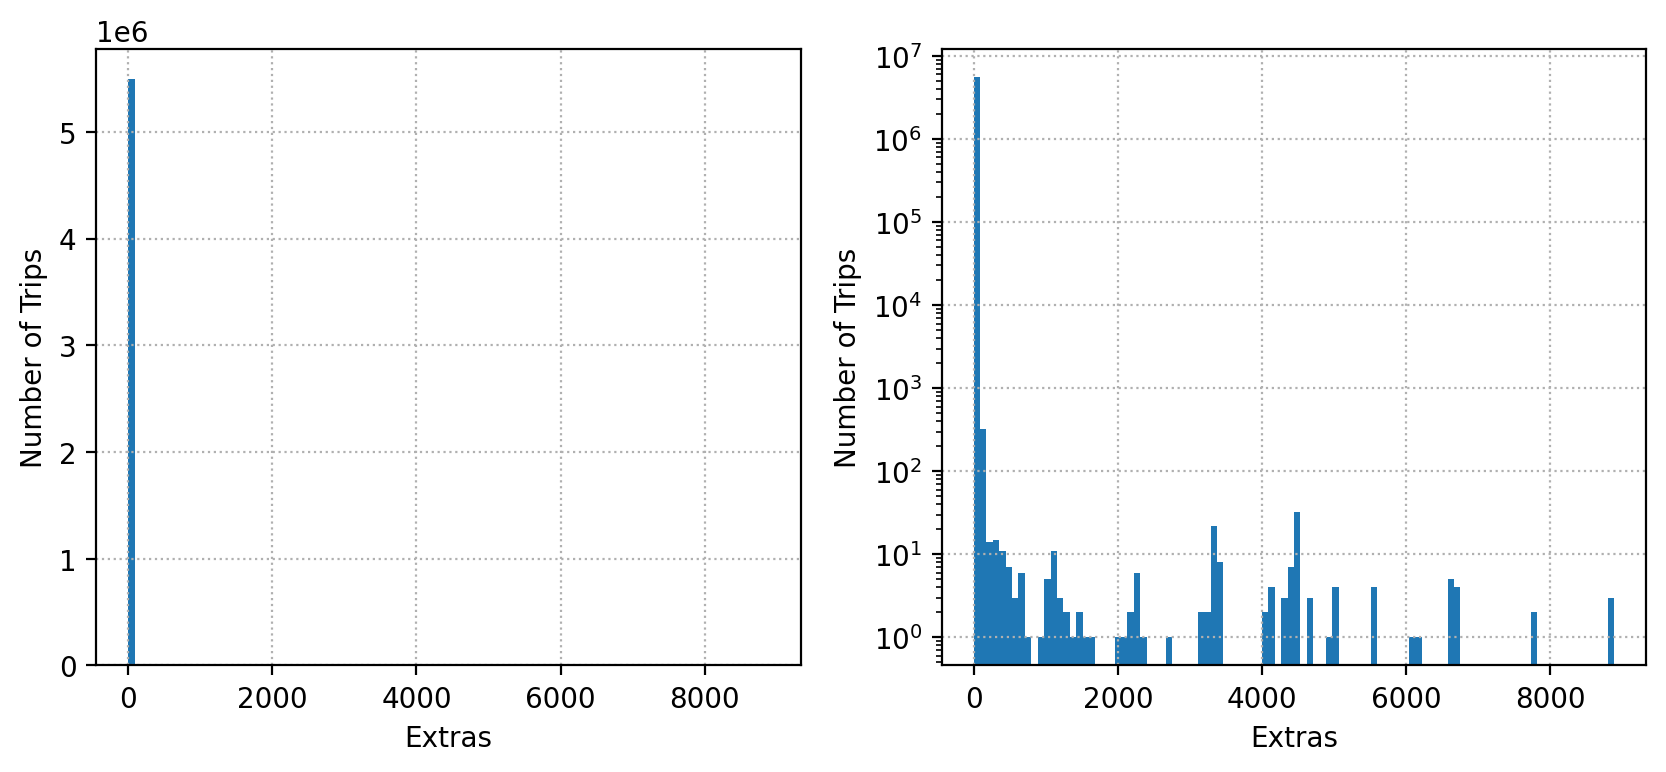

In [134]:
# Q: What is the distribution of extra?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['Extras']).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Extras')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['Extras']).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Extras')
ax2.set_ylabel('Number of Trips')

plt.show()

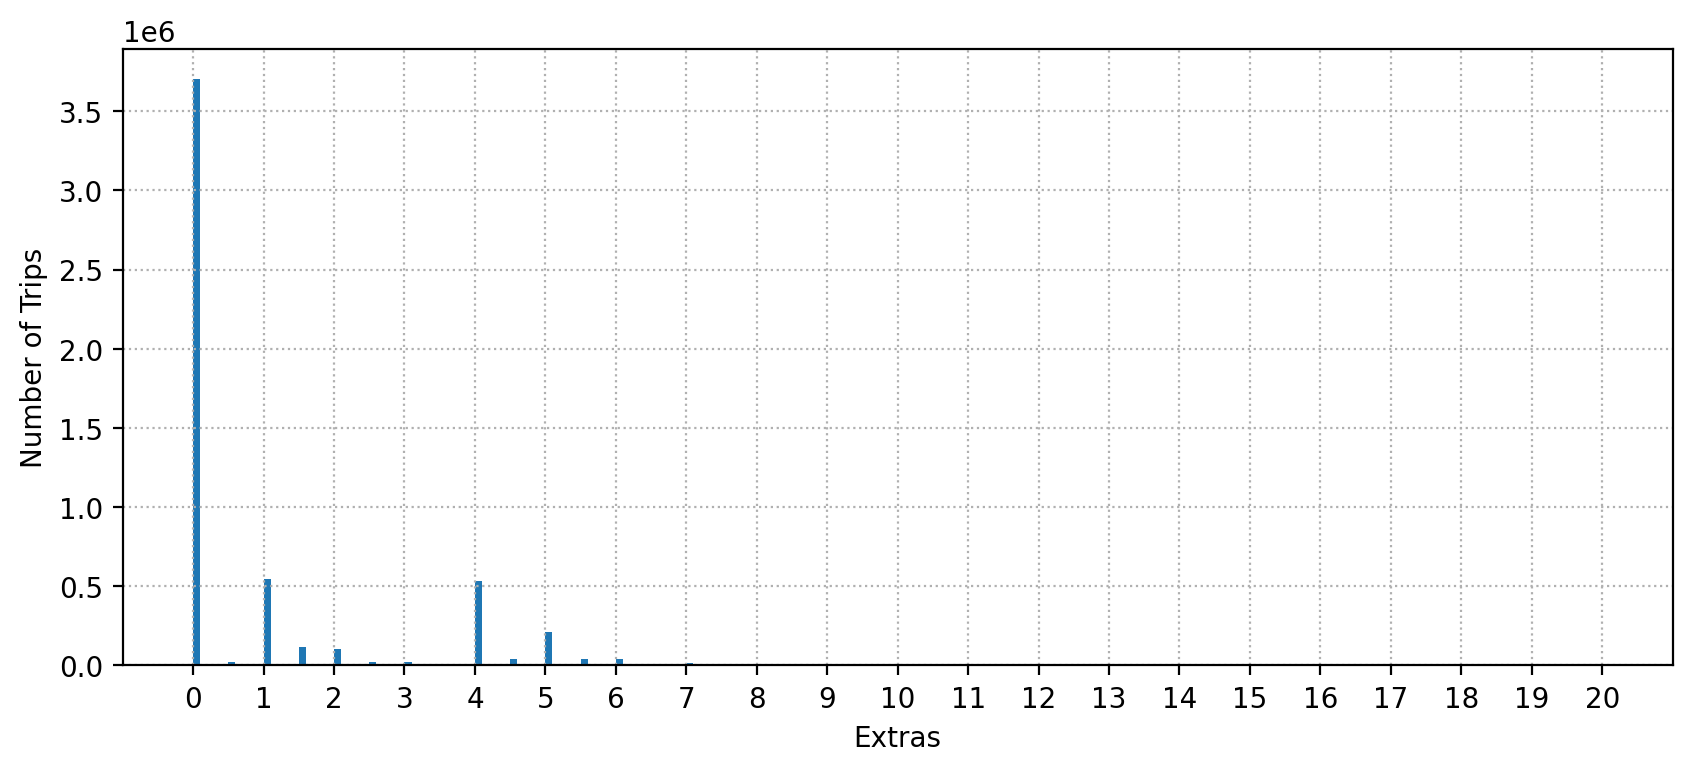

In [135]:
# Q: What is the distribution of extras <= $20?
ax = (df['Extras'][df['Extras'] <= 20]).hist(figsize=(10, 4), bins=200, grid=False)
ax.set_xticks(np.arange(0, 20 + 0.1, 1))
ax.grid(linestyle=':')
ax.set_xlabel('Extras')
ax.set_ylabel('Number of Trips');

In [136]:
# Q: What extras represent the spikes above?
df['Extras'].value_counts().head(20)
# $1 = first aditional passenger  $4 = airport departure  https://yellowcabchicago.com/rates/

Extras
0.0     3704131
1.0      543528
4.0      533022
5.0      208405
1.5      116903
2.0      101463
4.5       41398
6.0       38224
5.5       37658
0.5       23477
3.0       22771
2.5       22384
7.0       16564
6.5        9560
8.0        9037
3.5        8119
10.0       6286
7.5        4649
9.0        3795
8.5        3056
Name: count, dtype: int64

In [137]:
# Q: What are the most popular pickup locations for $4 fare?
df2 = (df
       [['Pickup Centroid Longitude', 'Pickup Centroid Latitude']]
       [df['Extras'] == 4]
       .value_counts()
       .map(np.log10)
       .rename('Log10(Number of Trips)')
       .reset_index())

df2.head(10)

Pickup Centroid Longitude  Pickup Centroid Latitude  Log10(Number of Trips)
0                 -87.903040                 41.979071                5.370450
1                 -87.913625                 41.980264                5.267904
2                 -87.769615                 41.792592                4.614855
3                 -87.750934                 41.785999                4.607015
4                 -87.620993                 41.884987                3.628900
5                 -87.633308                 41.899602                3.515211
6                 -87.632746                 41.880994                3.396896
7                 -87.626215                 41.892508                3.359456
8                 -87.625192                 41.878866                3.262214
9                 -87.618868                 41.890922                3.250176

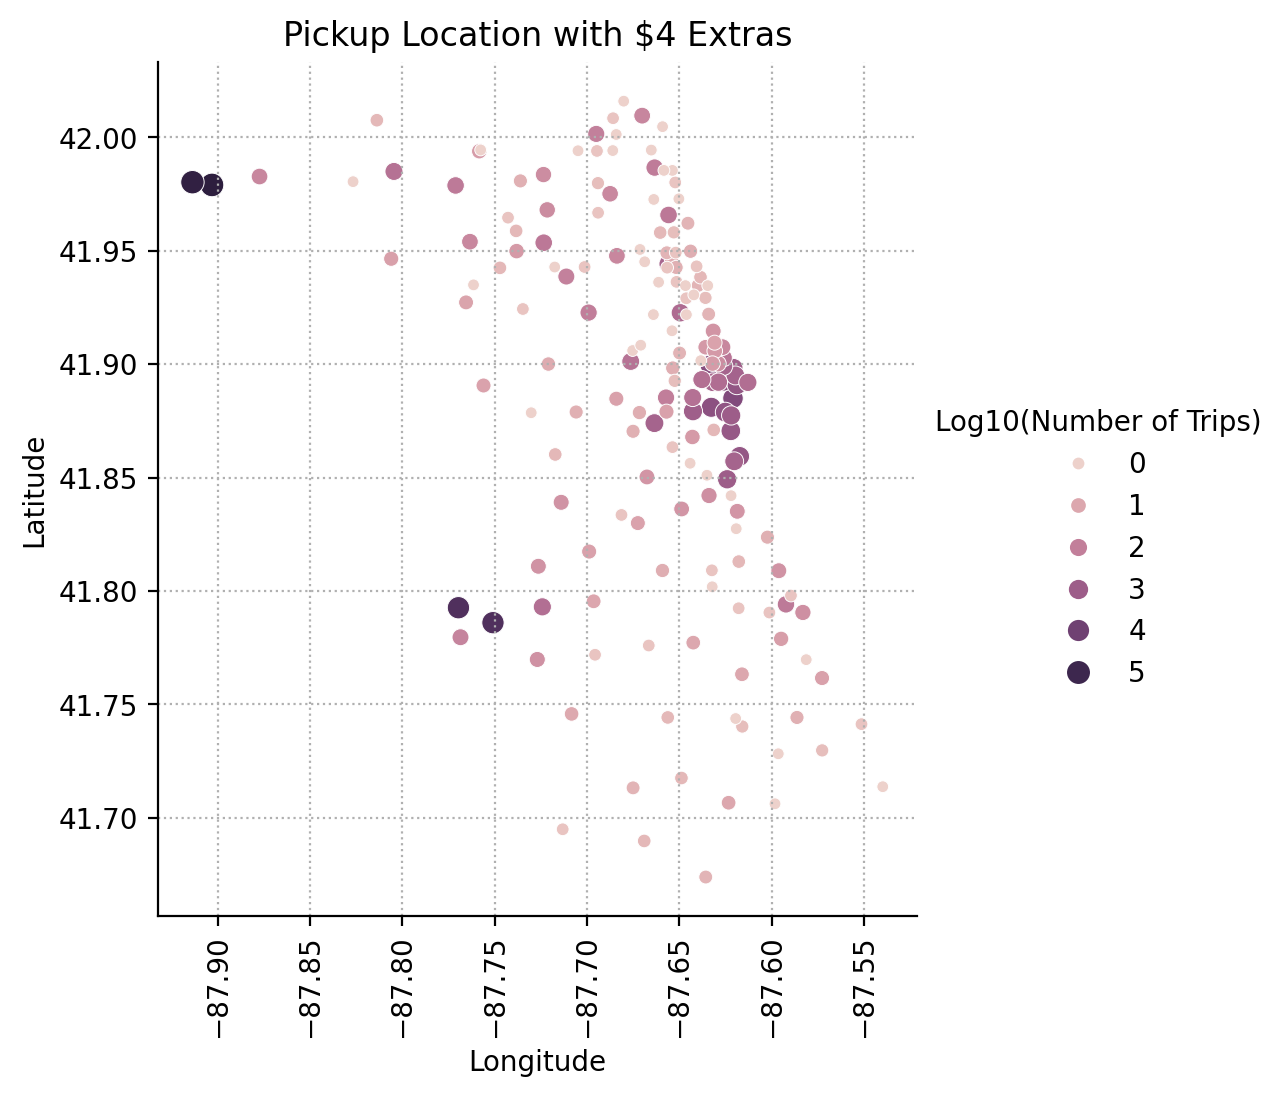

In [138]:
g = sns.relplot(data=df2,
                kind='scatter',
                x='Pickup Centroid Longitude',
                y='Pickup Centroid Latitude',
                hue='Log10(Number of Trips)',
                size='Log10(Number of Trips)')
g.ax.grid(linestyle=':')
g.tick_params(axis='x', rotation=90)
g.ax.set_xlabel('Longitude')
g.ax.set_ylabel('Latitude')
g.ax.set_title('Pickup Location with $4 Extras');

In [139]:
# Q: Do fare etc always sum up to trip total?
(df['Fare'] + df['Tips'] + df['Tolls'] + df['Extras'] == df['Trip Total']).value_counts()

True     4023931
False    1476573
Name: count, dtype: int64

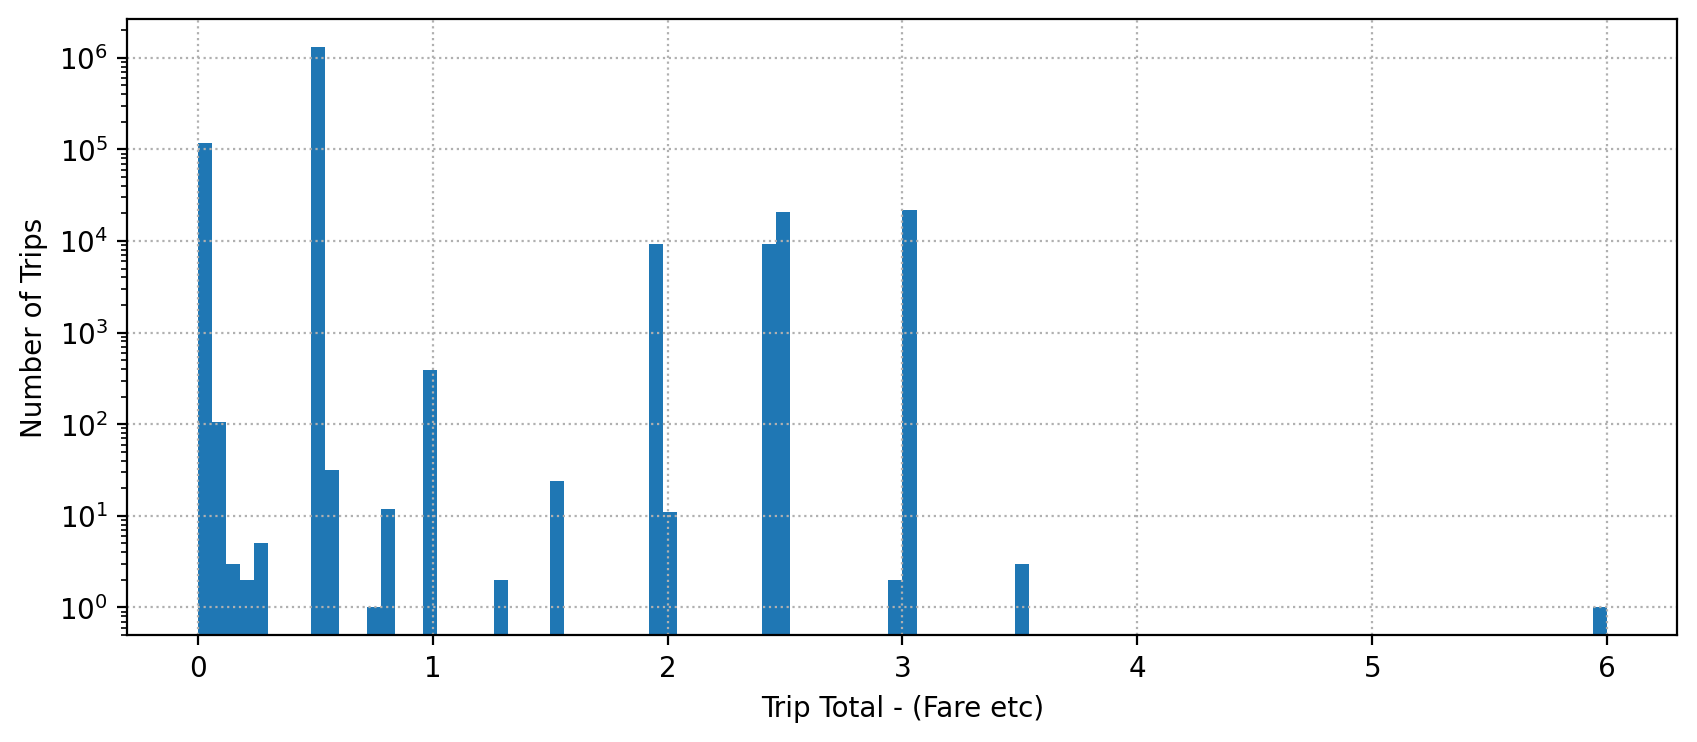

In [140]:
# Q: What is the distribution of discrepancy in trip total?
df['total_diff'] = df['Trip Total'] - (df['Fare'] + df['Tips'] + df['Tolls'] + df['Extras'])

ax = (df['total_diff'][df['total_diff'] != 0]).hist(figsize=(10, 4), bins=100, grid=False)
ax.set_yscale('log')
ax.grid(linestyle=':')
ax.set_xlabel('Trip Total - (Fare etc)')
ax.set_ylabel('Number of Trips');

In [141]:
# Q: Any missing company?
df['Company'].isna().any()

False

In [142]:
# Q: Any typo in company?
df['Company'].value_counts().sort_index()

Company
24 Seven Taxi                             51002
2733 - 74600 Benny Jona                    1050
312 Medallion Management Corp              7526
3556 - 36214 RC Andrews Cab                1944
3620 - 52292 David K. Cab Corp.              77
4053 - 40193 Adwar H. Nikola                621
5 Star Taxi                              128419
5062 - 34841 Sam Mestas                    1059
6574 - Babylon Express Inc.                1341
Blue Ribbon Taxi Association             139164
Blue Ribbon Taxi Association Inc.         32760
Chicago Carriage Cab Corp                     9
Chicago Independents                     272742
Chicago Taxicab                           16101
Choice Taxi Association                  107347
City Service                             513616
Flash Cab                               1207847
Globe Taxi                               207372
KOAM Taxi Association                      5506
Koam Taxi Association                     11962
Leonard Cab Co                  

In [143]:
df['Company'] = df['Company'].replace({'Blue Ribbon Taxi Association Inc.': 'Blue Ribbon Taxi Association',
                                       'KOAM Taxi Association': 'Koam Taxi Association',
                                       'Taxicab Insurance Agency, LLC': 'Taxicab Insurance Agency Llc',
                                       'Top Cab': 'Top Cab Affiliation'})

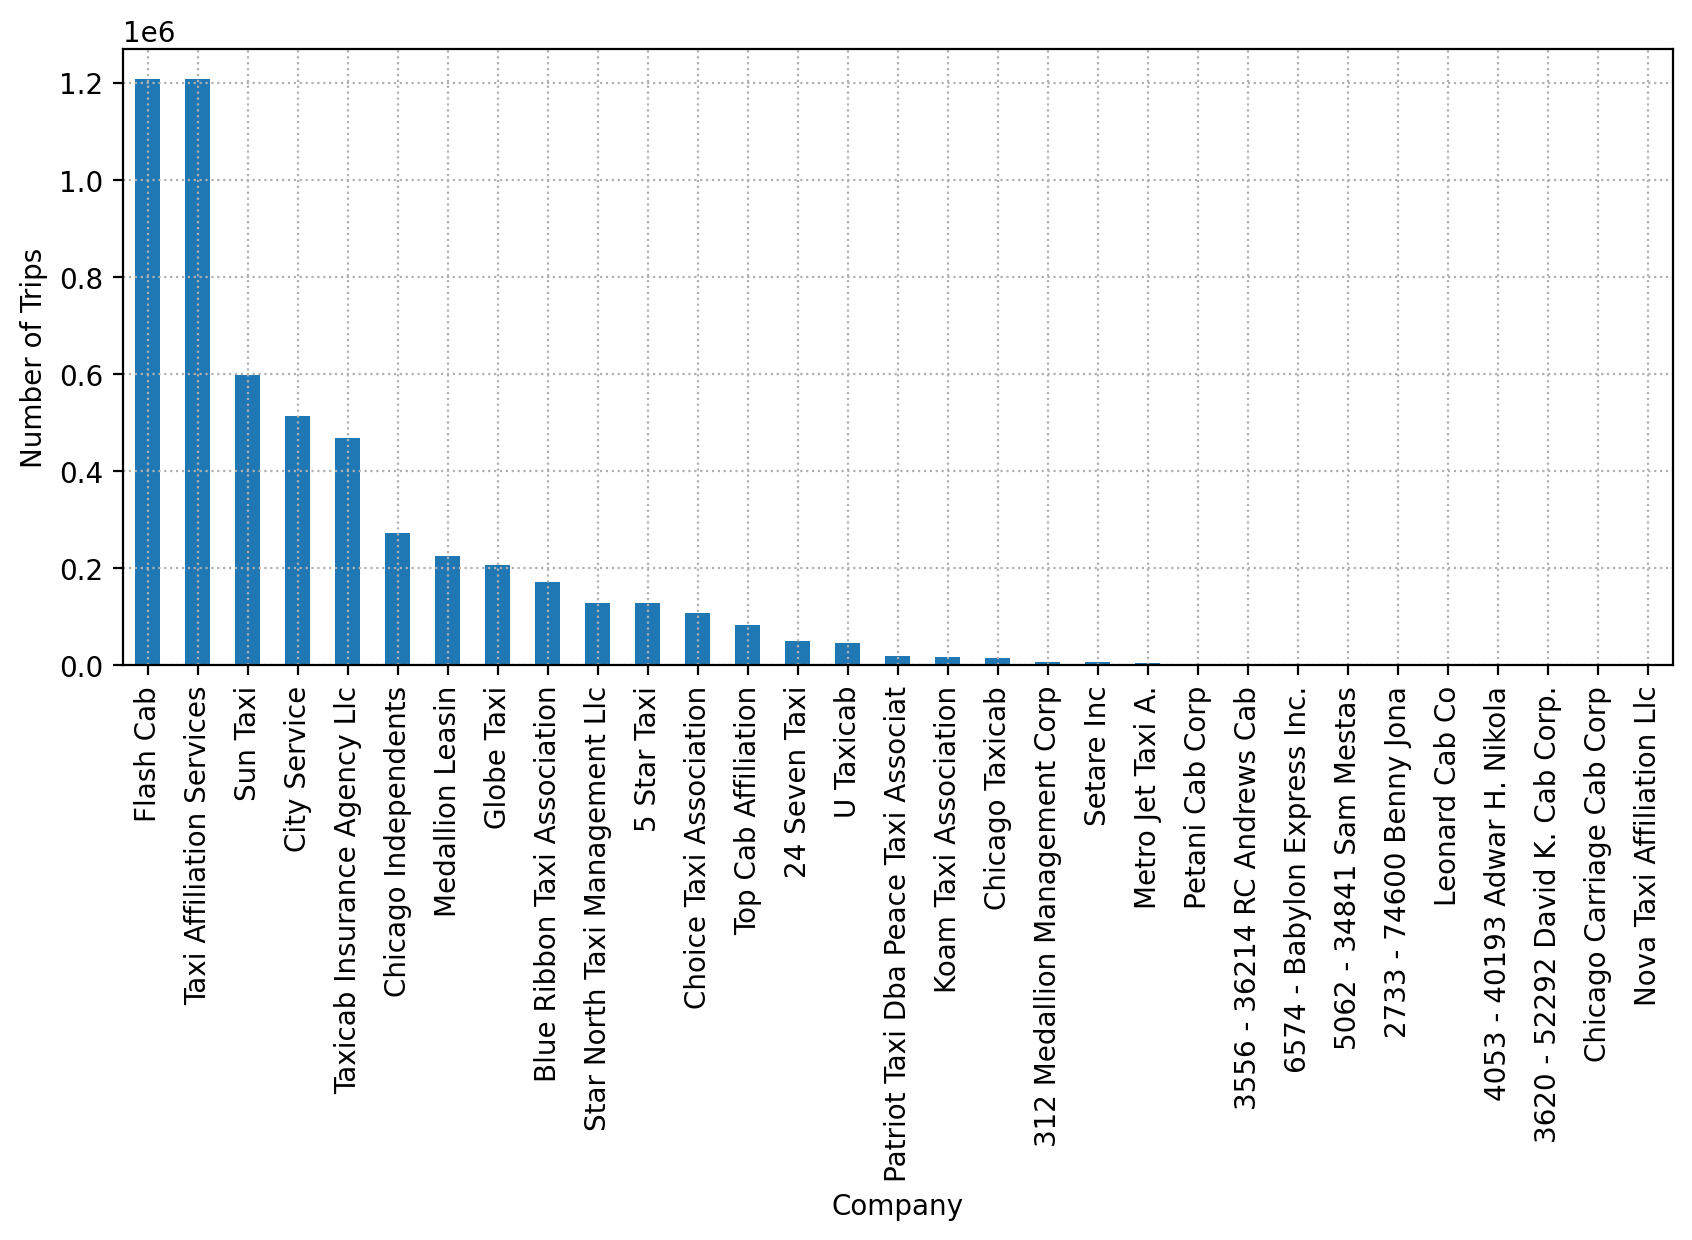

In [144]:
# Q: What is the distribution of company?
ax = df['Company'].value_counts().plot.bar(figsize=(10, 4), ylabel='Number of Trips')
ax.grid(linestyle=':')

In [145]:
# Q: Any missing payment type?
df['Payment Type'].isna().any()

False

In [146]:
# Q: What is the distribution of payment type?
df['Payment Type'].value_counts()

Payment Type
Credit Card    2011049
Cash           1766334
Mobile          884102
Prcard          544180
Unknown         290871
Dispute           2125
No Charge         1842
Prepaid              1
Name: count, dtype: int64

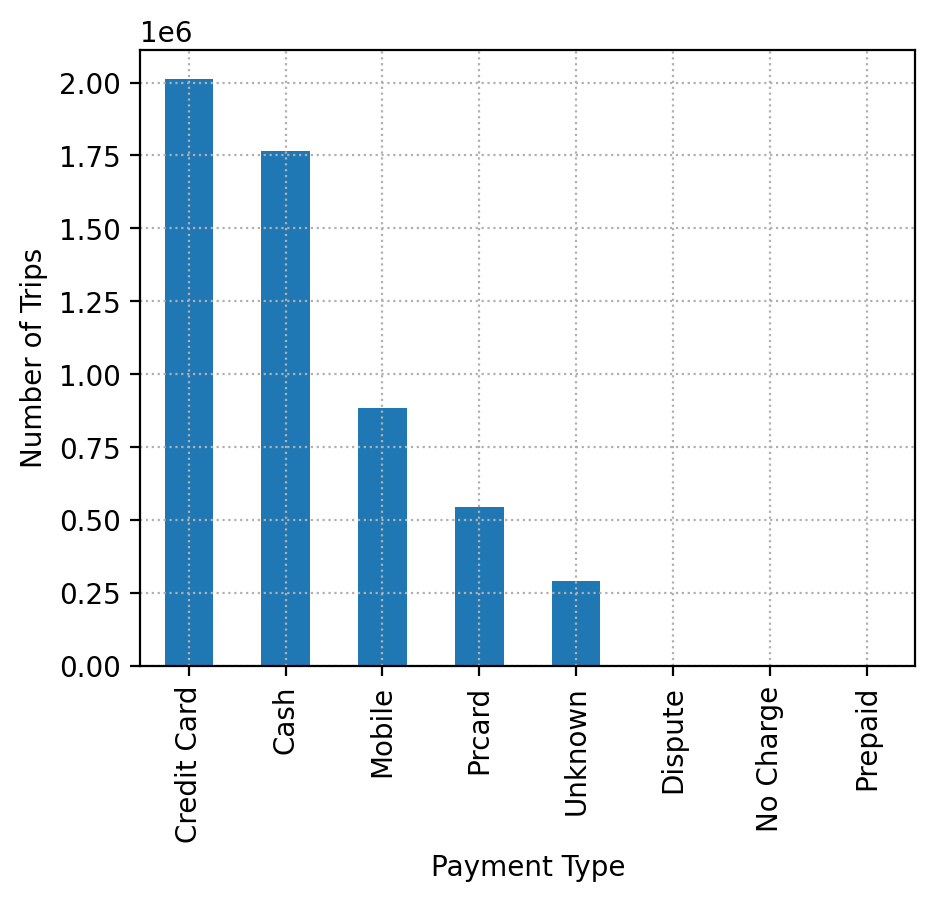

In [147]:
ax = df['Payment Type'].value_counts().plot.bar(figsize=(5, 4), ylabel='Number of Trips')
ax.grid(linestyle=':')

In [148]:
# Q: No charge means $0 trip total?
df[df['Payment Type'] == 'No Charge'].drop(labels=zone_cols, axis='columns')

Trip ID  \
250      78dd0a2b1b2491110ab96822f0b9e0865019d586   
1252     35bfc8b80e75f681c7493c723e28942c8dda6d87   
1565     4304c4ed1ac76292a72f411960fe8bc0c5ca0b63   
22453    8fa942d1d630920a0742a58632da808430841167   
32435    6cdee011bf134b0df4524c269d3286f3ea2a385a   
...                                           ...   
6378434  18ca06931e22b06b44c91f05eb3b58d3a9ddb9ca   
6381417  eebb30ceddbd0a80f1b75a0068b8a80b8a35e9bd   
6381468  4bed8a280d3efbdefafebb86a7ae9c86737f9607   
6381692  fe5ca27ebc75fceed18fcf771ce405b76af6aea4   
6381741  520b1d7836c8b64457e4ecf01b15328581452075   

                                                   Taxi ID  \
250      342474dd3a24c9d5b7dbc2514032a01ecb396624638be5...   
1252     2af66bee3f8116940cafc155173f0c158c5dd50a6efbda...   
1565     2af66bee3f8116940cafc155173f0c158c5dd50a6efbda...   
22453    7abf21809bb043cd98a7da5af365dd60088d19d08076f0...   
32435    4b2d5e8743e0e17dd683ef83f701a7c54ab50ffa532484...   
...                                                    ...   
6378434  634bc0295489ab0b50cebcc10d6d3e0b8ed7dc079e9473...   
6381417  634bc0295489ab0b50cebcc10d6d3e0b8ed7dc079e9473...   
6381468  634bc0295489ab0b50cebcc10d6d3e0b8ed7dc079e9473...   
6381692  257aa707087ab0b5072e2bdccb42a50f3314fed83d2907...   
6381741  257aa707087ab0b5072e2bdccb42a50f3314fed83d2907...   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
250      2022-01-01 00:30:00 2022-01-01 00:45:00        1140.0         2.6   
1252     2022-01-01 02:15:00 2022-01-01 02:30:00         720.0         2.7   
1565     2022-01-01 02:45:00 2022-01-01 03:45:00        3540.0        10.3   
22453    2022-01-03 13:45:00 2022-01-03 13:45:00           0.0         0.0   
32435    2022-01-04 12:45:00 2022-01-04 13:15:00        1620.0        20.1   
...                      ...                 ...           ...         ...   
6378434  2022-12-31 20:30:00 2022-12-31 21:00:00        1680.0        15.0   
6381417  2022-12-31 22:45:00 2022-12-31 23:15:00        1320.0        32.3   
6381468  2022-12-31 22:45:00 2022-12-31 23:15:00        1320.0        32.3   
6381692  2022-12-31 23:00:00 2022-12-31 23:30:00        1680.0        12.8   
6381741  2022-12-31 23:00:00 2022-12-31 23:30:00        1680.0        12.8   

          Fare  Tips  Tolls  Extras  ...  Payment Type  \
250      12.25   0.0    0.0     0.0  ...     No Charge   
1252     10.00   0.0    0.0     1.0  ...     No Charge   
1565     34.75   0.0    0.0     2.0  ...     No Charge   
22453     3.25   0.0    0.0     0.0  ...     No Charge   
32435    49.50   0.0    0.0     5.0  ...     No Charge   
...        ...   ...    ...     ...  ...           ...   
6378434  39.00   0.0    0.0     4.0  ...     No Charge   
6381417  41.25   0.0    0.0     5.0  ...     No Charge   
6381468  41.25   0.0    0.0     5.0  ...     No Charge   
6381692  33.50   0.0    0.0    10.0  ...     No Charge   
6381741  33.50   0.0    0.0    10.0  ...     No Charge   

                              Company Pickup Centroid Latitude  \
250         Taxi Affiliation Services                41.880994   
1252     Taxicab Insurance Agency Llc                41.899602   
1565     Taxicab Insurance Agency Llc                41.899602   
22453    Taxicab Insurance Agency Llc                41.794090   
32435    Taxicab Insurance Agency Llc                41.979071   
...                               ...                      ...   
6378434       Choice Taxi Association                41.980264   
6381417       Choice Taxi Association                41.980264   
6381468       Choice Taxi Association                41.980264   
6381692           Top Cab Affiliation                41.980264   
6381741           Top Cab Affiliation                41.980264   

         Pickup Centroid Longitude              Pickup Centroid Location  \
250                     -87.632746  POINT (-87.6327464887 41.8809944707)   
1252                    -87.633308   POINT (-87.6333080367 41.899602111)   
1565 

In [149]:
# Q: What is the joint distribution / contingency table of company vs payment type?
df2 = (df
       .value_counts(['Company', 'Payment Type'])
       .unstack()
       .fillna(0)
       .astype(int))
df2['Total'] = df2.sum(axis=1)

df2.sort_values('Total', ascending=False)

Payment Type                            Cash  Credit Card  Dispute  Mobile  \
Company                                                                      
Flash Cab                             376299       243853        0  205886   
Taxi Affiliation Services             449879       495102        2       0   
Sun Taxi                              174890       232433        0  167335   
City Service                          132837       189633        0  135520   
Taxicab Insurance Agency Llc          157323       226279      780   69911   
Chicago Independents                   76106       116639      131   74261   
Medallion Leasin                       75695        87660        0   50410   
Globe Taxi                             61830        80600        0   51078   
Blue Ribbon Taxi Association           59089        60216       64   34025   
Star North Taxi Management Llc         37737        52423        0   38033   
5 Star Taxi                            35198        42625        0   27617   
Choice Taxi Association                37443        63373      287       0   
Top Cab Affiliation                    32932        43009      673    1310   
24 Seven Taxi                          12578        18781        0   18061   
U Taxicab                              18151        23507       92       0   
Patriot Taxi Dba Peace Taxi Associat    6593         4064        0    3865   
Koam Taxi Association                   5135         8129       25    3769   
Chicago Taxicab                         6534         7778        0    1419   
312 Medallion Management Corp           2600         4524       59       0   
Setare Inc                              2346         3448        0     273   
Metro Jet Taxi A.                       2255         1203        0    1252   
Petani Cab Corp                         1007         2365        3       0   
3556 - 36214 RC Andrews Cab              206           39        1       0   
6574 - Babylon Express Inc.              416          920        1       0   
5062 - 34841 Sam Mestas                  485          546        7       0   
2733 - 74600 Benny Jona                  282          765        0       0   
Leonard Cab Co                           291          630        0      77   
4053 - 40193 Adwar H. Nikola             160          458        0       0   
3620 - 52292 David K. Cab Corp.           27           47        0       0   
Chicago Carriage Cab Corp                  9            0        0       0   
Nova Taxi Affiliation Llc                  1            0        0       0   

Payment Type                          No Charge  Prcard  Prepaid  Unknown  \
Company                                                                     
Flash Cab                                     0  381808        1        0   
Taxi Affiliation Services                    69       0        0   262003   
Sun Taxi                                      0   24323        0        0   
City Service                                  0   55626        0        0   
Taxicab Insurance Agency Llc                645    5764        0     7777   
Chicago Independents                         93    4641        0      871   
Medallion Leasin                              0   11916        0        0   
Globe Taxi                                    0   13864        0        0   
Blue Ribbon Taxi Association                  3   13668        0     4859   
Star North Taxi Management Llc                0    1093        0        0   
5 Star Taxi                                   0   22979        0        0   
Choice Taxi Association                     625       0        0     5619   
Top Cab Affiliation                         367     790        0     4101   
24 Seven Taxi                                 0    1582        0        0   
U Taxicab                                    35       0        0     3434   
Patriot Taxi Dba Peace Taxi Associat          0    5276        0        0   
Koam Taxi Association                  

# Step 3: Construct clean data

In [150]:
df = pd.read_csv('chicago_tax_trip_raw.csv',
                 parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'],
                 date_format='%m/%d/%Y %I:%M:%S %p')

df.shape

(6382425, 23)

In [151]:
is_dirty = (df['Taxi ID'].isna() |
            df['Trip End Timestamp'].isna() |
            (df['Trip Start Timestamp'] > df['Trip End Timestamp']) |
            df['Trip Seconds'].isna() |
            ~df['Trip Seconds'].between(1, 2 * 3600) |
            ((df['Trip Seconds'] -
              (df['Trip End Timestamp'] - df['Trip Start Timestamp']).dt.total_seconds()).abs() > 15 * 60) |
            df['Trip Miles'].isna() |
            ~df['Trip Miles'].between(0.01, 100) |
            df['Pickup Centroid Location'].isna() |
            df['Dropoff Centroid  Location'].isna() |
            df['Fare'].isna() |
            ~df['Fare'].between(3.25, 200) |
            ~df['Tips'].between(0, 50) |
            ~df['Tolls'].between(0, 20) |
            ~df['Extras'].between(0, 20) |
            df['Payment Type'].isin({'Dispute', 'No Charge'}))
df = df[~is_dirty].reset_index(drop=True)

is_dirty.sum(), is_dirty.mean()

(1613416, 0.25279043623701025)

In [152]:
import itertools

for col in ['Trip ID', 'Taxi ID']:
    n = df[col].nunique()
    for k in itertools.count(1): # Find shortest ID prefix without loss of information
        if len(set(df[col].str[:k])) == n:
            break
    df[col] = df[col].str[:k] # Truncate unnecessary ID suffix

df['Trip Seconds'] = df['Trip Seconds'].astype(np.int64)

df.replace({'Company': {'Blue Ribbon Taxi Association Inc.': 'Blue Ribbon Taxi Association',
                        'KOAM Taxi Association': 'Koam Taxi Association',
                        'Taxicab Insurance Agency, LLC': 'Taxicab Insurance Agency Llc',
                        'Top Cab': 'Top Cab Affiliation'}}, inplace=True)

df.loc[df['Payment Type'].isin({'Mobile', 'Prcard', 'Prepaid', 'Unknown'}), 'Payment Type'] = 'Other'

In [153]:
import re

df.rename(columns=lambda col: re.sub(r'\s+', '_', col).lower(), inplace=True)
df.rename(columns={'trip_start_timestamp': 'trip_start_time',
                   'trip_end_timestamp': 'trip_end_time',
                   'pickup_centroid_latitude': 'pickup_latitude',
                   'pickup_centroid_longitude': 'pickup_longitude',
                   'dropoff_centroid_latitude': 'dropoff_latitude',
                   'dropoff_centroid_longitude': 'dropoff_longitude'}, inplace=True)

In [154]:
df = df[['trip_id',
         'taxi_id',
         'trip_start_time',
         'trip_end_time',
         'trip_seconds',
         'trip_miles',
         'pickup_longitude',
         'pickup_latitude',
         'dropoff_longitude',
         'dropoff_latitude',
         'fare',
         'tips',
         'tolls',
         'extras',
         'trip_total',
         'payment_type', 
         'company']]

In [155]:
df.shape

(4769009, 17)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769009 entries, 0 to 4769008
Data columns (total 17 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            object        
 1   taxi_id            object        
 2   trip_start_time    datetime64[ns]
 3   trip_end_time      datetime64[ns]
 4   trip_seconds       int64         
 5   trip_miles         float64       
 6   pickup_longitude   float64       
 7   pickup_latitude    float64       
 8   dropoff_longitude  float64       
 9   dropoff_latitude   float64       
 10  fare               float64       
 11  tips               float64       
 12  tolls              float64       
 13  extras             float64       
 14  trip_total         float64       
 15  payment_type       object        
 16  company            object        
dtypes: datetime64[ns](2), float64(10), int64(1), object(4)
memory usage: 618.5+ MB


In [157]:
df

trip_id taxi_id     trip_start_time       trip_end_time  \
0        54d812a0b88  f98ae5 2022-01-01 00:00:00 2022-01-01 00:00:00   
1        7125b9e03a0  8eca35 2022-01-01 00:00:00 2022-01-01 00:15:00   
2        f1a650ee419  e2d841 2022-01-01 00:00:00 2022-01-01 00:30:00   
3        0f0c856e620  b21050 2022-01-01 00:00:00 2022-01-01 00:00:00   
4        10de74ba327  86b07d 2022-01-01 00:00:00 2022-01-01 00:00:00   
...              ...     ...                 ...                 ...   
4769004  e32619aecac  ca30b4 2022-12-31 23:45:00 2023-01-01 00:45:00   
4769005  f12c74c35ec  ce8e55 2022-12-31 23:45:00 2023-01-01 00:15:00   
4769006  f5ba11ba1d2  0cbf5c 2022-12-31 23:45:00 2022-12-31 23:45:00   
4769007  f88a3f1bc24  96c3fa 2022-12-31 23:45:00 2023-01-01 00:00:00   
4769008  f7d9a0b1514  835869 2022-12-31 23:45:00 2023-01-01 00:00:00   

         trip_seconds  trip_miles  pickup_longitude  pickup_latitude  \
0                 536        4.83        -87.663518        41.874005   
1                 897        2.07        -87.633308        41.899602   
2                2200        2.48        -87.633308        41.899602   
3                  33        0.17        -87.655879        41.965812   
4                 710        3.12        -87.649489        41.922686   
...               ...         ...               ...              ...   
4769004          3865       18.24        -87.723452        41.953582   
4769005           974        1.69        -87.621972        41.877406   
4769006           539        1.85        -87.625192        41.878866   
4769007           449        1.66        -87.633308        41.899602   
4769008           321        0.77        -87.620763        41.898332   

         dropoff_longitude  dropoff_latitude   fare   tips  tolls  extras  \
0               -87.699155         41.922761  14.75   0.00    0.0     0.0   
1               -87.625192         41.878866   9.75   0.00    0.0     1.5   
2               -87.625192         41.878866   9.36   2.14    0.0     0.0   
3               -87.655879         41.965812  63.27   0.00    0.0     0.0   
4               -87.655879         41.965812  11.00   0.00    0.0     0.0   
...                    ...               ...    ...    ...    ...     ...   
4769004         -87.723452         41.953582  51.75   0.00    0.0     0.0   
4769005         -87.631864         41.892042   9.50   0.00    0.0     1.5   
4769006         -87.663518         41.874005  11.48   0.00    0.0     0.0   
4769007         -87.663518         41.874005   7.75   0.00    0.0     4.0   
4769008         -87.619711         41.895033   5.50  10.00    0.0     1.0   

         trip_total payment_type                       company  
0             14.75         Cash                    Globe Taxi  
1             11.25         Cash                      Sun Taxi  
2             11.50        Other          Chicago Independents  
3             63.27         Cash                     Flash Cab  
4             11.00         Cash                      Sun Taxi  
...             ...          ...                           ...  
4769004       51.75         Cash                      Sun Taxi  
4769005       11.00         Cash  Blue Ribbon Taxi Association  
4769006       11.48        Other                    Globe Taxi  
4769007       11.75         Cash                     Flash Cab  
4769008       17.00  Credit Card  Taxicab Insurance Agency Llc  

[4769009 rows x 17 columns]

In [158]:
df.describe().T

count                           mean  \
trip_start_time      4769009  2022-07-14 19:51:01.072185856   
trip_end_time        4769009  2022-07-14 20:10:18.777611264   
trip_seconds       4769009.0                    1157.400575   
trip_miles         4769009.0                       6.119744   
pickup_longitude   4769009.0                     -87.681438   
pickup_latitude    4769009.0                      41.897522   
dropoff_longitude  4769009.0                     -87.660883   
dropoff_latitude   4769009.0                       41.89355   
fare               4769009.0                      20.158788   
tips               4769009.0                       2.517834   
tolls              4769009.0                       0.001506   
extras             4769009.0                       1.073065   
trip_total         4769009.0                      23.914178   

                                   min                  25%  \
trip_start_time    2022-01-01 00:00:00  2022-04-26 13:00:00   
trip_end_time      2022-01-01 00:00:00  2022-04-26 13:15:00   
trip_seconds                       1.0                490.0   
trip_miles                        0.01                  1.2   
pickup_longitude            -87.913625           -87.663518   
pickup_latitude              41.651922            41.878866   
dropoff_longitude           -87.913625           -87.663518   
dropoff_latitude             41.660136            41.878866   
fare                              3.25                  8.0   
tips                               0.0                  0.0   
tolls                              0.0                  0.0   
extras                             0.0                  0.0   
trip_total                        3.25                 10.0   

                                   50%                  75%  \
trip_start_time    2022-07-16 18:15:00  2022-10-06 17:45:00   
trip_end_time      2022-07-16 18:45:00  2022-10-06 18:30:00   
trip_seconds                     869.0               1586.0   
trip_miles                         2.9                 10.6   
pickup_longitude            -87.633308           -87.625192   
pickup_latitude              41.892508            41.944227   
dropoff_longitude           -87.633308           -87.625192   
dropoff_latitude             41.892508            41.922686   
fare                             13.25                30.75   
tips                               1.0                  3.4   
tolls                              0.0                  0.0   
extras                             0.0                  1.0   
trip_total                       15.81                 33.0   

                                   max         std  
trip_start_time    2022-12-31 23:45:00         NaN  
trip_end_time      2023-01-01 01:00:00         NaN  
trip_seconds                    7200.0  905.302276  
trip_miles                       100.0    6.368166  
pickup_longitude            -87.531386    0.099956  
pickup_latitude              42.021224    0.058997  
dropoff_longitude           -87.531386    0.071601  
dropoff_latitude             42.021224    0.056694  
fare                             200.0   14.949645  
tips                              50.0    3.587773  
tolls                             20.0    0.083062  
extras                            20.0    1.900091  
trip_total                       258.6   18.308635

In [159]:
df.describe(include=object).T

count   unique          top     freq
trip_id       4769009  4769009  54d812a0b88        1
taxi_id       4769009     2798       8da9e1     8238
payment_type  4769009        3  Credit Card  1830361
company       4769009       30    Flash Cab  1004699

In [160]:
df.to_csv('chicago_taxi_trip.csv.zip', index=False) # 150 MB  777 MB without zip

In [161]:
%time pd.read_csv('chicago_taxi_trip.csv.zip', parse_dates=['trip_start_time', 'trip_end_time']).equals(df)

CPU times: total: 20.9 s
Wall time: 21.8 s


True